## Visit with Us

### Objectives

- To predict which customers are most likely to purchase the newly introduced travel package, while keeping Marketing spending low so as to boost profits

**(Level of Significance to be Used for Statistical & Hypothesis Testing: 0.05)**

**Customer Details:**
- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer (assumed in \\$)

**Customer Interaction Details:**
- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [93]:
# Import the usual libraries for Math, Statistics, Dataframe, and Graphical functions, setting Warnings to Ignore

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import stats # Import for statistical/hypothesis testing

import statsmodels.api as sm # Import statistical summary for Regression analysis

# Import Some of the ML models to be used at a later stage

from sklearn.linear_model import LogisticRegression # library for creating logistic Regression Model and Summaries


from sklearn.tree import DecisionTreeClassifier # Library for building decision trees
from sklearn.model_selection import train_test_split # Library for training (x) and testing (y) the data
from sklearn.model_selection import GridSearchCV # Library for Hyperparameter tuning the Decision Tree model

from sklearn.metrics import confusion_matrix, classification_report # Library to be used for Confusion Matrix (TP, FP, TN, FN)

# Library to test Logistic Regression scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve, precision_recall_curve  

from sklearn import metrics # Library for CM Model Testing, etc.
from sklearn import tree # Library to be used for creating and pruning Decision Trees

# Libraries for Ensemble Techniques - Bagging, Random Forest & Boosting - Classification
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

# Libraries for Ensemble Techniques - Bagging, Random Forest & Boosting - Regression (if needed)
# from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor



In [94]:
# Import all data from Excel, selecting second sheet titled 'Tourism'

data = pd.read_excel('Tourism.xlsx', sheet_name='Tourism')
travel = data.copy() # Create a new copy for editing, keeping data as backup

In [95]:
travel.head() # View the top 5 rows of data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [96]:
travel.tail() # View the bottom 5 rows of data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [97]:
travel.shape # Inspect the shape (rows/columns) of the dataset

(4888, 20)

There are **4,888 rows and 20 columns** of data in the initial dataset.

In [98]:
travel.info() # Inspect the datatypes and missing values, if any, in the sample dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [99]:
travel.isnull().sum().sort_values(ascending=False) # Sum up all missing values, by column, in descending order

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Passport                      0
MaritalStatus                 0
ProductPitched                0
Designation                   0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
PitchSatisfactionScore        0
CityTier                      0
OwnCar                        0
ProdTaken                     0
CustomerID                    0
dtype: int64

- There are missing values in columns:
    - Age
    - Type of Contract
    - Duration of Pitch
    - Number of Follow Ups
    - Preferred Property Star
    - Number Of Trips
    - Number of Children Visiting
    - Monthly Income
 - Some of these variables may only have a few unique values and can be treated as categorical
     - These may need to be further explored at an individual basis
 - It will need to be determined whether to drop or replace (Mean/Median, etc.) these missing rows/columns

In [100]:
# Create two for loops to 1.) identify all columns with small unique counts of <=6 and 2.) print a summary of each unique count

UniqueCols = []
for Cols in travel:
    if travel[Cols].nunique() < 7:
        UniqueCols.append(Cols)
        
for Cols in UniqueCols:
    print(Cols)
    print(travel[Cols].value_counts())
    print('.'*80)

ProdTaken
0    3968
1     920
Name: ProdTaken, dtype: int64
................................................................................
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
................................................................................
CityTier
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
................................................................................
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
................................................................................
Gender
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
................................................................................
NumberOfPersonVisiting
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
.......................................

- The 'Free lancer' occupation only has 2 values in the dataset and can be converted to 'Small Business' which is similar in explaining customer's income source/s
- The gender of 'Fe Male' is meant to reflect 'Female' and should be replaced as such

In [101]:
# Changing 'Free Lancer' to 'Small Business' as Occupation

travel['Occupation'].replace(to_replace='Free Lancer',\
                         value='Small Business', inplace=True)

# Correcting 'Fe Male' which should be 'Female' as Gender
travel['Gender'].replace(to_replace='Fe Male',\
                         value='Female', inplace=True)

In [102]:
travel.drop('CustomerID',axis=1,inplace=True) # Drop Customer ID which offers no patterns or value due to all rows being unique

In [103]:
travel.describe().T # Examine the statistical summary of all numeric variables in the dataset

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


### Addressing all Missing Rows

After examining each of the for both the numeric and categorical variables, **the Median can be applied to all numeric columns** (Mean and Median are similar) and the **most frequent result (Mode) applied to the categorical variables**.

In [104]:
# Replacing all missing values with Median (Numeric)

travel['Age'].replace(np.nan, travel['Age'].median(), inplace=True)
travel['DurationOfPitch'].replace(np.nan, travel['DurationOfPitch'].median(), inplace=True)
travel['NumberOfFollowups'].replace(np.nan, travel['NumberOfFollowups'].median(), inplace=True)
travel['PreferredPropertyStar'].replace(np.nan, travel['PreferredPropertyStar'].median(), inplace=True)
travel['NumberOfTrips'].replace(np.nan, travel['NumberOfTrips'].median(), inplace=True)
travel['NumberOfChildrenVisiting'].replace(np.nan, travel['NumberOfChildrenVisiting'].median(), inplace=True)
travel['MonthlyIncome'].replace(np.nan, travel['MonthlyIncome'].median(), inplace=True)

In [105]:
# Replacing all missing values with Mode (Categorical)

travel['TypeofContact'].replace(np.nan, 'Self Enquiry', inplace=True)

In [106]:
# Create list of all travel columns containing 'object' traveltypes

cols = travel.select_dtypes(['object'])
cols.columns

# Use for loop to cycle through each of the above columns within the actual travelset, changing each to 'category'

for i in cols.columns:
    travel[i] = travel[i].astype('category')

In [107]:
# Reinspect every column's datatype and non-null count - There should be 0 nulls and all ojects set to category

travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   int64 

In [108]:
# Rerun statistical summary for just the numeric columns

travel.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.00,1.0
Age,4888.0,37.547259,9.104795,18.0,31.0,36.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.00,3.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.0,13.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.0,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.0,3.0,4.00,5.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.0,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.00,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.00,5.0


- **The Monthly Income minimum of \\$1k appears to be substantially understated** vs. the rest of the dataset and well under the standard deviation - it should be further examined
- It is also worth examining the highest incomes within the range to ensure that they are in fact accurate, real data

In [109]:
# Sort through the Monthly Income column data, in ascending order, to isolate any low anomalies not fitting the dataset

travel['MonthlyIncome'].sort_values(ascending=True)

142      1000.0
2586     4678.0
1983    16009.0
513     16009.0
2197    16051.0
         ...   
3190    38651.0
2634    38677.0
4104    38677.0
38      95000.0
2482    98678.0
Name: MonthlyIncome, Length: 4888, dtype: float64

- There are 2 incomes that appear too low to align with the rest of the dataset
- There are also 2 incomes that appear too high to align with the rest of the dataset, however they could be accurate anomalies that any decision tree model/s should include

In [110]:
# Inspect the entire dataset, filtering on customers with incomes under $5k

travel[travel['MonthlyIncome']<=5000]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0


- There are two customers listed, both of which are shown to be working at a Large Business
    - It may be inferred that the respective incomes listed are well below an average, full-time or even part-time, salary
    - With the Median and Mean being relatively similar, withing around \\$1k, **the Median can be used to replace these two salaries**

In [111]:
# Replace each of the incomes above with the overall median for the column data

travel['MonthlyIncome'].replace(1000.0, travel['MonthlyIncome'].median(), inplace=True)
travel['MonthlyIncome'].replace(4678.0, travel['MonthlyIncome'].median(), inplace=True)

In [112]:
# Now inspect the opposite side of the data, targeting high incomes over $95k

travel[travel['MonthlyIncome']>=95000]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,3.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0


- There are two customers listed, both of which are shown to be working as salaried individuals
    - **These incomes could very likely be accurate within the dataset** and should not be removed for this analysis

In [113]:
# Now that the numeric columns have been adjusted examine all categorical data that was updated above

travel.describe(include='category').T

,count,unique,top,freq
TypeofContact,4888,2,Self Enquiry,3469
Occupation,4888,3,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


### Insights

- The count of 4,888 for each column (numeric and categorical) shows that **there are 0 missing values**
- Quite a few of the numeric columns have only a handful of unique values
    - Each of these columns **includes either binary (0-No/1-Yes) data or ordinal values (1<2<3<4<5, etc.)**
    - Due to the **ordinal** nature, those columns **can be left numeric**
        - **The Binanary variables (including the target - 'ProdTaken', however, will need to be converted to categorical**
- The majority of customers in the dataset (categorical summary) are:
    - Salaried males, at an executive level proffesion, who are married
    - Performed a self enquiry for our travel products and were pitched the basic model

### Convert Binary Numerical Columns, including Target, to Categorical

In [114]:
# Create a temporary column to identify and isolate columns with binary data (2 unique values) only

BinaryCols = travel.nunique()<=2

print(BinaryCols[BinaryCols==True])

BinaryCols = BinaryCols[BinaryCols==True]

ProdTaken        True
TypeofContact    True
Gender           True
Passport         True
OwnCar           True
dtype: bool


In [115]:
# Loop through each of the binary columns and convert the datatype from numeric to categorical

for i in BinaryCols.index:
    travel[i] = travel[i].astype('category')   

In [116]:
# Rerun the statistical summary for categorical data to confirm the 5 new columns above are now included
travel.describe(include='category').T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4888,2,Self Enquiry,3469
Occupation,4888,3,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
Designation,4888,5,Executive,1842


In [117]:
# Rerun, final time, the statistical summary for the remaining (numeric) columns

travel.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4888.0,37.547259,9.104795,18.0,31.00,36.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.00,13.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.00,3.0,4.00,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.00,3.0,4.00,5.0
NumberOfChildrenVisiting,4888.0,1.184738,0.852323,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4888.0,23567.161416,5241.047117,16009.0,20486.75,22347.0,25424.75,98678.0


All data conversions, null replacements, column removal/s, and datatype adjustments, are now in place and **the data is now ready for Exploratory Data Analysis**.

## EDA

### Univariate analysis - Categorical

In [118]:
# Create a simple plot to show the unique values within a given variable and the respective % split

def plotpercent (plot,feature):
    total=len(feature)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - .05
        y = p.get_y() + p.get_height() + 7.5
        ax.annotate(percentage, (x,y), size=15)

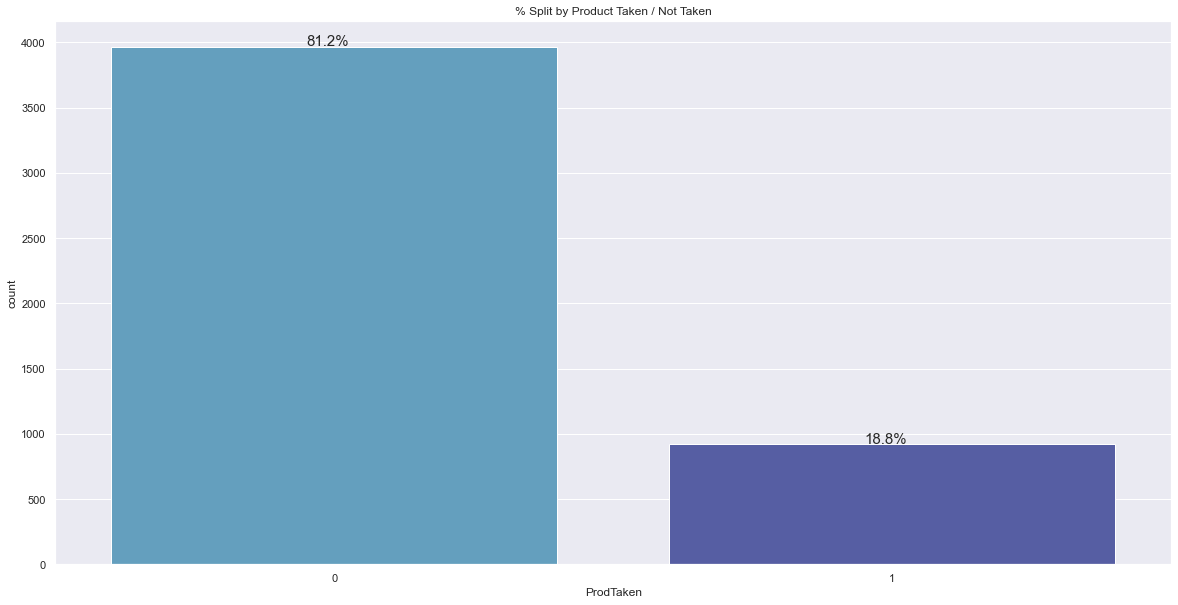

In [119]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(travel['ProdTaken']); # Each chart is named ax so that the percentages are shown for each bar vs. column total
plotpercent(ax,travel['ProdTaken'])
plt.title('% Split by Product Taken / Not Taken');

- Over 80% of the time the customers did not purchase the new travel package, with a **success rate of only 19%**

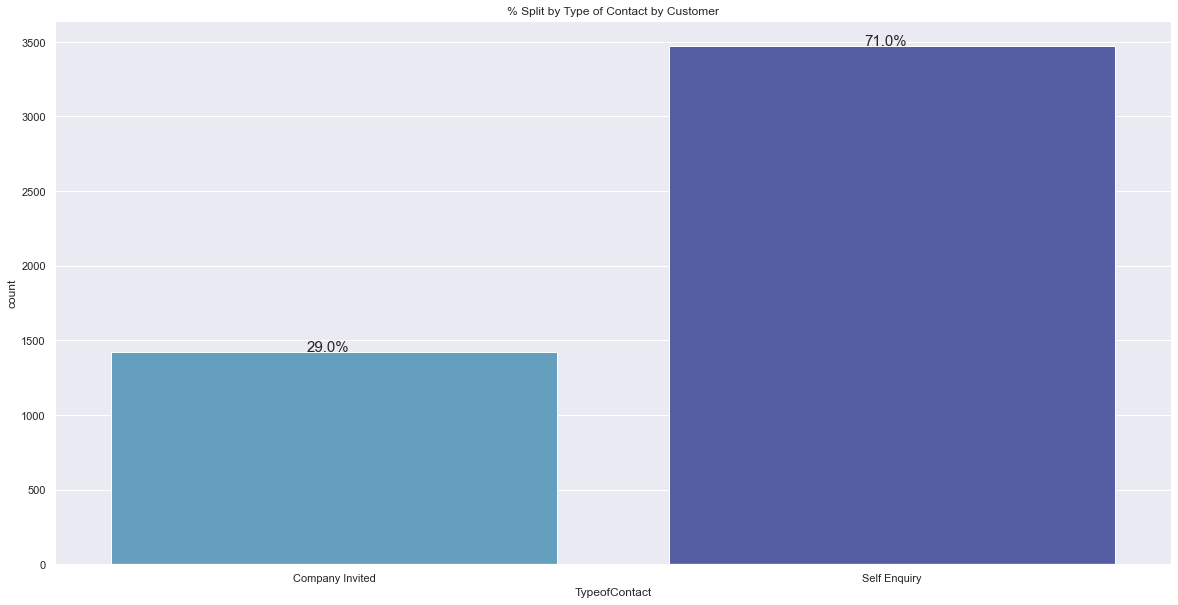

In [120]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(travel['TypeofContact']); # Each chart is named ax so that the percentages are shown for each bar vs. column total
plotpercent(ax,travel['TypeofContact'])
plt.title('% Split by Type of Contact by Customer');

- **Over 70% of enquiries received are made by the customers instead of their companies on their behalf**
- It will be worth reviewing the conversion of these enquiries and **whether or not company invitations influence their decision to purchase/partake the travel package**

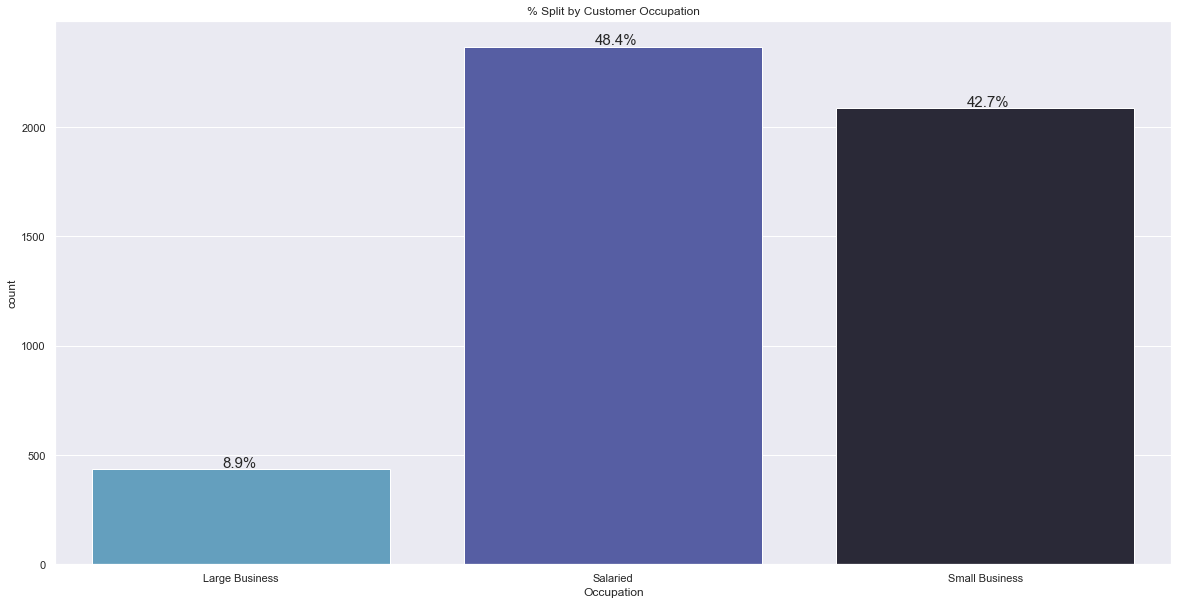

In [121]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(travel['Occupation']); # Each chart is named ax so that the percentages are shown for each bar vs. column total
plotpercent(ax,travel['Occupation'])
plt.title('% Split by Customer Occupation');

- Nearly **half the dataset is comprised of customers who are salaried workers**, with around **43%** of the remaining balance being associated with **small businesses**
- It is interesting that only around **9% of customers sampled are from large businesses**
    - **This could be an underserved customer base to promote our travel packages**

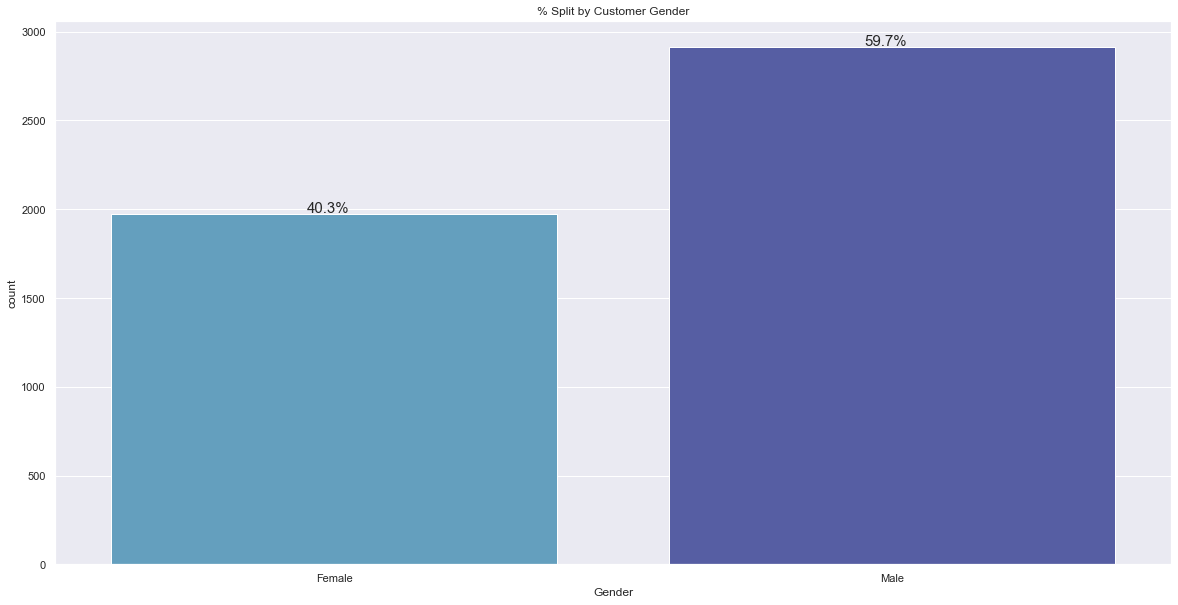

In [122]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(travel['Gender']); # Each chart is named ax so that the percentages are shown for each bar vs. column total
plotpercent(ax,travel['Gender'])
plt.title('% Split by Customer Gender');

- The sample dataset has a rough 60/40 split between Male to Female customers

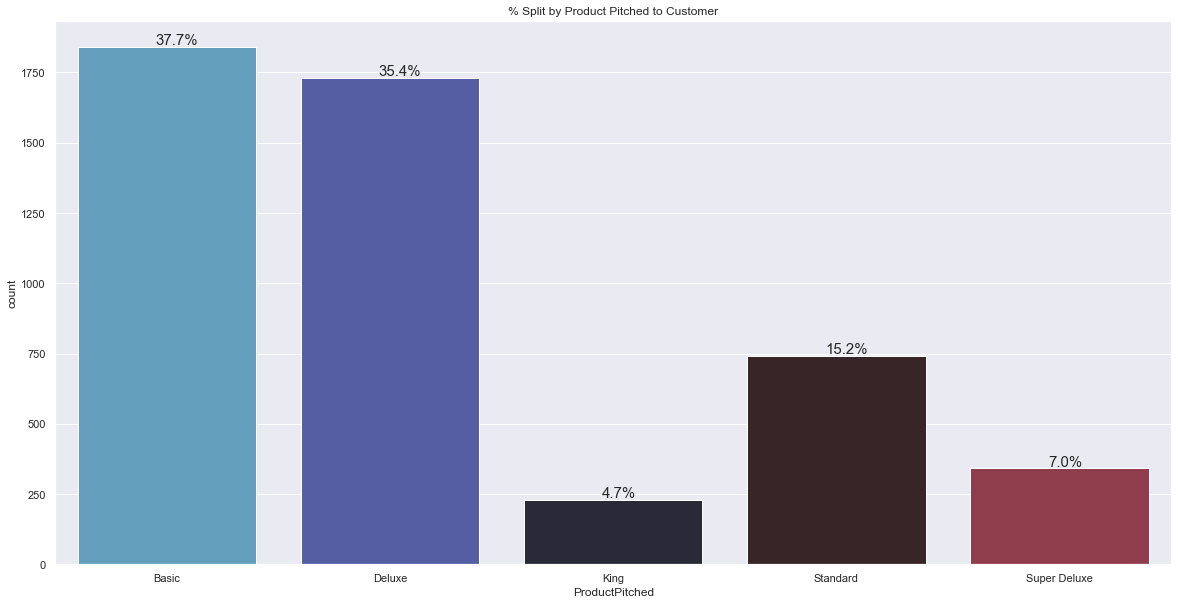

In [123]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(travel['ProductPitched']); # Each chart is named ax so that the percentages are shown for each bar vs. column total
plotpercent(ax,travel['ProductPitched'])
plt.title('% Split by Product Pitched to Customer');

- **Over 70% of the dataset is comprised of the Basic (38%) and Deluxe (35%) packages**
- The King package, possibly the most premium package on offer, accounted for only around 5% the dataset

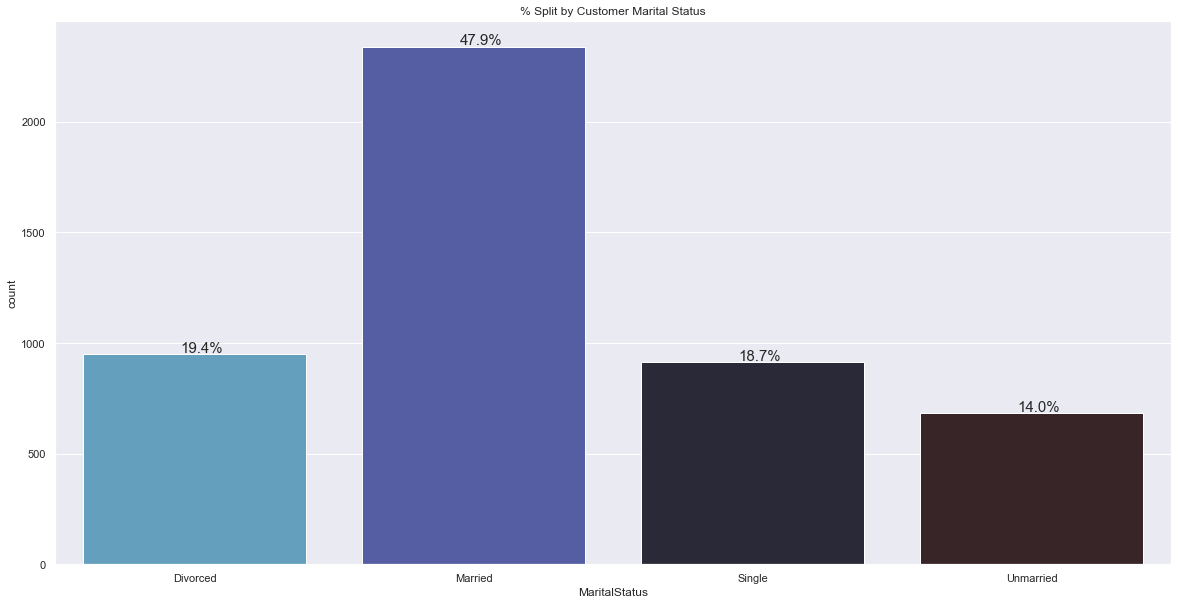

In [124]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(travel['MaritalStatus']); # Each chart is named ax so that the percentages are shown for each bar vs. column total
plotpercent(ax,travel['MaritalStatus'])
plt.title('% Split by Customer Marital Status');

- **Almost 50% of the dataset is comprised of married customers**
- They should likely be the top focus within the customer base
    - It is also worth noting that **unmarried customers (in a relationship) could be considered coupled and part of the same target group** as those customers who are married

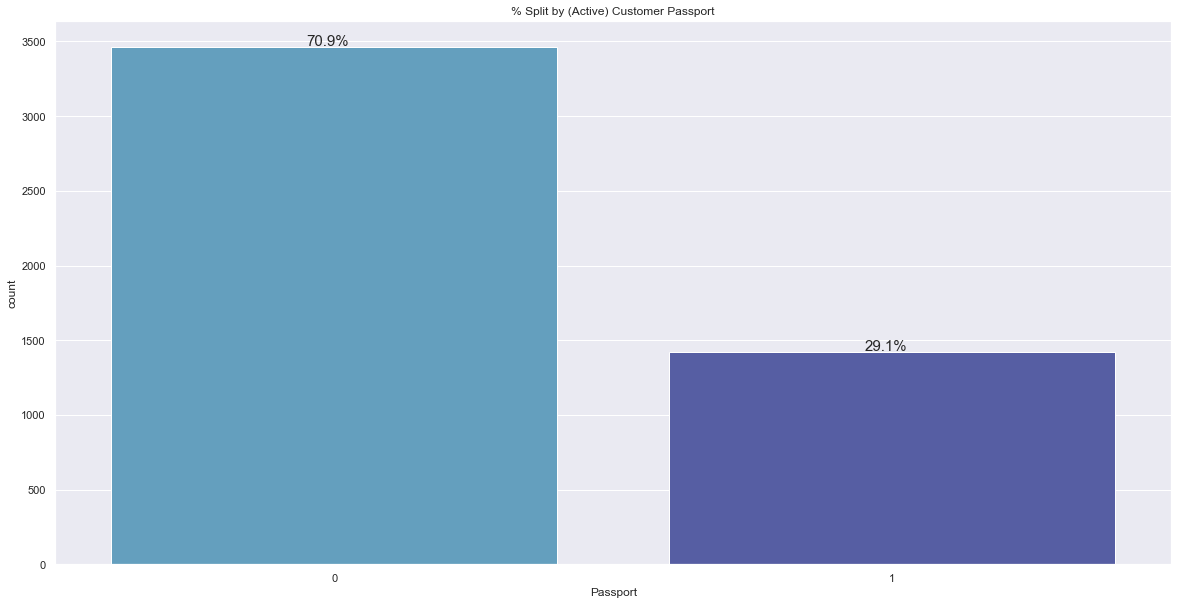

In [125]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(travel['Passport']); # Each chart is named ax so that the percentages are shown for each bar vs. column total
plotpercent(ax,travel['Passport'])
plt.title('% Split by (Active) Customer Passport');

- **Over 70% of the customers in the dataset do not own a (current) passport**
- These customers are only able to partake in domestic packages - **any marketing attempts for international packages would be wasted**

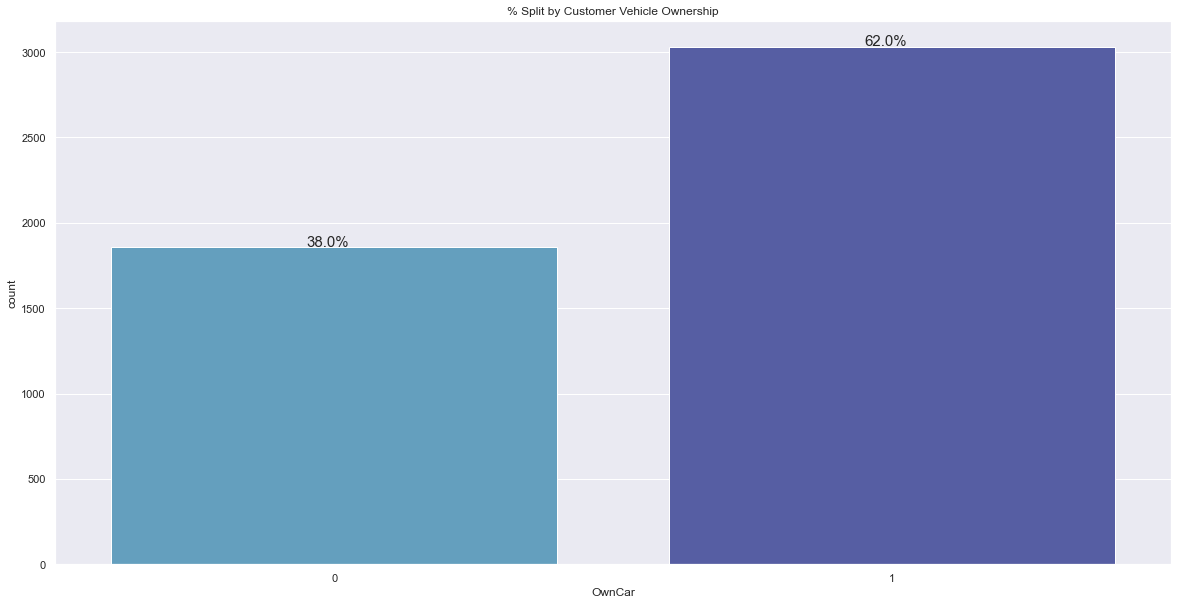

In [126]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(travel['OwnCar']); # Each chart is named ax so that the percentages are shown for each bar vs. column total
plotpercent(ax,travel['OwnCar'])
plt.title('% Split by Customer Vehicle Ownership');

- **Almost 40% of customers sampled do not own a car**
- This could affect their travel goals and could make them **sensitive to travel packages with transporation included**

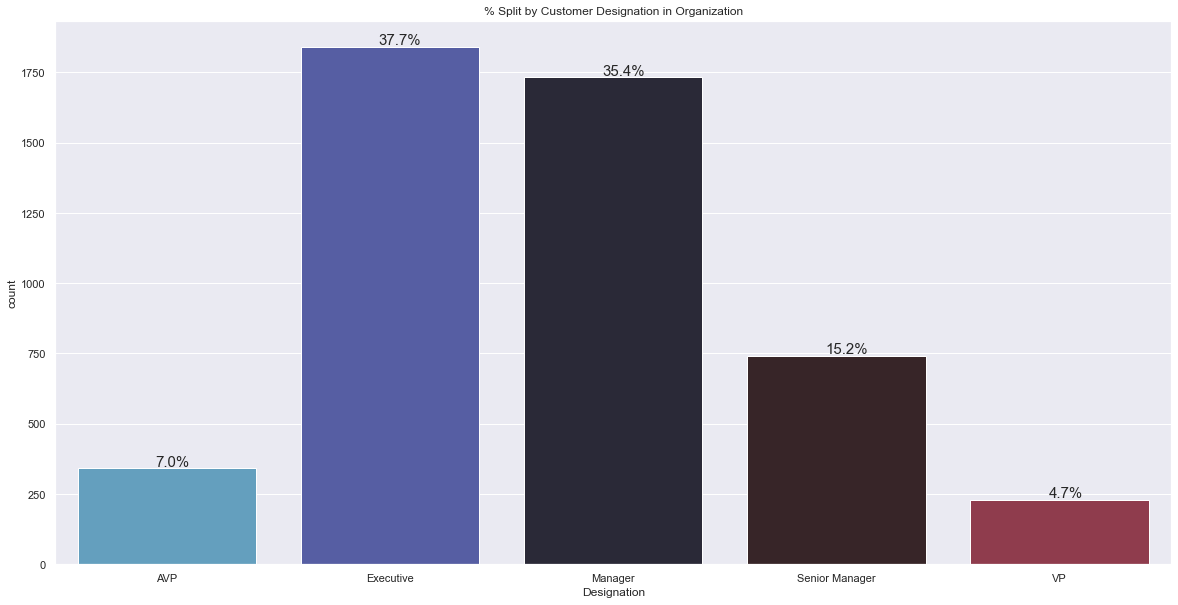

In [127]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(travel['Designation']); # Each chart is named ax so that the percentages are shown for each bar vs. column total
plotpercent(ax,travel['Designation'])
plt.title('% Split by Customer Designation in Organization');

- **Over 70% of the dataset is comprised of customers that are either at Executive (38%) or Managerial (35%) level**
- VPs, the highest designation, accounts for only around 5% of customers sampled


The proportions above appear identical to the variable: **Product Pitched to Customer**


This means that **the company is directly targeting only one type of travel package to each customer** based purly on their **designation** in the organization

### Univariate analysis - Numerical

In [128]:
# Create subplot function to show histogram & boxplot, on 2 rows and with a shared x axis, for numerical variables selected

def histbox(feature,figsize = (20,15), bins = None):
    f, (ax_box1, ax_hist1) = plt.subplots(nrows = 2,
                                         sharex = True,
                                         figsize = figsize)
    sns.distplot(feature,kde=True,ax=ax_hist1, bins=bins)
    ax_hist1.axvline(np.mean(feature), color = 'Red') # Include the column mean (blue) on the histogram
    ax_hist1.axvline(np.median(feature), color='Blue') # Include the column median (yellow) on the histogram
    sns.boxplot(feature,ax=ax_box1, showmeans=True, palette='rocket') # Include the column mean (triangle) on a red box
    plt.grid() 

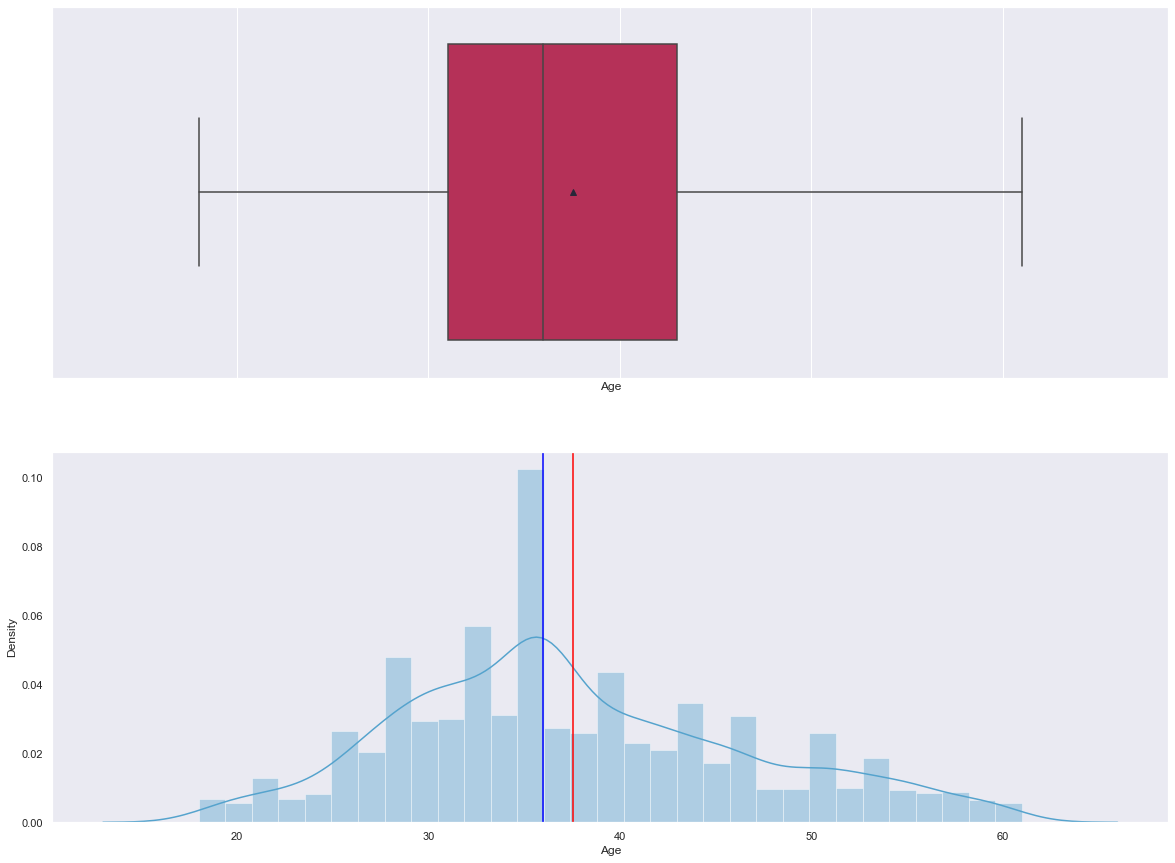

In [129]:
histbox(travel['Age'])

- Age is slightly right skewed (mean larger than median)
- The bulk of the dataset (IQR) is between the ages of around 32 and 43 years

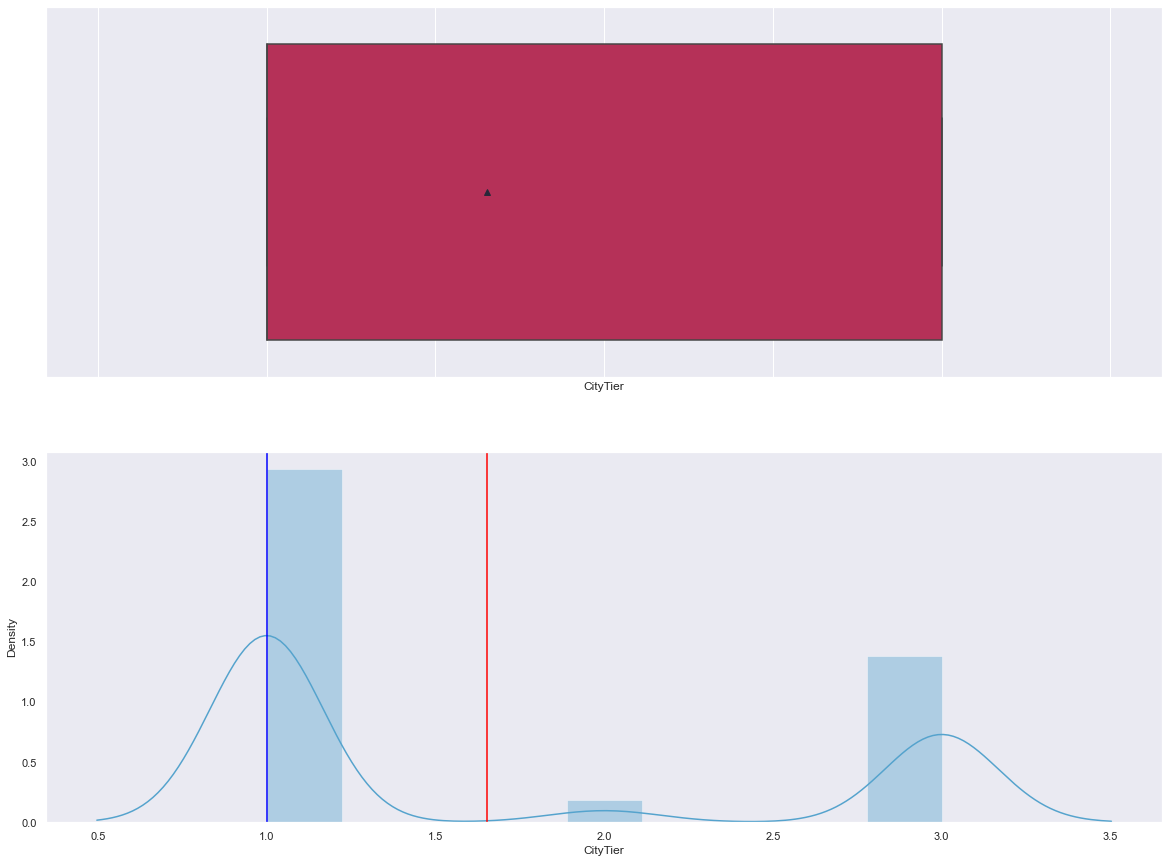

In [130]:
histbox(travel['CityTier'])

- The City Tier data is right skewed (mean higher than median)
- **The median tier is 1, indicating that a large percentage of the customers sampled come from more rural/less developed towns/cities**
- The data is largely skewed right due to numerous scores of 3 (indicating very advanced/developed cities where customers live)
- **Both tiers should be considered when building a customer profile** and determing likelihood of purchasing travel packages

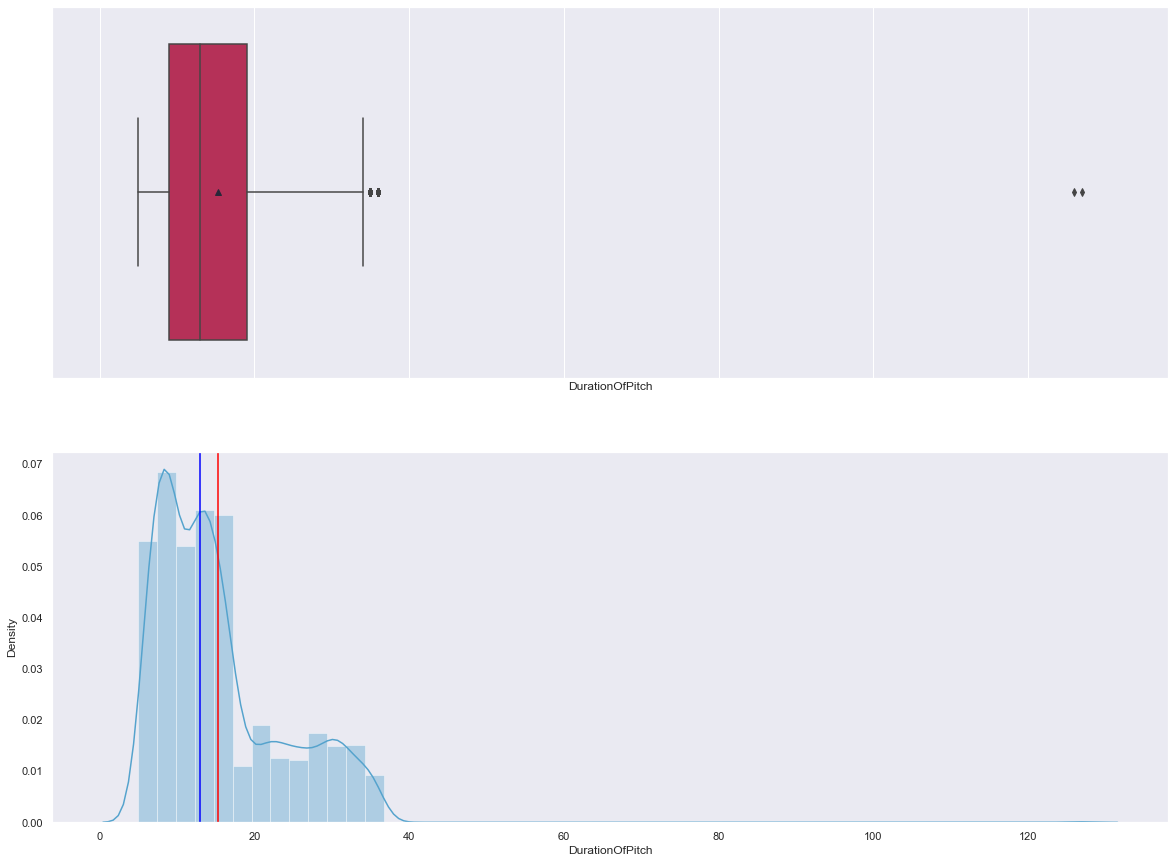

In [131]:
histbox(travel['DurationOfPitch'])

- The Duration of Pitch is slightly right skewed (mean higher than median)
- There are a **few outliers in the 36 to 38 minute range, as well as some extreme outliers to the far right, in the 130+ minute range**

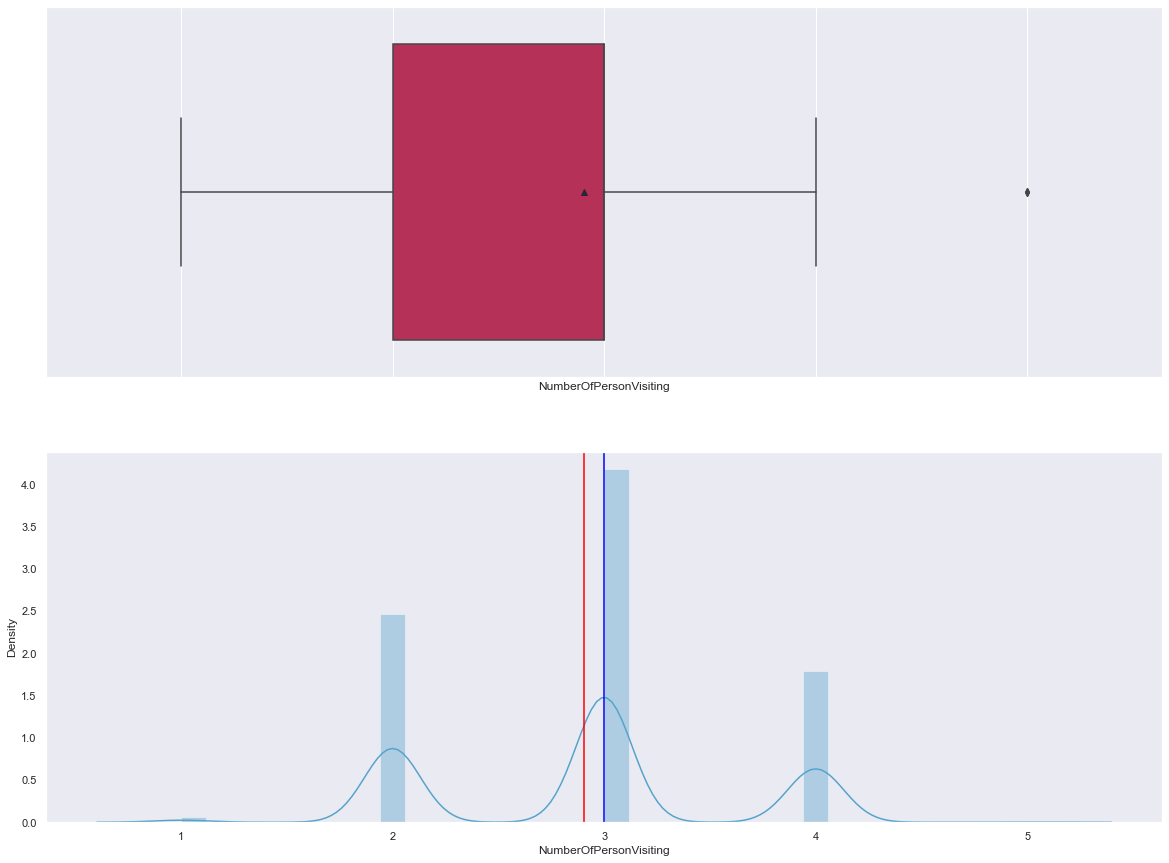

In [132]:
histbox(travel['NumberOfPersonVisiting'])

- **The Number of Persons visiting is slightly left skewed (mean lower than median), with a median count of 3 people visiting**
- There are a handful of outliers where 5 people visited as part of a particular travel package

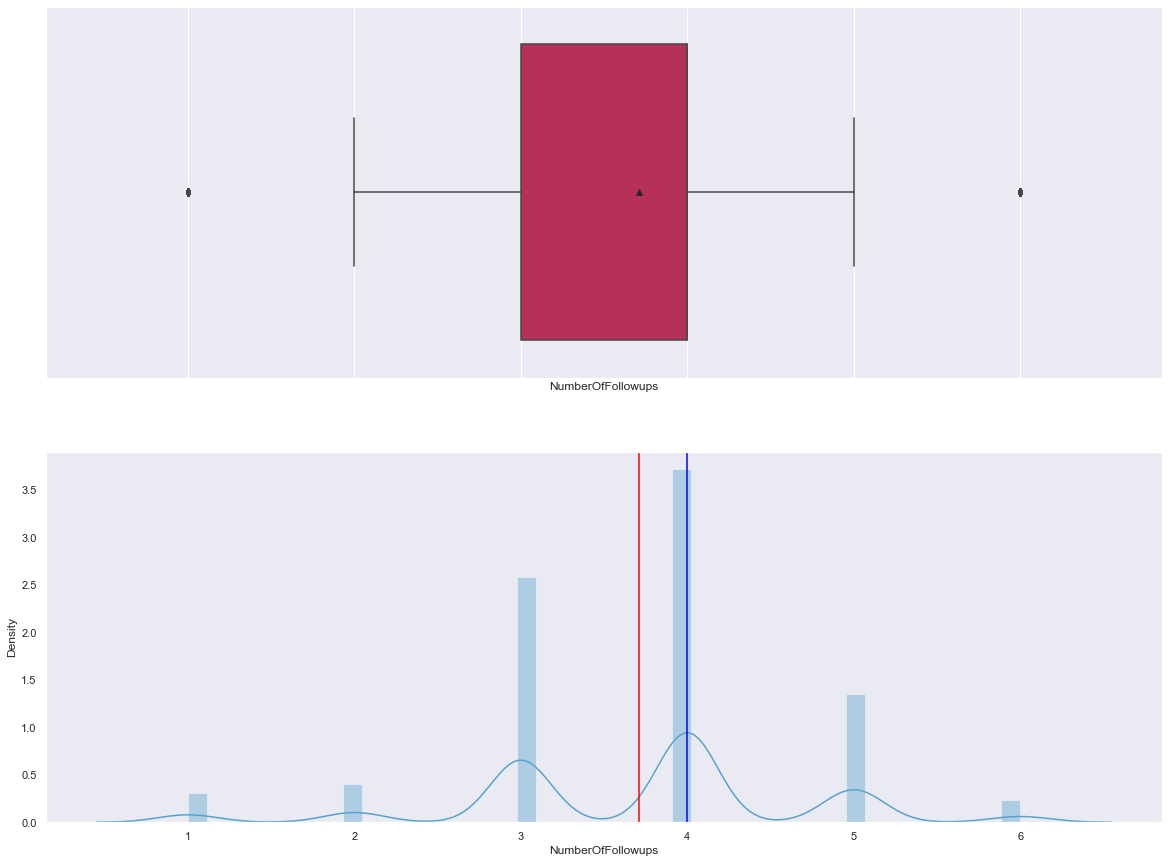

In [133]:
histbox(travel['NumberOfFollowups'])

- The Number of Follow-ups in the sample dataset are **left skewed (mean lower than median), with a median score of 4**
    - This is due to the **numerous cases where salespeople only followed up with the customer once/twice**, partially offset by more extreme cases where there were follow-ups recorded of five, sometimes six, occurrences

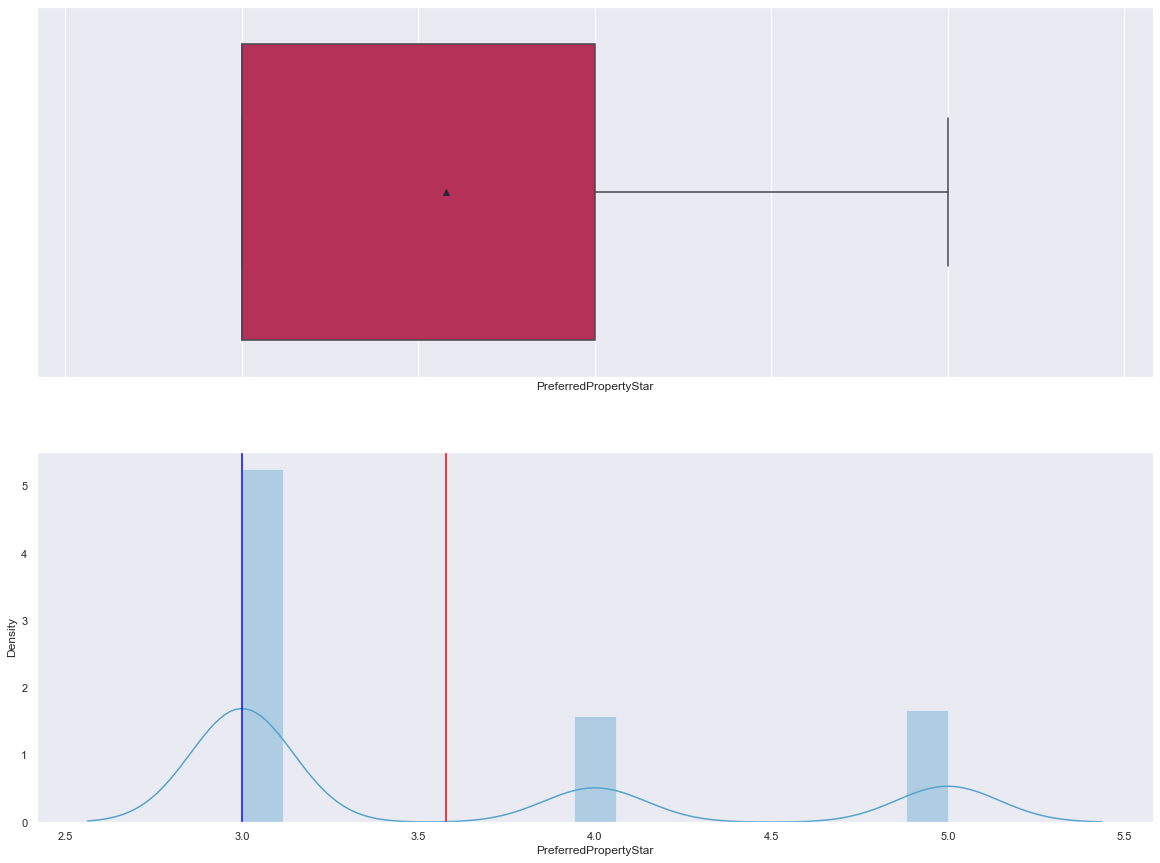

In [134]:
histbox(travel['PreferredPropertyStar'])

- None of the customers sampled scored a property below 3 out of 5
- The **majority of Property Stars scored is 3 out of 5 (Median)**, however the data skews right due to a decent amount of scores of 4 and 5 out of 5

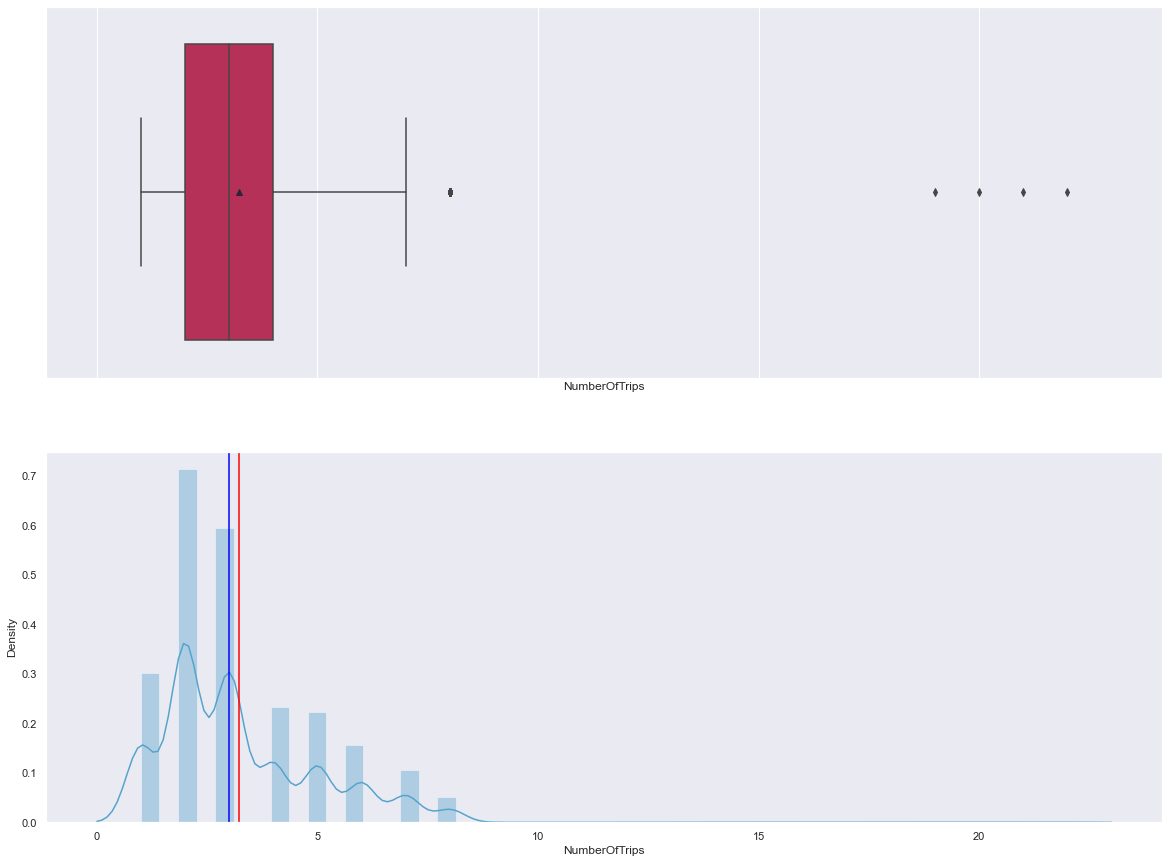

In [135]:
histbox(travel['NumberOfTrips'])

In [136]:
# Inspect outliers of 18 or more trips in a year - could be valid with short business trips, etc.

travel[travel['NumberOfTrips']>=18]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0


 - The most frequent amount of trips taken in a year by the customers sampled is 2, however the overall **Mean/Median lie at around 3**
 - There are outliers from 8 trips or higher, with some extreme cases in the 18+ range (only 4 customers however)
     - These could be actual cases of customers making many business/personal trips in a year - it can be left for now

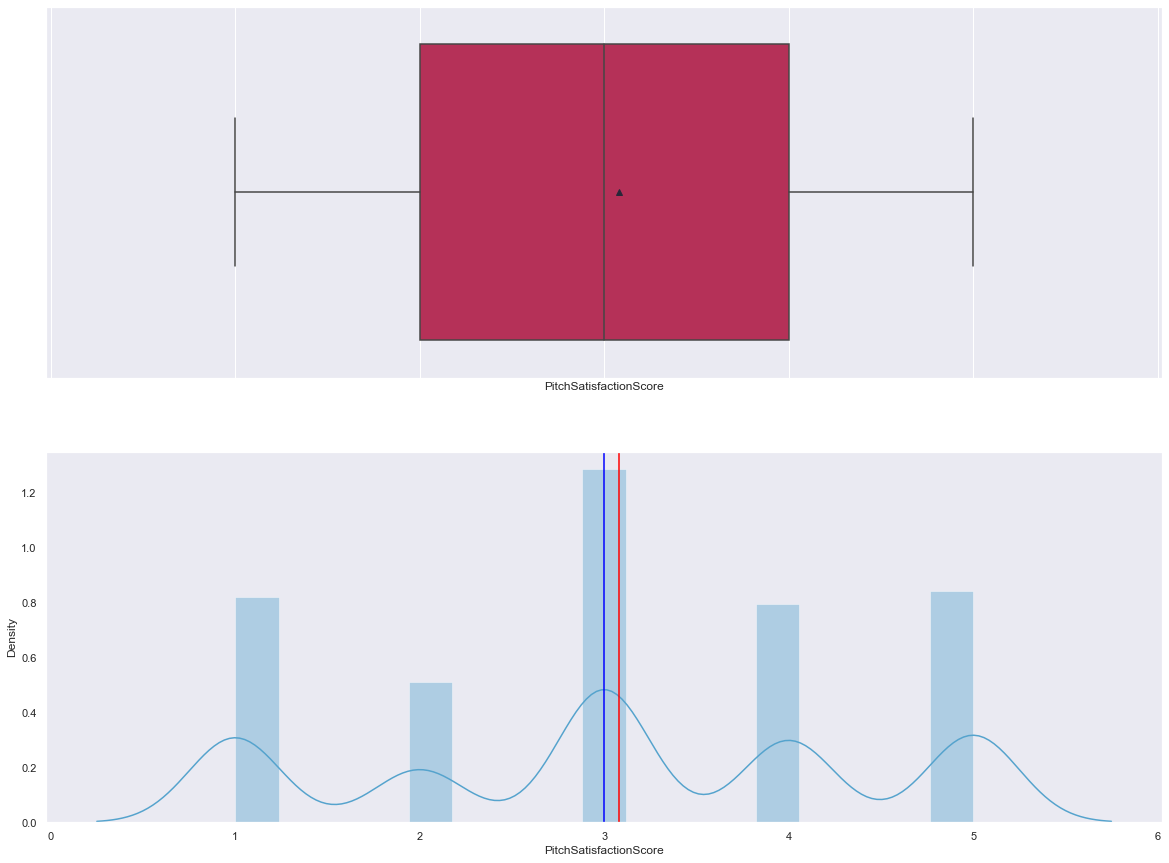

In [137]:
histbox(travel['PitchSatisfactionScore'])

- Although there are 5 datapoints, the bulk of the dataset is normally distributed around a score of 3 (Mean equal to Median if rounded)

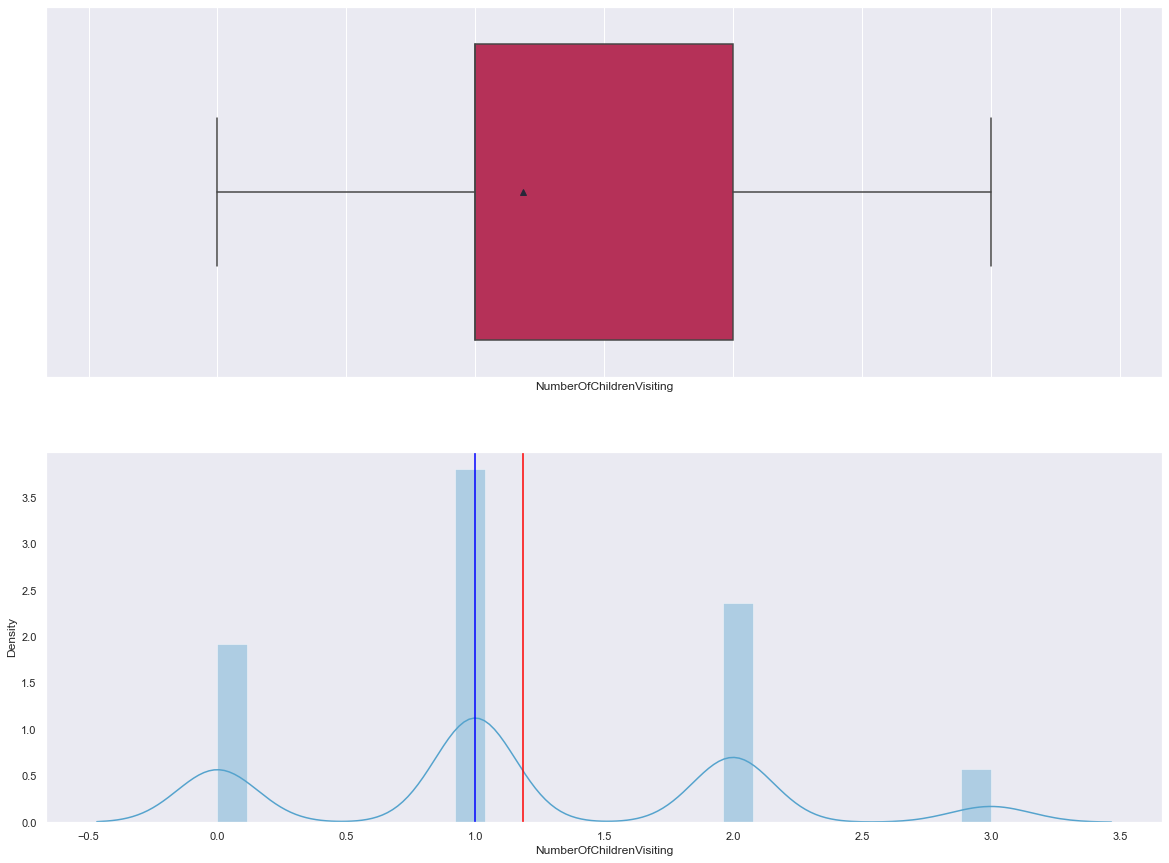

In [138]:
histbox(travel['NumberOfChildrenVisiting'])

- The most common number of children visiting **(Median) is 1**, however the overall dataset is **right skewed due to occurences when 2 or even 3 (maximum in sample) children attend**

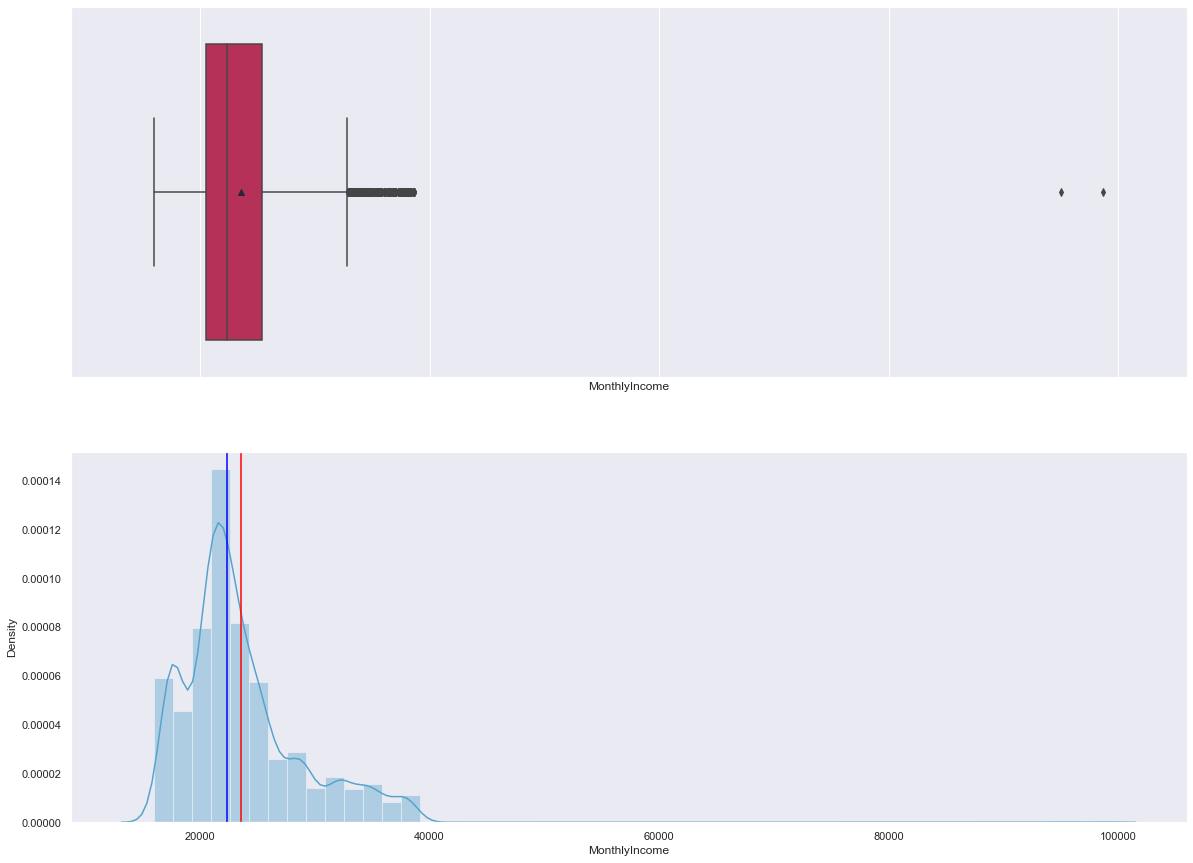

In [139]:
histbox(travel['MonthlyIncome'])

- The monthly incomes sampled skew slightly to the right (mean higher than median)
- There are **numerous outliers in the approximate range of \\$35k to \\$38k**
    - There are 2 additional outliers further out right, in the \\$95k to \\$98k range
    - These have been reviewed and validated to be accurate anomolies within the data and not to be removed/adjusted

### Bivariate Analysis

In [140]:
# Calculate the correlation between all numeric values

Corr = travel.corr()
Corr

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome
Age,1.000000,-0.012754,-0.006261,0.017856,0.001682,-0.015932,0.174694,0.017392,0.008486,0.462914
CityTier,-0.012754,1.000000,0.019445,-0.001671,0.024333,-0.008479,-0.028749,-0.042160,0.000578,0.050868
DurationOfPitch,-0.006261,0.019445,1.000000,0.073163,0.015515,-0.005442,0.014153,-0.002552,0.038115,0.002273
NumberOfPersonVisiting,0.017856,-0.001671,0.073163,1.000000,0.324895,0.030519,0.190113,-0.019581,0.606321,0.198135
NumberOfFollowups,0.001682,0.024333,0.015515,0.324895,1.000000,-0.026989,0.135103,0.004405,0.281583,0.176092
PreferredPropertyStar,-0.015932,-0.008479,-0.005442,0.030519,-0.026989,1.000000,0.009432,-0.024019,0.031362,-0.001614
NumberOfTrips,0.174694,-0.028749,0.014153,0.190113,0.135103,0.009432,1.000000,-0.004501,0.161022,0.116602
PitchSatisfactionScore,0.017392,-0.042160,-0.002552,-0.019581,0.004405,-0.024019,-0.004501,1.000000,0.000251,0.031144
NumberOfChildrenVisiting,0.008486,0.000578,0.038115,0.606321,0.281583,0.031362,0.161022,0.000251,1.000000,0.188985
MonthlyIncome,0.462914,0.050868,0.002273,0.198135,0.176092,-0.001614,0.116602,0.031144,0.188985,1.000000


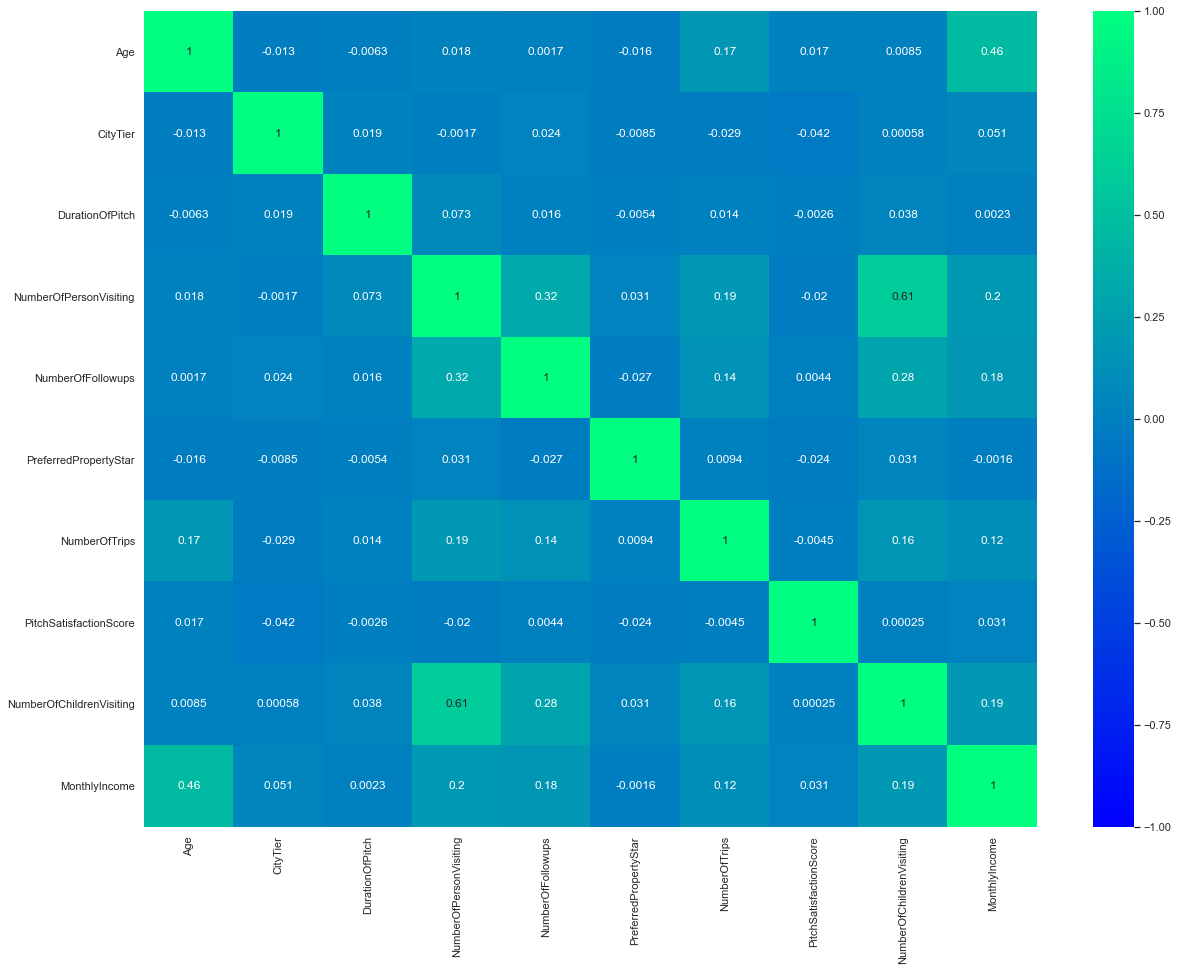

In [141]:
# Create a summary heatmap of the correlatlion between all numeric variables in the sample dataset, with annotation of values

plt.figure(figsize=(20,15))
sns.heatmap(Corr, annot=True, vmin=-1, vmax=1, fmt='.2g', cmap='winter');

<Figure size 1440x1080 with 0 Axes>

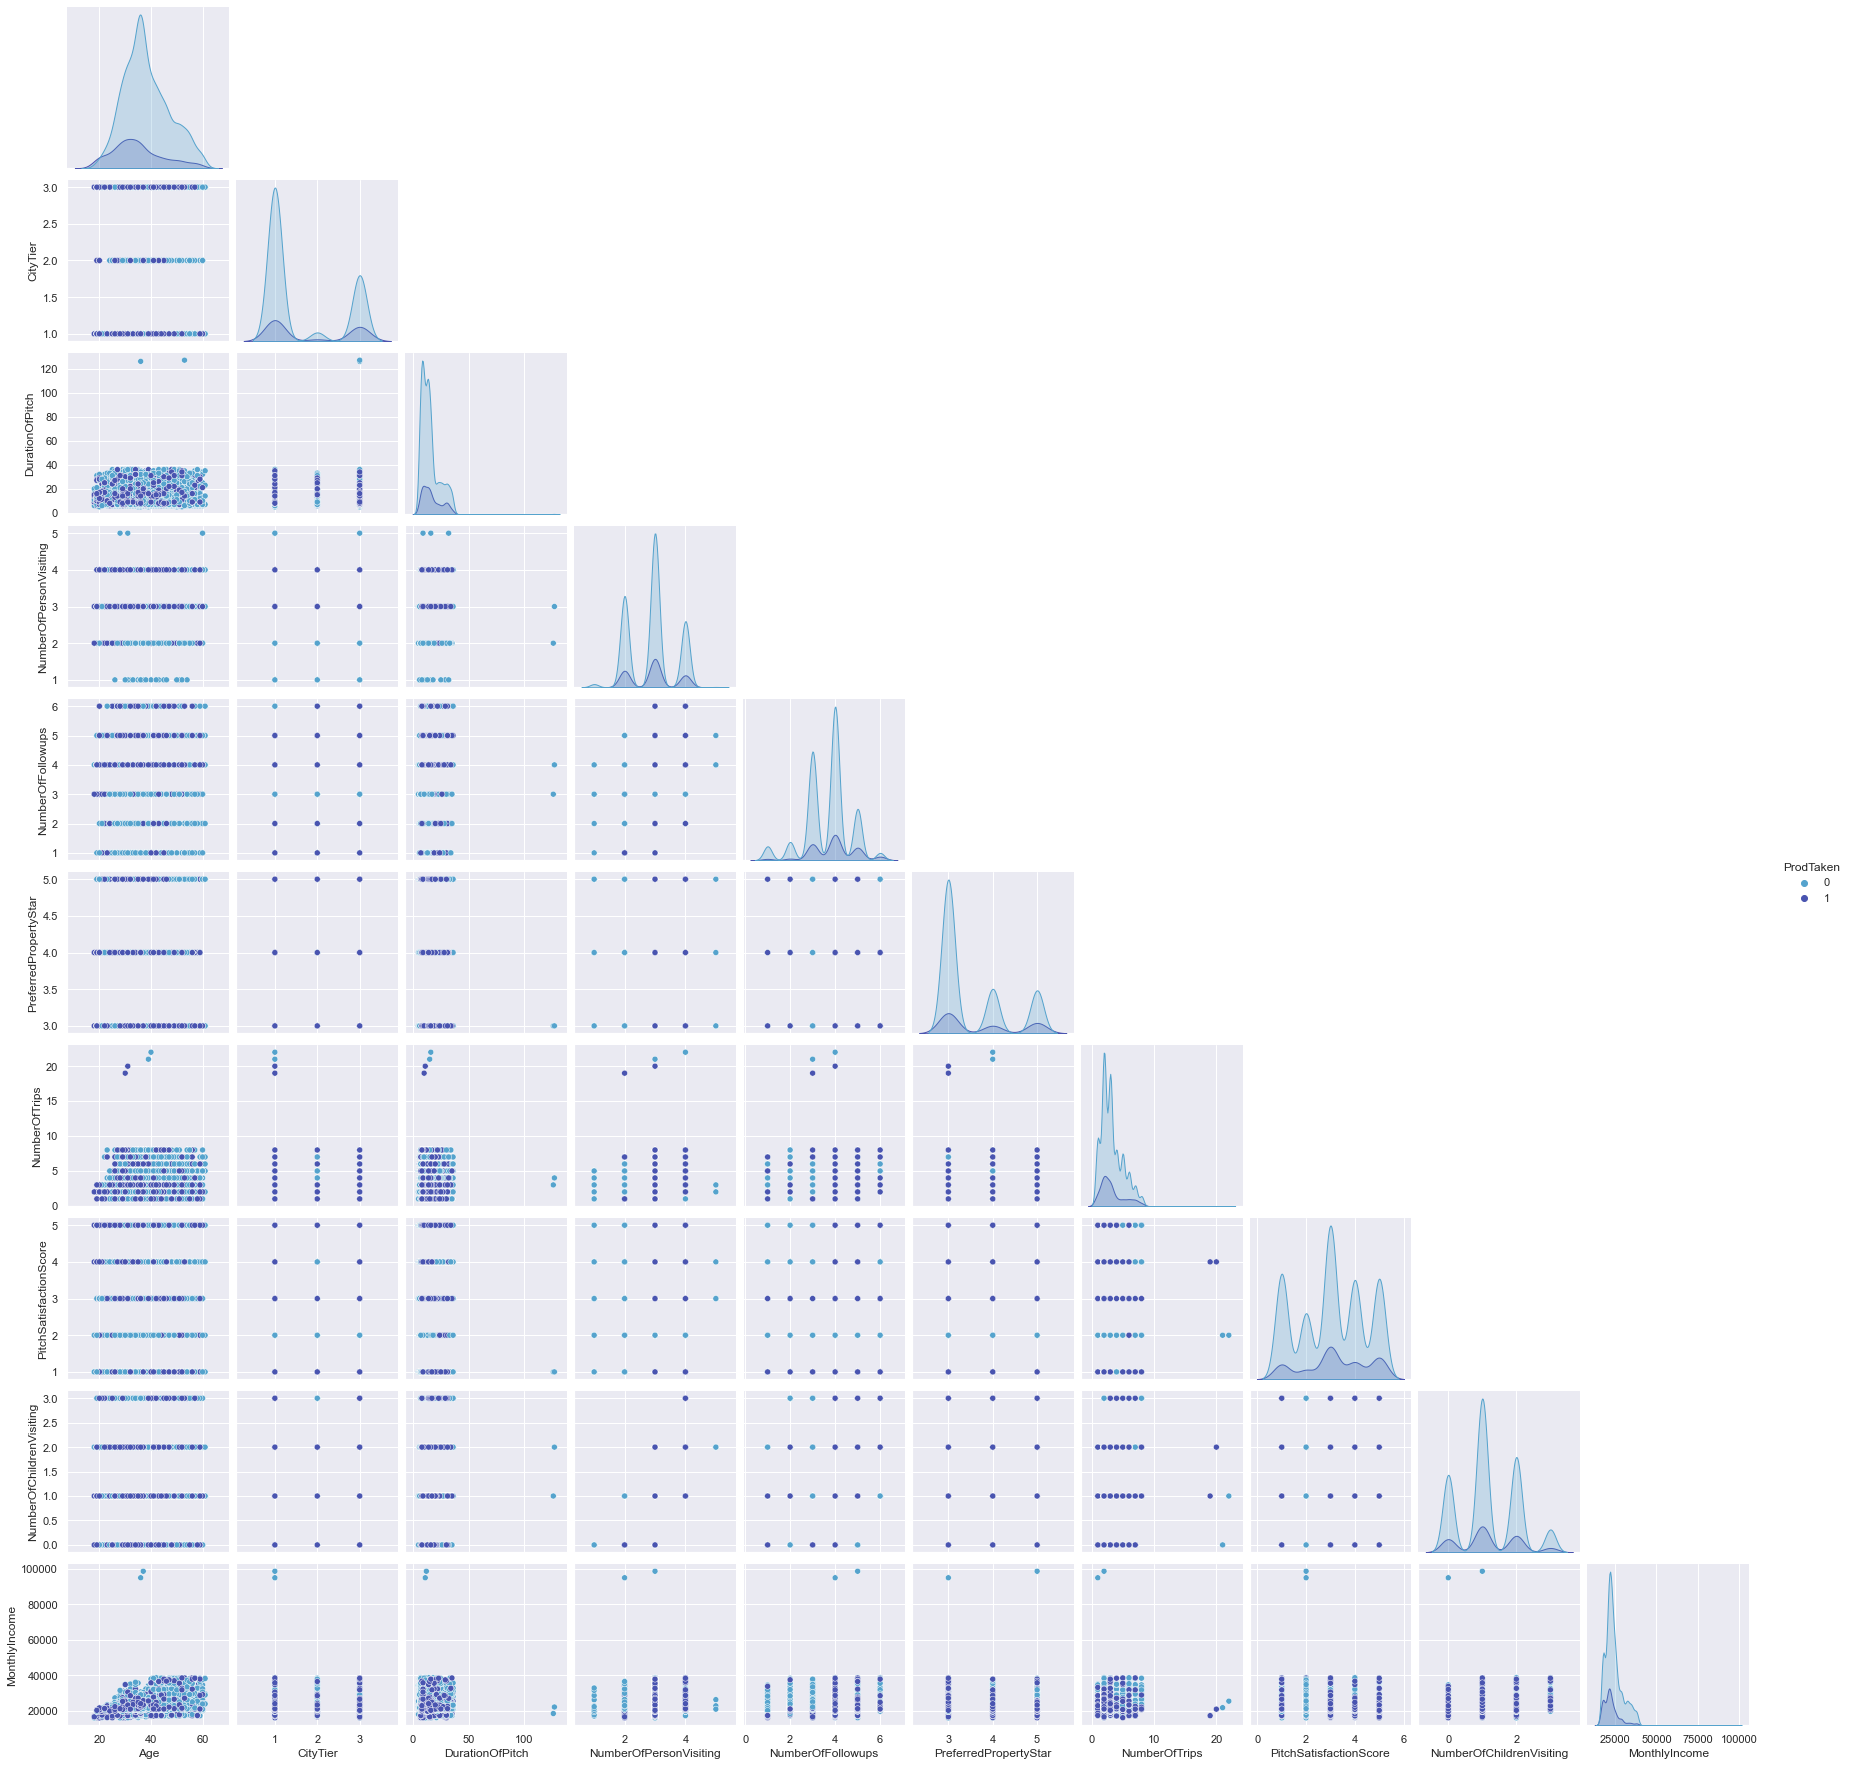

In [142]:
# Examine the correlations of all numeric variables using a pairplot (corner split) graph, with target (Prod Taken as Hue)

plt.figure(figsize=(20,15))
sns.pairplot(travel, hue='ProdTaken', corner=True);

### Insights
- There are relatively strong correlations between:
    - Number of Persons Visiting and Number of Children Visiting, which makes sense intuitively
    - Age and Monthly Income, which is often true as it is expected that younger people would be less qualified and earn less than their older counterparts
- Interestingly, there is a **slight correlation between Number of People/Children Visiting and Number of Follow Ups**
    - This appears to imply that our **salespeople are targeting families more frequently than single individuals or couples without children**, which may or may not be the correct approach depending on the type of package and sales success rate
- Most customers have done between 1 and 9 trips a year, with some outlier customers doing over 20 trips a year on average
- It is curious that **higher preferred property scores don't appear to affect purchase conversion** (5 vs. 4 or 3, etc.)
- There is a much **higher conversion of package purchases when follow-ups occur 4 or more times**
- **A Pitch Satisfaction Score of 3 or higher is crucial for higher customer conversion**, however there is data supporting that even at a Satisfaction Score of 1, some customers still purchased the travel packages and were unaffected by the sales pitch
- The customers sampled earn an average income of around \\$23k and range from ages 18 to 61
    - **The bulk of conversions occur in ages 18 to 55 and incomes from roughly \\$18k to \\$30k**


### Travel Package Purchased vs Key (Numeric) Customer Insights

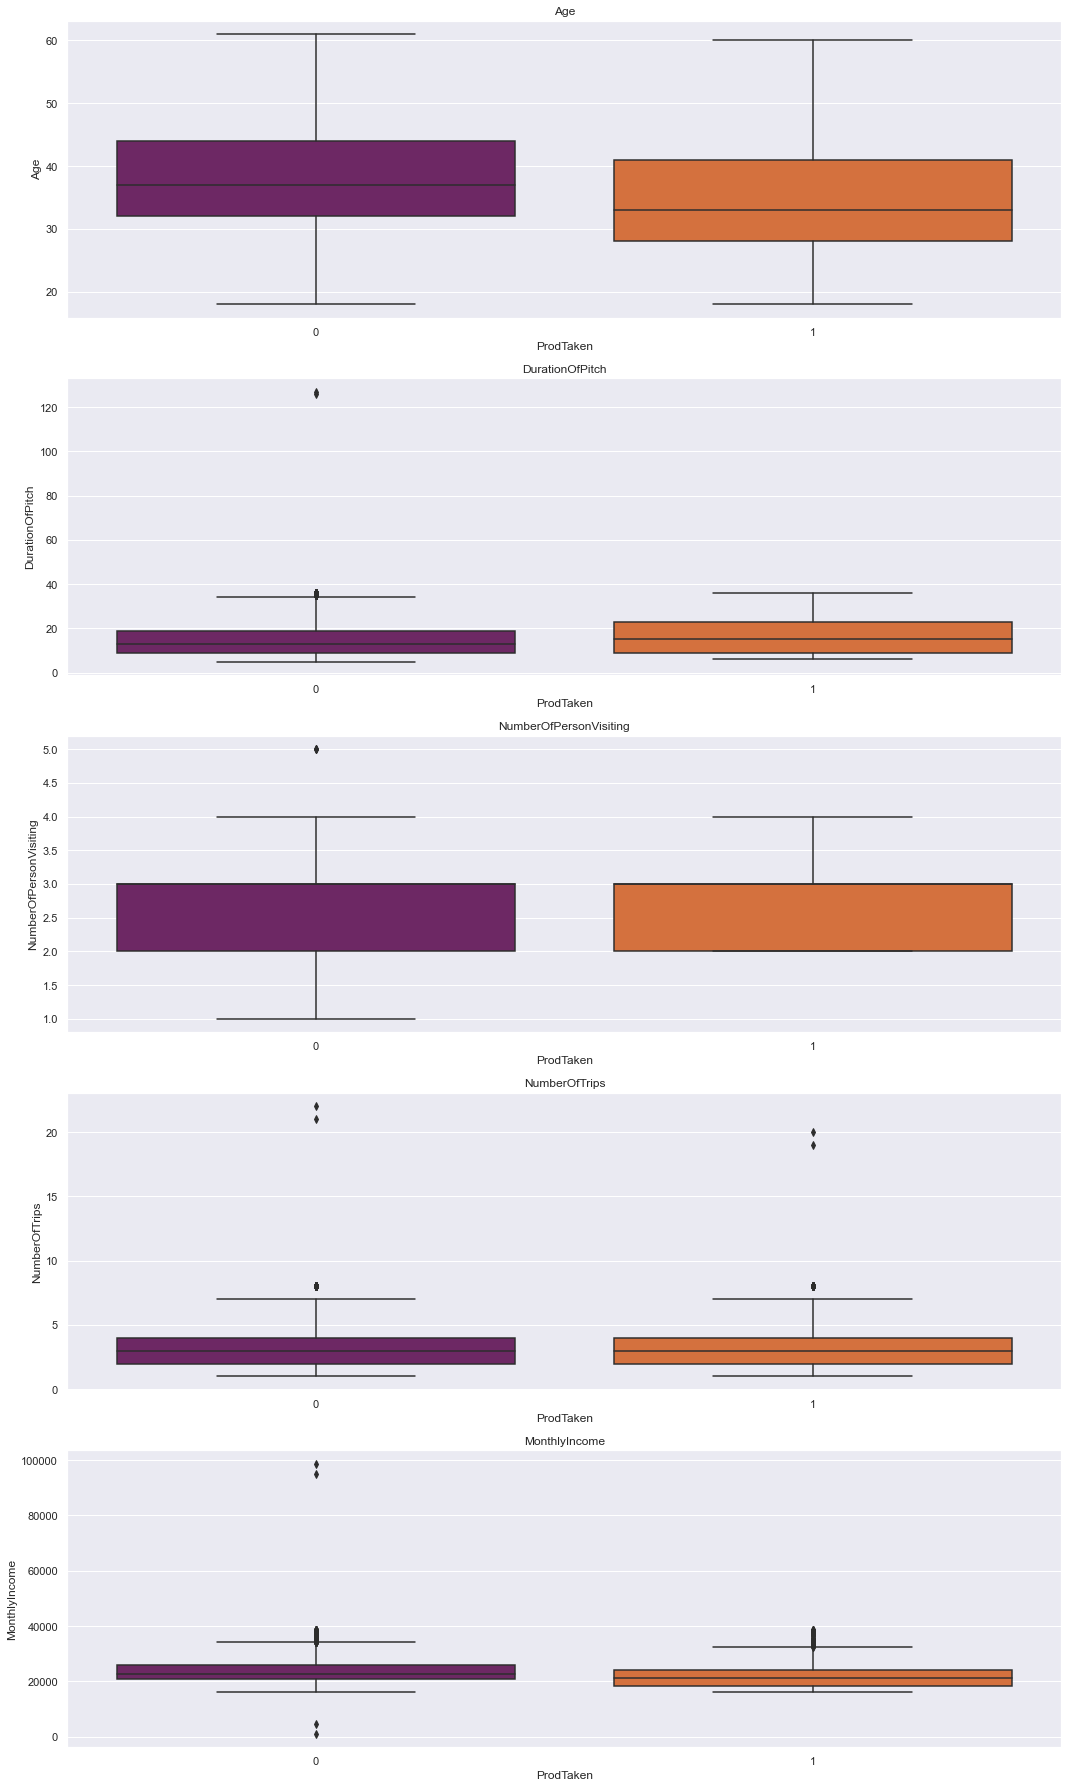

In [143]:
# Create a box plot summary chart for all Customer Interaction Details and Conversion towards Travel Package Purchases

Score_Cols = travel[['Age','DurationOfPitch','NumberOfPersonVisiting','NumberOfTrips','MonthlyIncome']].columns.tolist()

plt.figure(figsize=(15,25))
for i, variable in enumerate(Score_Cols): # Enumerate will create pairs of the Element and Index (Count) in Score_Cols list
                     plt.subplot(5,1,i+1)
                     sns.boxplot(travel["ProdTaken"],data[variable],palette='inferno')
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- Regarding Age, **customers purchasing the travel package are younger on average**, with an IQR range of approximately 29 to 41 vs. customers not purchasing the package, with an IQR range of approximately 33 to 45
- There appears to be some **slight benefit to longer pitch presenation times** leading to higher conversion of travel package conversions
- The number of trips taken or the amount of people visiting **doesn't offer much insight into likelihood of travel package purchases**
- This particularl travel package appeared to **convert better for customers with slightly lower incomes** than their counterparts who did not purchase the package

### Travel Package Purchased vs Key (Categorical) Customer Insights

In [144]:
# Create a Stacked Bar and Summary CrossTab for each Categorical column

def stacked_summary(x):
    sns.set(palette='icefire')
    tab1 = pd.crosstab(x,travel['ProdTaken'],margins=True) # Compare each x variable to the target variable - Prod Taken
    print(tab1)
    print('-'*120)
    
    tab = pd.crosstab(x,travel['ProdTaken'],normalize='index') # Create similar crosstab as above, for graphical visualization
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


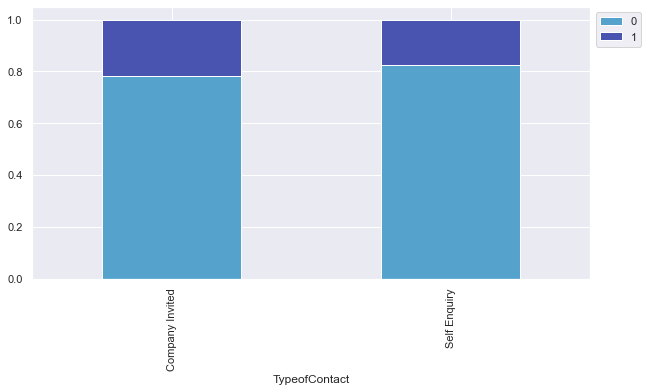

In [145]:
stacked_summary(travel['TypeofContact'])

- **Customers who were invited by their company** have a slightly higher chance of purchasing the travel package
    - This could be affected by the company contributing towards some/all of the expenses incurred or could be motivating customers due to a sense of loyalty or obligation to the company

ProdTaken          0    1   All
Occupation                     
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  386  2086
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


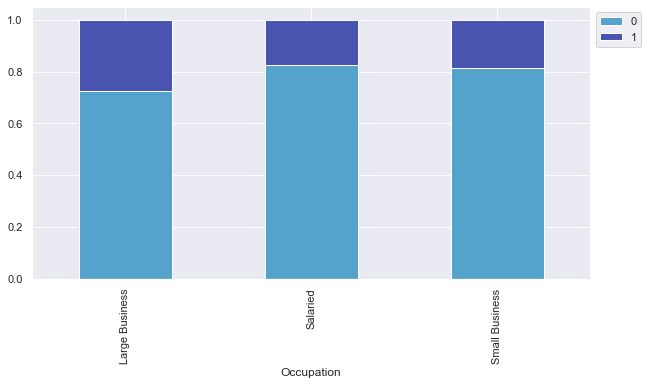

In [146]:
stacked_summary(travel['Occupation'])

- Customers working for **large businesses have a much higher conversion rate** than who are salaried or working for small businesses

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


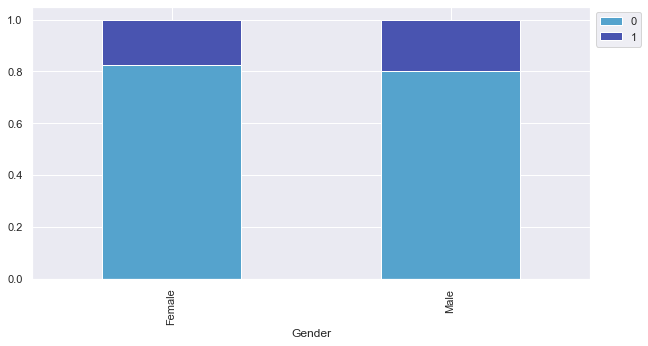

In [147]:
stacked_summary(travel['Gender'])

- There is only a slight difference in conversion rates between **Males and Females, at roughly 20% and 18% respectively** - very little insight is gained from this variable alone

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


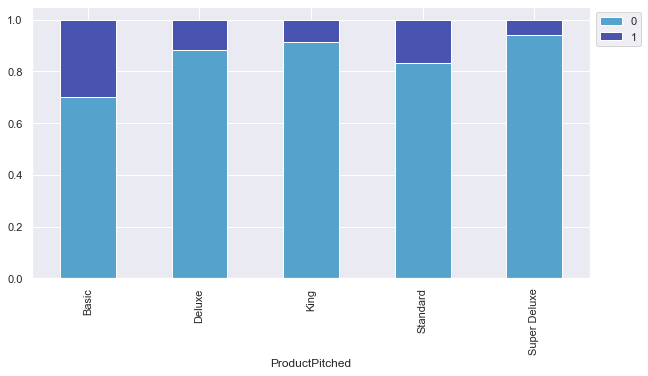

In [148]:
stacked_summary(travel['ProductPitched'])

- **The Basic package has the best conversion rate by far, with roughly 30% of customers targeted making a purchase**
- This is followed by the **Standard package**, which is substantially better than the remaining packages, **converting at around 18%**

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


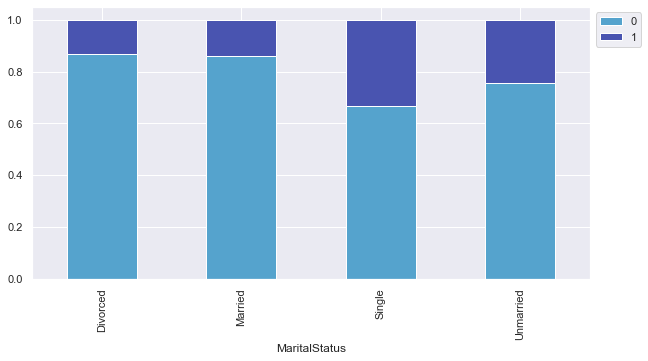

In [149]:
stacked_summary(travel['MaritalStatus'])

- Although married customers, and coupled customers in general if including those unmarried, make up a large portion of the dataset sampled, **single customers actually convert the best at roughly 35%**

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


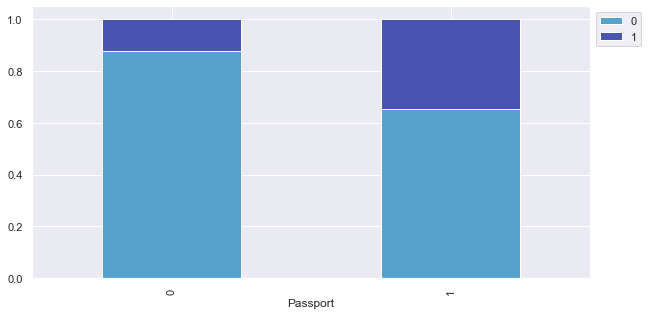

In [150]:
stacked_summary(travel['Passport'])

- Customers who own valid passports are more than **twice as likely to purchase a travel package** (rougly 37% vs. 16% respectively)

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


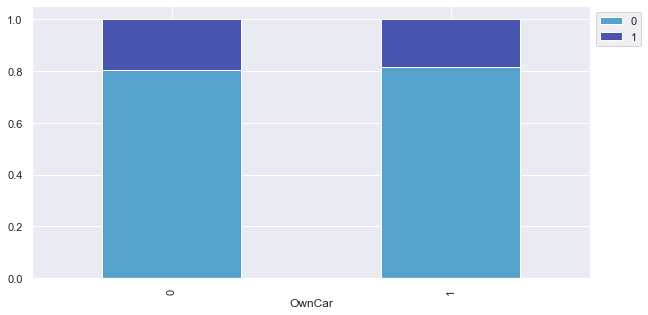

In [151]:
stacked_summary(travel['OwnCar'])

- Although there is a higher portion of customers sampled who do not own a car, the actual **conversion rates in purchasing a travel package so no difference between the two groups**

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


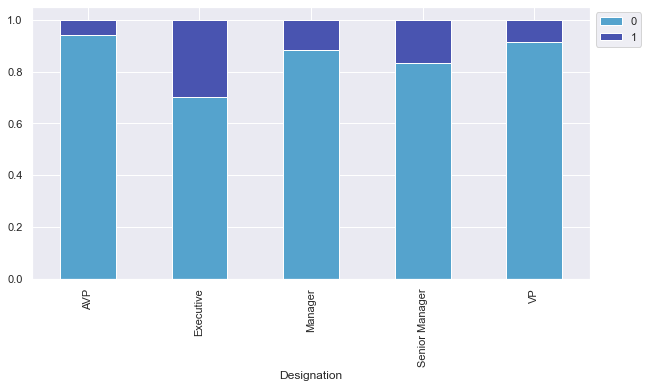

In [152]:
stacked_summary(travel['Designation'])

- Those customers designated Executive status have the best conversion rate by far, roughly 30%
- This is followed by Senior Managers, at around 18%
- There appears to be a **visibly noticible correlation between the customer designation and the respective travel package pitched**, as follows:
    - Executive - Basic Package
    - Senior Manager - Standard Package
    - Manager - Deluxe
    - VP - King
    - AVP - Super Deluxe
    
It would appear that the ordering of these packages pitched is somewhat flawed:
- Managers being pitched better packages than Senior Managers (Deluxe vs. Standard)
    - However, it's worth noting that **titles can be confusing and not always accurate at inferring 'True' seniority** 

In [153]:
# Build a summary crosstab of Products Pitched by Designation

crosstab = pd.crosstab(travel['ProductPitched'],travel['Designation'])
crosstab

Designation,AVP,Executive,Manager,Senior Manager,VP
ProductPitched,,,,,
Basic,0,1842,0,0,0
Deluxe,0,0,1732,0,0
King,0,0,0,0,230
Standard,0,0,0,742,0
Super Deluxe,342,0,0,0,0


- It is apparent that **only one type of package is ever pitched to a customer**, based on their employment designation/title within the organization
- It would seem that the **packages pitched to Managers and Senior Managers should be inverted** so as to correctly align the ordinal flow of packages with customer job designation

### Multivariate Analysis: Correlation to Product Taken Variable

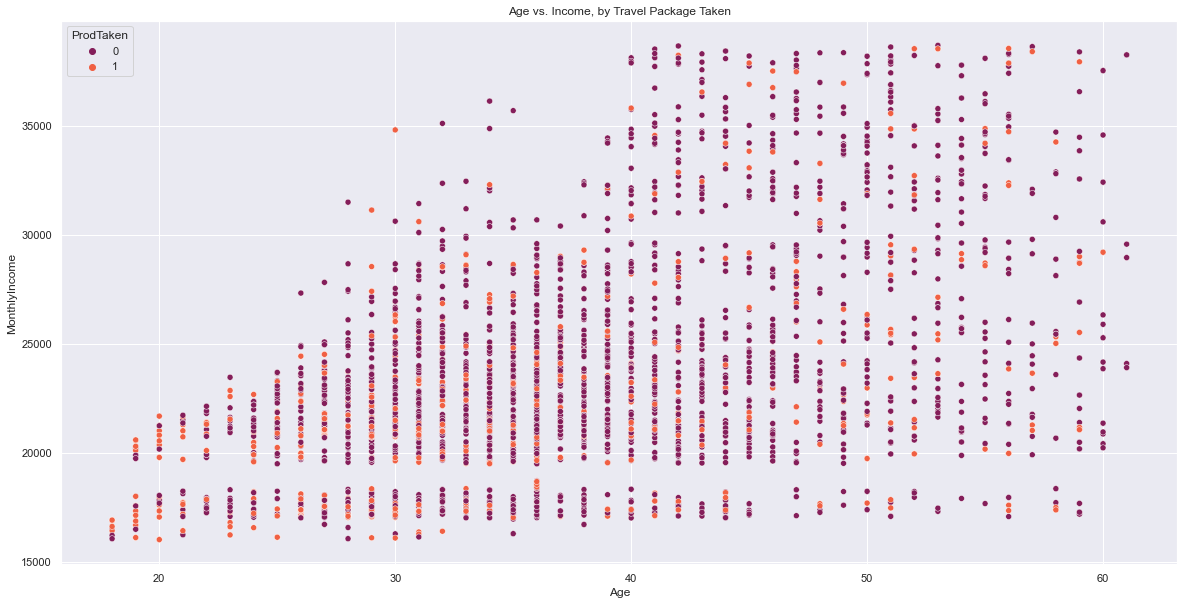

In [154]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

# Set a limit of under $40k income, to exclude outliers 
sns.scatterplot(x=travel['Age'], y=travel['MonthlyIncome'][travel['MonthlyIncome']<=40000], hue=travel['ProdTaken']
            , palette='rocket', ci=None); # Removing Confidence Interval lines);

plt.title('Age vs. Income, by Travel Package Taken');

- Although there exists some correlation and linear regression between Age and Monthly Income, **there are many cases where older customers have far lower incomes than their younger counterparts**
    - This could be due to retirement or part-time employment or a variety of other reasons that are hard to determine from just the data provided
- **There doesn't appear to be any strong indication of likelihood of purchasing the new Wellness Travel Package** regardless of a customer's Age or Monthly Income

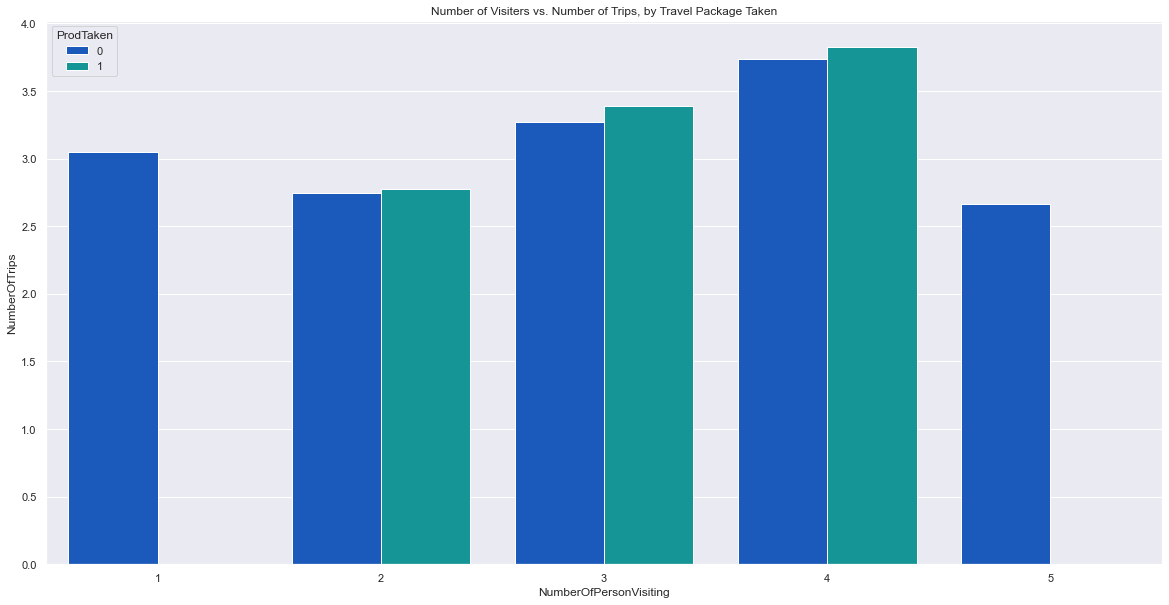

In [155]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
sns.barplot(x=travel['NumberOfPersonVisiting'], y=travel['NumberOfTrips'], hue=travel['ProdTaken']
            , palette='winter', ci=None); # Removing Confidence Interval lines);

plt.title('Number of Visiters vs. Number of Trips, by Travel Package Taken');

- Interestingly, there have been **no new Travel Package purchases** made by customers who have previously **visited by themselves (1) or with 5 people total**
    - This could possibly be due to customers traveling in groups of 5 being **too busy and not interested** in pursuing a Wellness Travel Package, whereas a single person may **have their own health itinerary or find the package to be awkward** on their own

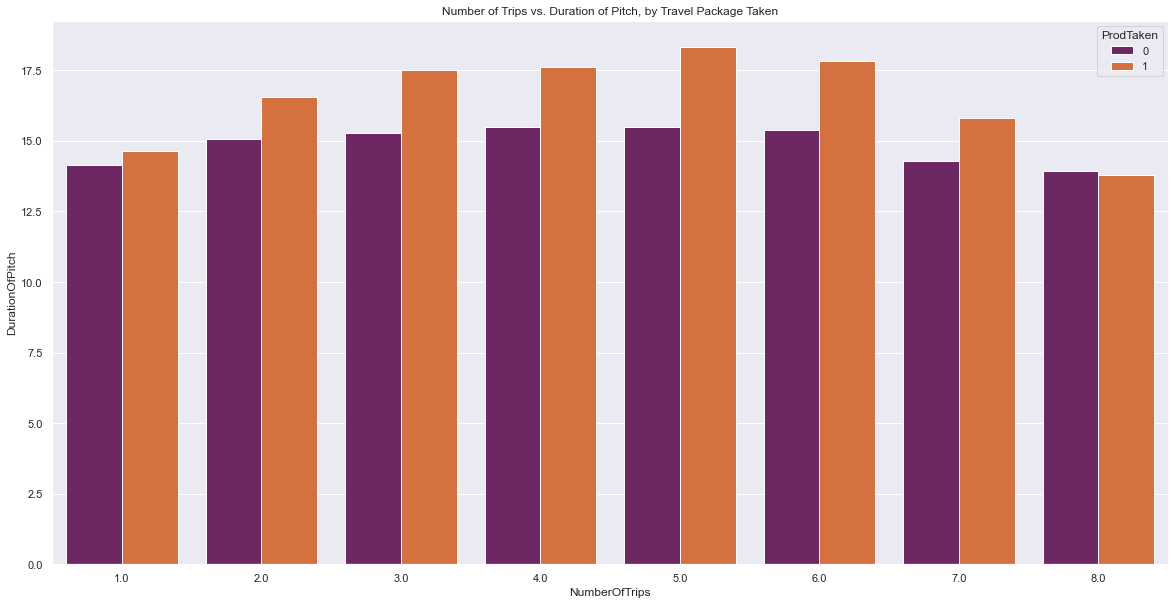

In [156]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

# Set a limit of under 10 trips, to exclude outliers 
sns.barplot(x=travel['NumberOfTrips'][travel['NumberOfTrips']<=10], y=travel['DurationOfPitch'], hue=travel['ProdTaken']
            , palette='inferno', ci=None); # Removing Confidence Interval lines

plt.title('Number of Trips vs. Duration of Pitch, by Travel Package Taken');

- There appears to be **added value (possibly Travel Package sales conversion) when sales pitches last longer then 15 minutes**, while keeping under 18 minutes on average
- The majority of customers take an **average of 3 to 6 trips (starting to increase from 2 trips)** and have a **higher conversion rate, on future purchases**, within that range
    - This conversion ratio starts to show **diminishing returns after 7 trips**, dropping substantially from 8 trips or more in a year

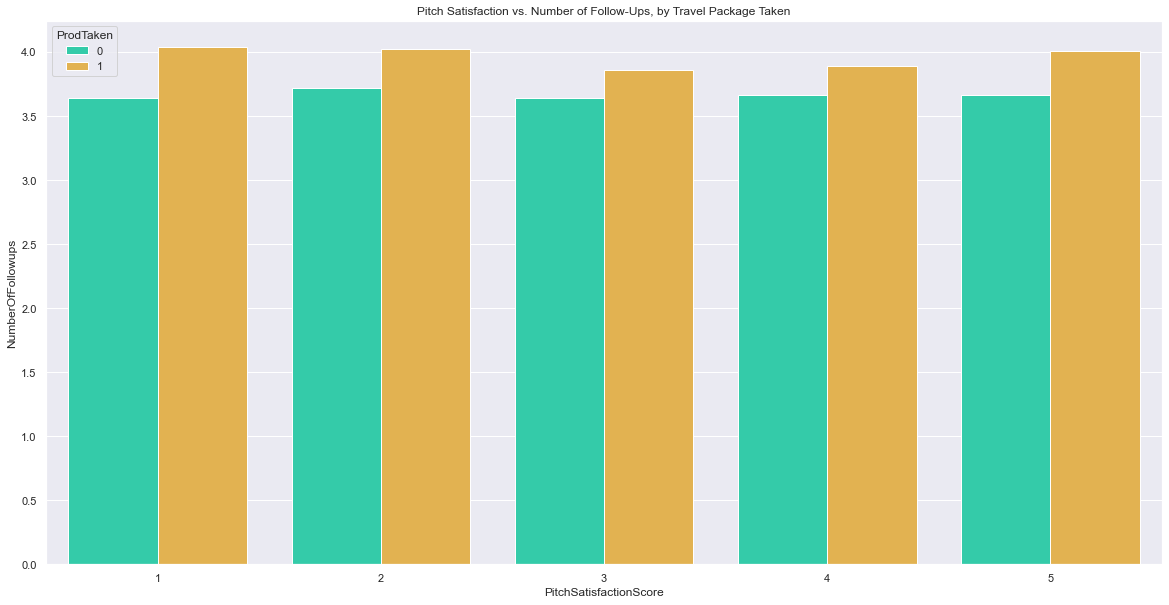

In [157]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
sns.barplot(x=travel['PitchSatisfactionScore'], y=travel['NumberOfFollowups'], hue=travel['ProdTaken'],
            palette='turbo',ci=None); # Removing Confidence Interval lines);

plt.title('Pitch Satisfaction vs. Number of Follow-Ups, by Travel Package Taken');

- In general, increased follow-ups (averaging closer to 4 per customer) boost the conversion likelihood or customers purchasing a Travel Package, regardless of prior Pitch Satisfaction scores
    - There is **just as much likelihood of customers who gave poor scores previously purchasing a Travel Package in the future**, provided the pitch duration lasts closer to 18 minutes on average

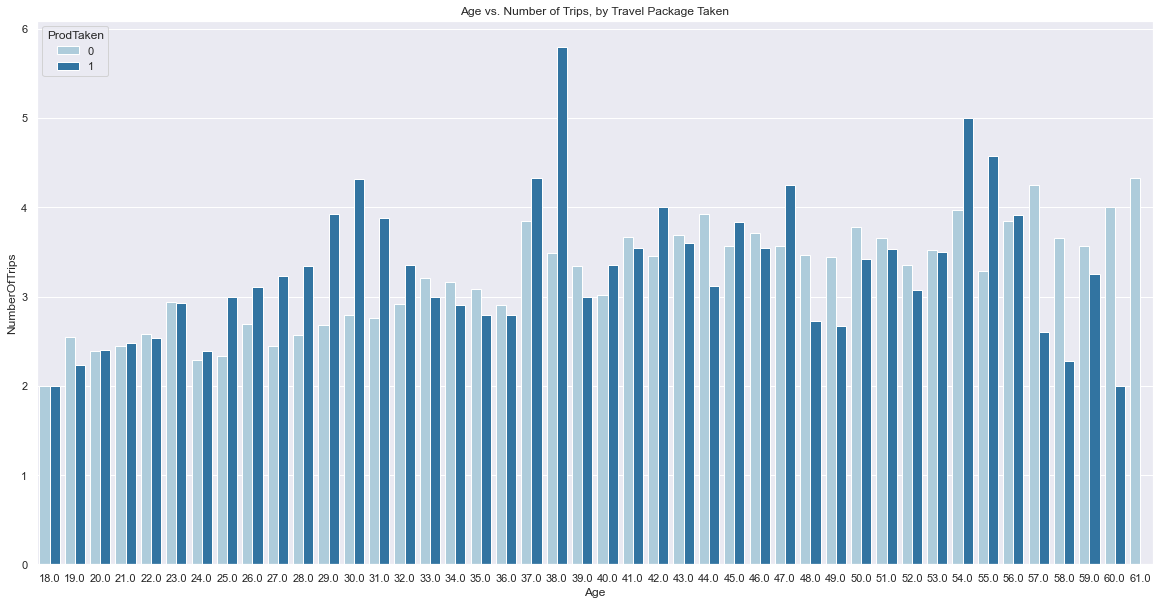

In [158]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
sns.barplot(x=travel['Age'], y=travel['NumberOfTrips'], hue=travel['ProdTaken'],
            palette='Paired',ci=None); # Removing Confidence Interval lines);

plt.title('Age vs. Number of Trips, by Travel Package Taken');

- Customers over the age of 60 and under the age of 19 appear to have far less desire to purchase the new Travel Package and those same younger customers take fewer trips per year on average
    - Customers in their **early thirties through mid fifties are more likely to not only take at least 4 trips a year** on average, but also to **purchase the Wellness Travel Packages**

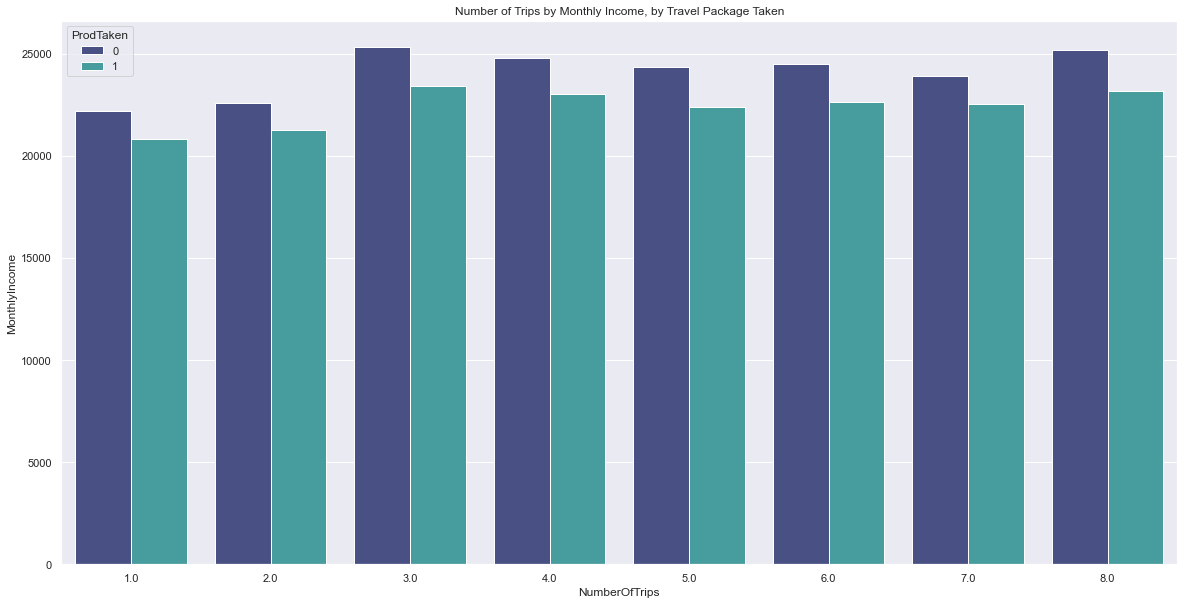

In [159]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

# Set a limit of under $40k income and less than 10 trips, to exclude outliers 
sns.barplot(x=travel['NumberOfTrips'][travel['NumberOfTrips']<=10], y=travel['MonthlyIncome'][travel['MonthlyIncome']<=40000],
            hue=travel['ProdTaken'], palette='mako',ci=None); # Removing Confidence Interval lines);

plt.title('Number of Trips by Monthly Income, by Travel Package Taken');

- Customer Monthly Income doesn't appear to have much influence on whether or not a customer purchases the new Travel Package
    - More indicative however, is the **number of trips already taken this year when greater than 3 trips**

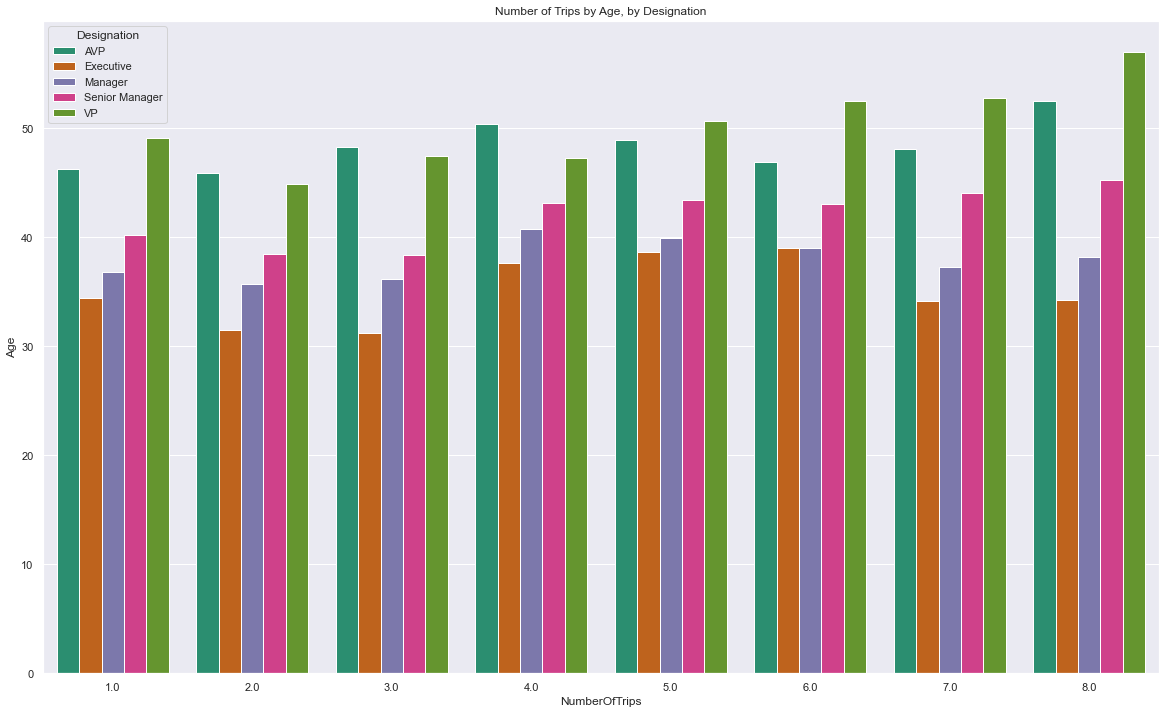

In [160]:
plt.figure(figsize=(20,12)); 
# Set a limit of under $40k income and less than 10 trips, to exclude outliers 
sns.barplot(x=travel['NumberOfTrips'][travel['NumberOfTrips']<=10], y=travel['Age'],
            hue=travel['Designation'], palette='Dark2',ci=None); # Removing Confidence Interval lines);

plt.title('Number of Trips by Age, by Designation');

- Customers with **VP and AVP** Designations have the oldest average age range: **mid forties to fifties**
- Customers with **Executive and Manager** Designations have the youngest average age range: **low/mid thirties to upper thirties**
- Customers from all Designations take trips in the full range of 1 - 8 average per year

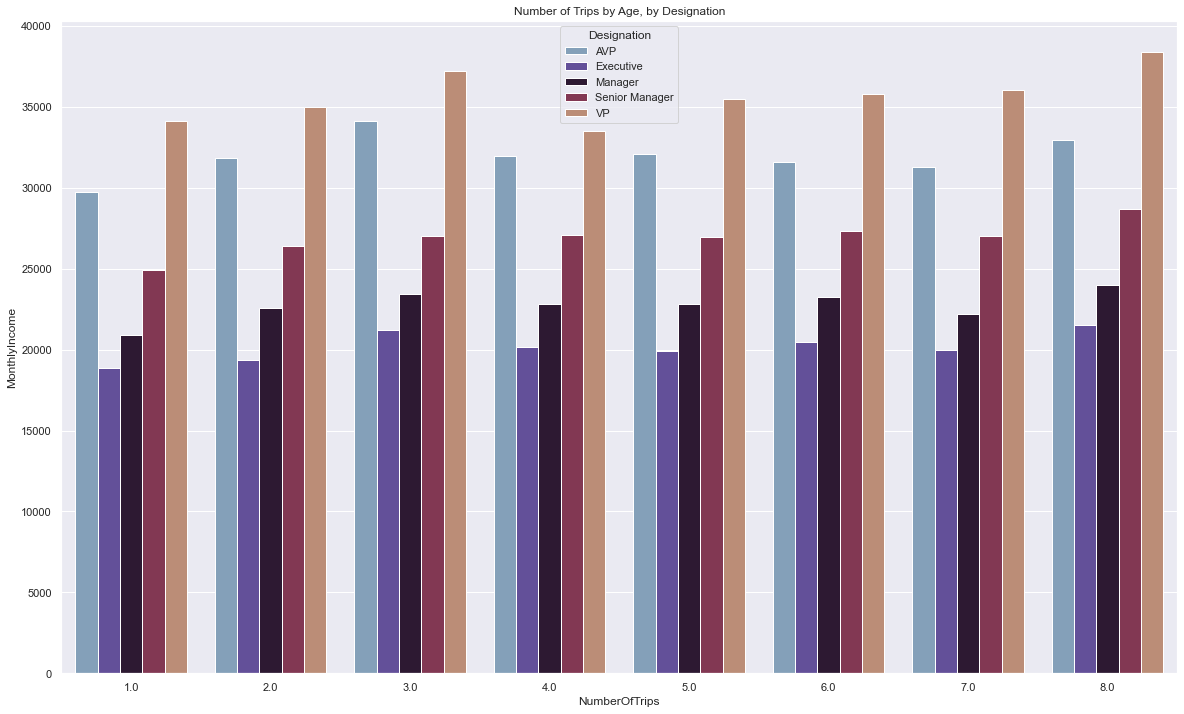

In [161]:
plt.figure(figsize=(20,12)); 
# Set a limit of under $40k income and less than 10 trips, to exclude outliers 
sns.barplot(x=travel['NumberOfTrips'][travel['NumberOfTrips']<=10], y=travel['MonthlyIncome'],
            hue=travel['Designation'], palette='twilight',ci=None); # Removing Confidence Interval lines);

plt.title('Number of Trips by Age, by Designation');

- Customers with **VP and AVP** Designations earn the highest incomes: **\\$30k to \\$45k**
- Customers with **Executive and Manager** Designations earn the lowest incomes: **\\$19k to \\$25k**
- Customers from all Designations take trips in the full range of 1 to 8 average per year

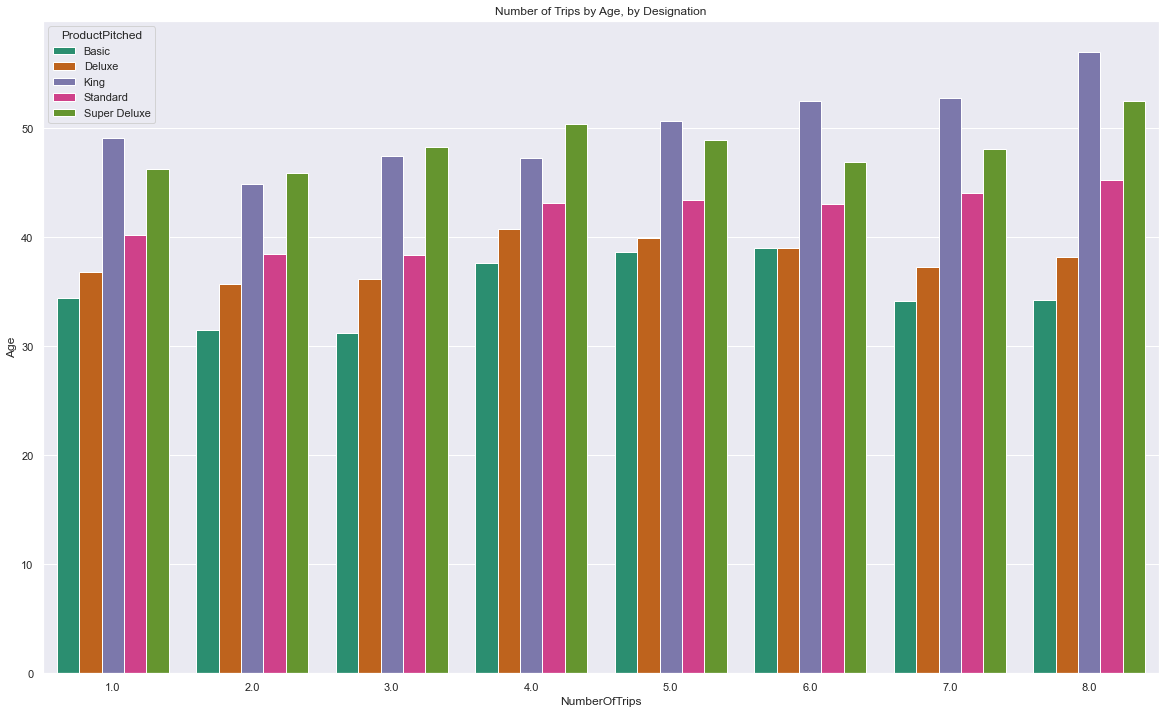

In [162]:
plt.figure(figsize=(20,12)); 
# Set a limit of under $40k income and less than 10 trips, to exclude outliers 
sns.barplot(x=travel['NumberOfTrips'][travel['NumberOfTrips']<=10], y=travel['Age'],
            hue=travel['ProductPitched'], palette='Dark2',ci=None); # Removing Confidence Interval lines);

plt.title('Number of Trips by Age, by Designation');

- Customers pitched the **King and Super Deluxe** Travel Packages have the oldest average age range: **upper forties to mid fifties**
- Customers pitched the **Basic and Deluxe** Travel Packages have the youngest average age range: **mid thirties to lower forties**
- Customers, regardless of Travel Package pitched, take trips in the full range of 1 - 8 average per year

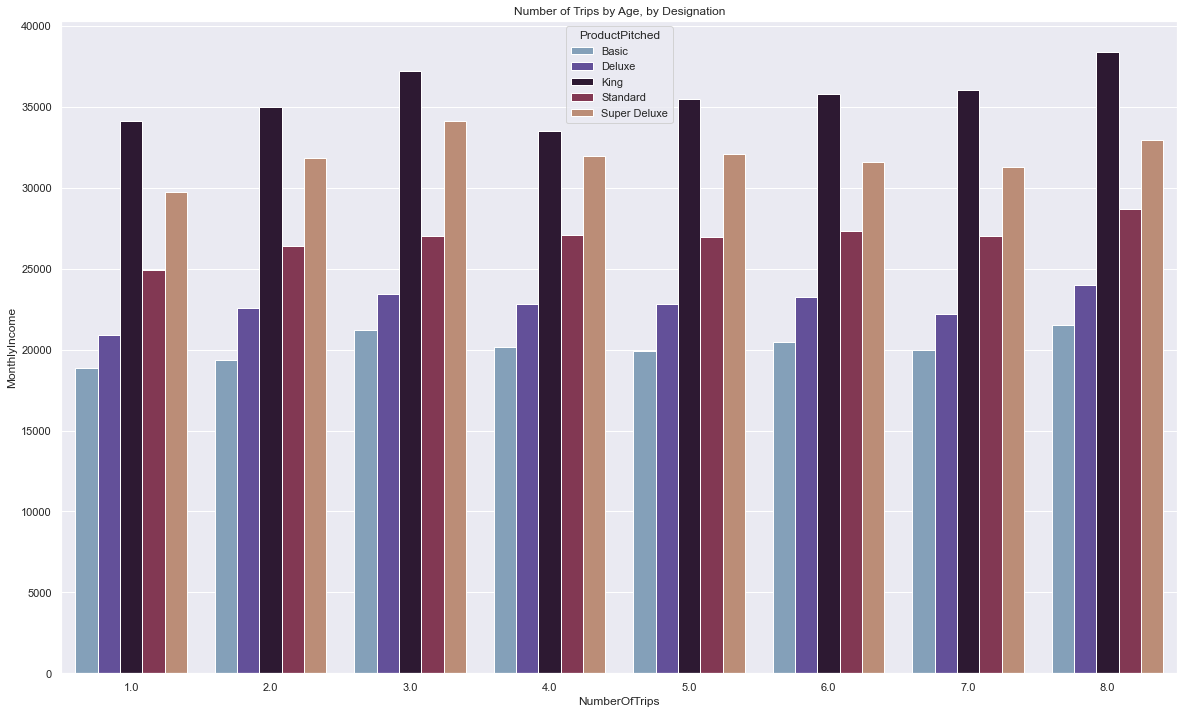

In [163]:
plt.figure(figsize=(20,12)); 
# Set a limit of under $40k income and less than 10 trips, to exclude outliers 
sns.barplot(x=travel['NumberOfTrips'][travel['NumberOfTrips']<=10], y=travel['MonthlyIncome'],
            hue=travel['ProductPitched'], palette='twilight',ci=None); # Removing Confidence Interval lines);

plt.title('Number of Trips by Age, by Designation');

- Customers pitched the **King and Super Deluxe** Travel Packages earn the highest incomes: **\\$30k to \\$45k**
- Customers pitched the **Basic and Deluxe** Travel Packages earn the lowest incomes: **\\$18k to \\$25k**
- Customers from all Travel Packages take trips in the full range of 1 to 8 average per year

## Summary of EDA

**Data Description:**

- Dependent variable is **Prod Taken** which is representing the conversion rate when customers purchase the Travel Package
- **Type of Contract, Occupation, Gender, Product Pitched, Marital Status, and Designation** are all Object data types - the remaining features are all numerical (integer/float)
- There are columns with **missing values** in the dataset
    - DurationOfPitch             251
    - MonthlyIncome               233
    - Age                         226
    - NumberOfTrips               140
    - NumberOfChildrenVisiting     66
    - NumberOfFollowups            45
    - PreferredPropertyStar        26
    - TypeofContact                25

**Data Cleaning:**

- **Customer ID** is an ID variable so it is dropped from the data (all unique values)
- Each of the columns with missing values listed above have very similar Mean/Median scores
    - **All missing values can be replaced with the Median**
- **Renaming** select data for typo correction or better grouping:
    - ‘Fe Male’ to ‘Female’ and ‘Free Lancer’ to ‘Small Business’
- Converting object datatypes to **Categorical** first then encoding to numeric through **One-Hot-Encoding** process


**Observations from EDA:**

- **ProdTaken**: Found to have an 81%/19% split between 0: No, 1: Yes
    - **Class weighting will be required within Decision Tree models**
- **Age**: The bulk of the dataset (IQR) ranges between the ages of around 32 and 43 years
- **TypeofContact**: Over 70% of enquiries received are made by the customers instead of their companies on their behalf
- **CityTier**: The median tier is 1, indicating that a large percentage of the customers sampled come from more rural/less developed towns/cities
- **Occupation**: Nearly half the dataset is comprised of customers who are salaried workers, with around 43% of the remaining balance being associated with small businesses
- **Gender**: The sample dataset has a rough 60/40 split between Male to Female customers
- **NumberOfPersonVisiting**: The number of persons visiting (1-5) is most often 3 people
- **PreferredPropertyStar**: The majority of Property Stars scored a 3
    - None of the customers sampled scored a property below 3 out of 5
- **MaritalStatus**: Almost 50% of the dataset is comprised of married customers
- **NumberOfTrips**: The most frequent amount of trips taken in a year by the customers sampled is 2
- **Passport**: Over 70% of the customers in the dataset do not own a (current) passport
- **OwnCar**: Almost 40% of customers sampled do not own a car
- **NumberOfChildrenVisiting**: The most frequent amount of children visiting per trip is 1 (0-3)
- **Designation**: Over 70% of the dataset is comprised of customers that are either at Executive (38%) or Managerial (35%) level
    - The proportions above appear identical to the variable: Product Pitched to Customer
- **MonthlyIncome**: The most common income of customers sampled is around \\$23.3k, with a couple outliers in the \\$95k range
- **PitchSatisfactionScore**: The majority of pitches scored a 3 (1-5)
- **ProductPitched**: Over 70% of the dataset is comprised of the Basic (38%) and Deluxe (35%) packages
    - The proportions above appear identical to the variable: Designation
- **NumberOfFollowups**: The number of follow-ups (1-6) is most often 4
- **DurationOfPitch**: The majority of pitches take about 9 to 19 minutes to complete

**Actions for data pre-processing:**

- In addition to the data cleansing adjustments listed above, outliers on both sides of the Income variable (Min/Max) were inspected
    - The two **Minimum** values were determined to be **False Outliers/Incorrect data and were replaced with the Median**
    - The two **Maximum** values were determined to be **True Outliers and left alone**

## Decision Trees/Ensemble Techniques

### Model Building - Approach

- Data preparation - already prepared/tested
- Partition the data into train and test set
- Build model/s on training data
- Tune the model/s for better performance
- Test the model results on test data

#### Split Data

In [164]:
X

,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.0,Self Enquiry,3,Salaried,Female,3,3.0,Single,1.0,1,1,0.0,Manager,20993.0
1,49.0,Company Invited,1,Salaried,Male,3,4.0,Divorced,2.0,0,1,2.0,Manager,20130.0
2,37.0,Self Enquiry,1,Small Business,Male,3,3.0,Single,7.0,1,0,0.0,Executive,17090.0
3,33.0,Company Invited,1,Salaried,Female,2,3.0,Divorced,2.0,1,1,1.0,Executive,17909.0
4,36.0,Self Enquiry,1,Small Business,Male,2,4.0,Divorced,1.0,0,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,Small Business,Male,3,4.0,Unmarried,2.0,1,1,1.0,Manager,26576.0
4884,28.0,Company Invited,1,Salaried,Male,4,3.0,Single,3.0,1,1,2.0,Executive,21212.0
4885,52.0,Self Enquiry,3,Salaried,Female,4,4.0,Married,7.0,0,1,3.0,Senior Manager,31820.0
4886,19.0,Self Enquiry,3,Small Business,Male,3,3.0,Single,3.0,0,0,2.0,Executive,20289.0


In [171]:
# Split the dataset between the target (y) = ProdTaken, and the remainder of the data (x)

X = travel.drop('ProdTaken',axis=1)
y = travel['ProdTaken']

In [173]:
X.drop(columns=['PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'], axis=1, inplace=True)

In [174]:
X

,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.0,Self Enquiry,3,Salaried,Female,3,3.0,Single,1.0,1,1,0.0,Manager,20993.0
1,49.0,Company Invited,1,Salaried,Male,3,4.0,Divorced,2.0,0,1,2.0,Manager,20130.0
2,37.0,Self Enquiry,1,Small Business,Male,3,3.0,Single,7.0,1,0,0.0,Executive,17090.0
3,33.0,Company Invited,1,Salaried,Female,2,3.0,Divorced,2.0,1,1,1.0,Executive,17909.0
4,36.0,Self Enquiry,1,Small Business,Male,2,4.0,Divorced,1.0,0,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,Small Business,Male,3,4.0,Unmarried,2.0,1,1,1.0,Manager,26576.0
4884,28.0,Company Invited,1,Salaried,Male,4,3.0,Single,3.0,1,1,2.0,Executive,21212.0
4885,52.0,Self Enquiry,3,Salaried,Female,4,4.0,Married,7.0,0,1,3.0,Senior Manager,31820.0
4886,19.0,Self Enquiry,3,Small Business,Male,3,3.0,Single,3.0,0,0,2.0,Executive,20289.0


In [175]:
# Create numerical values through one-hot encoding, dropping the first column to avoid redundency
X = pd.get_dummies(X,drop_first=True)

In [179]:
# Split the data into training and testing (0.3) subsets
# Set random_state to any number (1) and keep that same setting
# Use Stratify setting = yes, this will keep the train/test proportions consistent across the many ensemble models, etc.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=1, stratify=y)

print('X_Train:',X_train.shape)
print('X_Test:',X_test.shape)

X_Train: (3421, 20)
X_Test: (1467, 20)


In [180]:
# Check % splits of target (y) values for overall dataset - Use (1) or normalize=True for percentages instead of totals

y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [181]:
# Check % splits of target (y) testing values for overall dataset - Use (1) or normalize=True for percentages instead of totals

y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

The proportions between 0/1 in both the target column and the testing data are almost identical **due to using the Stratify setting**.

## Evaluating Model Results

- **Precision:** How many of the customers predicted to take on a Personal Loan actually did?
    - True Positives / (True Positive + False Positives)
    
- **Recall (Sensitivity):** Of all the customers that did take on a Personal Loan, how many did the model predict would?
    - True Positive / (True Positives + False Negatives) 
    
- **F1-Score (Combo of Precision & Recall/Sensitivity):** What is the Mean split between the Precision and Recall results? 
    - 2 * (Recall * Precision) / (Recall + Precision)
    
- **Specificity:** Of all the customers that did not secure a Personal Loan with the bank, how many did the model predict wouldn't?
    - True Negative / True Negatives + True Positives 


### Model Can Score Incorrectly by Predicting:
1. Customer will purchase the Travel Packages and they don't end up doing so
2. Predicting an customer will not purchase the Travel Packages but they actually do end up doing so

### Selecting the More Important Case
- Correctly selecting customers who will end up buying the Travel Packages, as **it is expensive to market/target these customers**

### Reducing Loss: Increasing True Positives = Precision
- The company wants **Precision to be maximized** since the greater the Precision the higher the chances of **Maximizing True Positives**. 
    - This is crucial because we already know, from earlier campaigns, that the cost of marketing to customers for the new travel package not only carries a hefty financial cost in general, but could also affect current customer relations, damaging future financial opportunities.


If the model predicts a customer will purchase the package, we need to be as certain as possible that they in fact do take the offer. If the model predicted they wouldn't take the offer but **actually did purchase a travel package then that is essentially free money** and not a negative outcome for the company.  **Therefore, Recall will not be used and Precision is a better scoring metric for the business**.

## Confusion Matrix, Accuracy, Recall, & Precision Scores

In [182]:
# Create simple functions to call when calculating each of the scores or building the Confusion Matrix

# Accuracy Score
def Calc_Accuracy_Score(model,flag=True): # Model represents each of the Decision Tree Ensemble Model, Flag code will only run = True
   

    acc = [] # Blank list where scores will be added and appended from
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    acc.append(train_acc) # Append the accuracy results for training data
    acc.append(test_acc) # Append the accuracy results for testing data
    if flag == True: # Only apply the following code below if set to true
        print("Accuracy on Training set %.2f" % model.score(X_train,y_train))
        print("Accuracy on Test set : %.2f" % model.score(X_test,y_test))
    
    return acc # returning the list with train and test scores


# Precision Score
def Calc_Precision_Score(model,flag=True): # Model represents each of the Decision Tree Ensemble Model, Flag code will only run = True
   

    prec = [] # Blank list where scores will be added and appended from
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_prec = metrics.precision_score(y_train, pred_train)
    test_prec = metrics.precision_score(y_test, pred_test)
    prec.append(train_prec) # Append the precision results for training data
    prec.append(test_prec) # Append the precision results for testing data
    if flag == True: # Only apply the following code below if set to true
        print("Precision on Training set : %.2f" % metrics.precision_score(y_train, pred_train))
        print("Precision on Test set : %.2f" % metrics.precision_score(y_test, pred_test))
    
    return prec # returning the list with train and test scores


# Recall Score
def Calc_Recall_Score(model,flag=True): # Model represents each of the Decision Tree Ensemble Model, Flag code will only run = True
   

    rec = [] # Blank list where scores will be added and appended from
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_rec = metrics.recall_score(y_train, pred_train)
    test_rec = metrics.recall_score(y_test, pred_test)
    rec.append(train_rec) # Append the recall results for training data
    rec.append(test_rec) # Append the recall results for testing data
    if flag == True: # Only apply the following code below if set to true
        print("Recall on Training set : %.2f" % metrics.recall_score(y_train, pred_train))
        print("Recall on Test set : %.2f" % metrics.recall_score(y_test, pred_test))
     
    return rec # returning the list with train and test scores


# Confusion Matrix
def Create_Confusion_Matrix(model,y_actual,labels=[1, 0]): # Model = Decision Tree Ensemble Models, y_actual = Ground truth results (y)

    y_pred = model.predict(X_test) # Predict y values based on x test values - use test data to gauge actual model performance
    
    cm = metrics.confusion_matrix(y_actual, y_pred, labels=[0, 1]) # Align labels to match 1 = Positive, 0 = Negative, etc.
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]  # Use Flatten to convert cm matrix into 1 dimension for value counts
    
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)] # Use Flatten to convert cm matrix into 1 dimension for calculated % of total
    
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)] # Use the Group Counts and Percentages above as HeatMap Annotated Labels 
    
    labels = np.asarray(labels).reshape(2,2) # Reshape the labels into 2 x 2 matrix
    
    plt.figure(figsize = (15,10))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    

# A function to pull all 3 scores - great for summarizing data loops at end
def Get_All_Scores(model,flag=True):
    
    Scores = []     # Empty list to store Train & Test results
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
        
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_prec = metrics.precision_score(y_train, pred_train)
    test_prec = metrics.precision_score(y_test, pred_test)

    train_rec = metrics.recall_score(y_train, pred_train)
    test_rec = metrics.recall_score(y_test, pred_test)
    
    Scores.extend((train_acc,test_acc,train_prec,test_prec,train_rec,test_rec))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return Scores # returning the list with train and test scores

# Building Decision Tree/Ensemble Models

## Decision Tree

- The tree will be built using the **Gini criteria** for the split 
- A **class weighting of 19% - 0 and 81% - 1** will be applied to the 0 and 1 scores for **Prod Taken variable**, respectively
    - This weighting will **offset the disproportionate splits currently** seen in the sample data for the target variable

In [183]:
# Set Decision Tree criteria, including offsetting class weights and keeping random state = 1 as previously used
Dec_Tree = DecisionTreeClassifier(criterion='gini', class_weight = {0:0.19, 1:0.81}, random_state=1)

In [184]:
# Fit the training to the Decision Tree

Dec_Tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

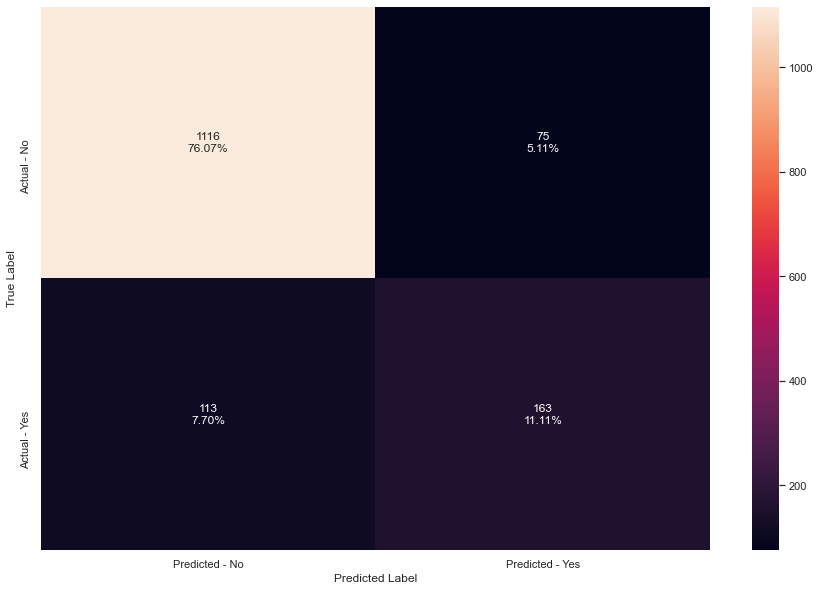

In [185]:
# Run the Confusion Matrix on the fitted tree above, for test data to check actual results

Create_Confusion_Matrix(Dec_Tree, y_test)

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**12.27%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**75.60%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**5.59%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**6.54%**)

### Summary of Scores for Decision Tree

In [186]:
Acc_Score = Calc_Accuracy_Score(Dec_Tree)
print('.'*50)
Prec_Score = Calc_Precision_Score(Dec_Tree)
print('.'*50)
Rec_Score = Calc_Recall_Score(Dec_Tree)
print('.'*50)

Accuracy on Training set 1.00
Accuracy on Test set : 0.87
..................................................
Precision on Training set : 1.00
Precision on Test set : 0.68
..................................................
Recall on Training set : 1.00
Recall on Test set : 0.59
..................................................


### Observations
- The Decision Tree is **scoring a perfect score of 100% on the Training Data** for all tests (due to **overfitting**)
- The model had a decent Accuracy score of 0.88, but only **mediocre Precision (goal)** and Recall scores of **0.69** and 0.65 respectively

### Tuning Decision Tree

In [187]:
# Choose type of Classifier, Class weighting, and Random State
Dec_Tree_Estimator = DecisionTreeClassifier(class_weight={0:0.19, 1:0.81}, random_state=1)

# Define Grid Parameters
Parameters = {'min_samples_leaf': [1,2,3,4,5], # Minimum size of samples allowed for a leaf to be built
              'max_leaf_nodes': [2,3,5,7,10,12,15,20], # Maximum amount of nodes allowed per node of tree
              'min_impurity_decrease': [0.00001,0.0001,0.001,0.01,0.1] # Minimum impurity improvement (decrease) to allow as tree grows
             }

# Define Scorer for Models - Precision Score
Scorer = metrics.make_scorer(metrics.precision_score)

# Run the Grid Search and fit to Training data
Grid_Object = GridSearchCV(Dec_Tree_Estimator, Parameters, scoring=Scorer,
                           cv=10, n_jobs=-1) # Run with 10 cv folds, in parallel (n_jobs = -1)

Grid_Object = Grid_Object.fit(X_train, y_train)

# Set the Estimator to the best Grid Search combination of Parameters, etc.
Dec_Tree_Estimator = Grid_Object.best_estimator_

# Fit the Estimator to the Training data
Dec_Tree_Estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_leaf_nodes=7,
                       min_impurity_decrease=1e-05, random_state=1)

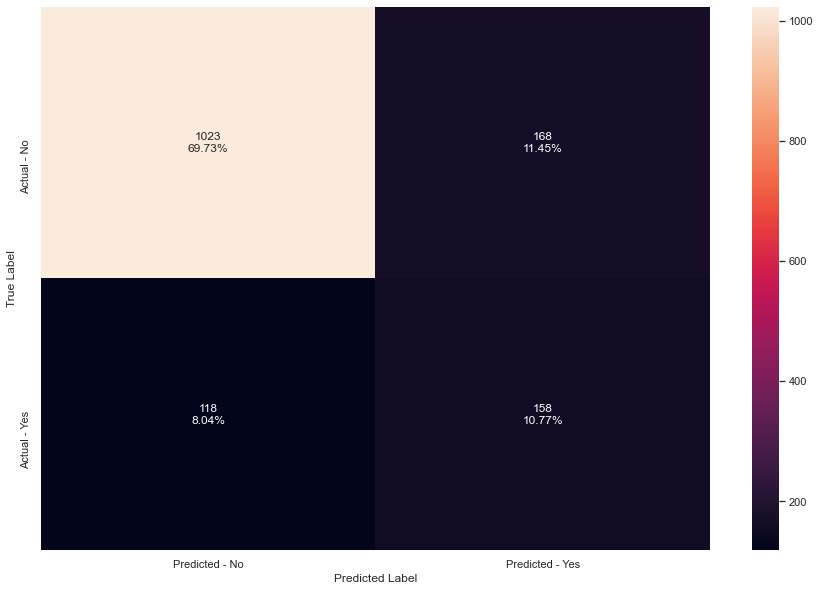

In [188]:
Create_Confusion_Matrix(Dec_Tree_Estimator, y_test) # Run the Confusion Matrix on test data for Tuned Decision Tree results

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**11.86%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**68.51%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**12.68%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**6.95%**)

### Summary of Scores for Tuned Decision Tree

In [189]:
Acc_Score = Calc_Accuracy_Score(Dec_Tree_Estimator)
print('.'*50)
Prec_Score = Calc_Precision_Score(Dec_Tree_Estimator)
print('.'*50)
Rec_Score = Calc_Recall_Score(Dec_Tree_Estimator)
print('.'*50)

Accuracy on Training set 0.78
Accuracy on Test set : 0.81
..................................................
Precision on Training set : 0.44
Precision on Test set : 0.48
..................................................
Recall on Training set : 0.57
Recall on Test set : 0.57
..................................................


### Observations

- The Tuned Decision Tree is not overfitting the Training data for any of the scores, however the results are very poor
- The model scored lower in testing results for Accuracy (0.80) and **Precision (0.48)**, which is substantially worse than the initial, untuned, Decision Tree
    - The Recall score dropped to 0.57 and 0.55, but is not that concerning since it is not the focal test result for this business case
- Regarding the **Confusion Matrix** results, the model scored lower on **True Positives (down from 12.3% to 11.9%)** and also scored far higher (worse) on **False Positives, which cost the company money and waste resources (up from 5.6% to 12.7%)**


Note the final results are after various Hyperparameter tests - **models could possibly be further improved upon tweaking of parameters above**

## Bagging Classifier

In [190]:
Bagging = BaggingClassifier(random_state=1) # Initially run wide open, except for random state which is still set to 1

In [191]:
Bagging.fit(X_train, y_train) # Fit the training data to the Bagging Classifier

BaggingClassifier(random_state=1)

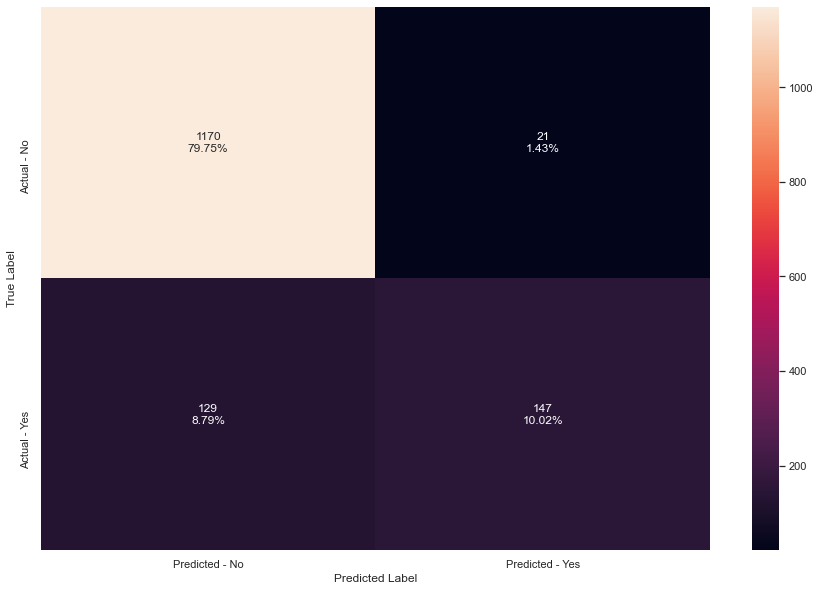

In [192]:
Create_Confusion_Matrix(Bagging, y_test) # Run the Confusion Matrix summary on test data the Bagging Classifier results

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**11.38%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**79.48%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**1.70%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**7.43%**)

### Summary of Scores for Bagging Classifier

In [193]:
Acc_Score = Calc_Accuracy_Score(Bagging)
print('.'*50)
Prec_Score = Calc_Precision_Score(Bagging)
print('.'*50)
Rec_Score = Calc_Recall_Score(Bagging)
print('.'*50)

Accuracy on Training set 0.99
Accuracy on Test set : 0.90
..................................................
Precision on Training set : 1.00
Precision on Test set : 0.88
..................................................
Recall on Training set : 0.96
Recall on Test set : 0.53
..................................................


### Observations

- The Bagging Classifier is still overfitting the Training data 100% for the Precision score, but has also improved slightly vs. the original Decision Tree Accuracy and Recall (down to 0.99 and 0.97 respectively)
- The Classifier scored well in testing results for Accuracy (0.91) and **Precision (0.87)**, which is far better than the initial, untuned, Decision Tree
    - The Recall score dropped slightly to 0.61 for Test data, but is not that concerning since it is not the focal test result for this business case
- Regarding the **Confusion Matrix** results, the model scored slightly lower on **True Positives (down from 12.3% to 11.4%)** but scored far lower **False Positives, which save the company money on fewer wasted resources (down from 5.6% to 1.7%)**


## Weighted Bagging Classifier

In [194]:
# Recreate Bagging Classifier using original Decision Tree weighting criterion & Weighting for base estimator

Bagging_Wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1),random_state=1)

# Fit the Training data to the Weighted Bagging Classifier

Bagging_Wt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  random_state=1)

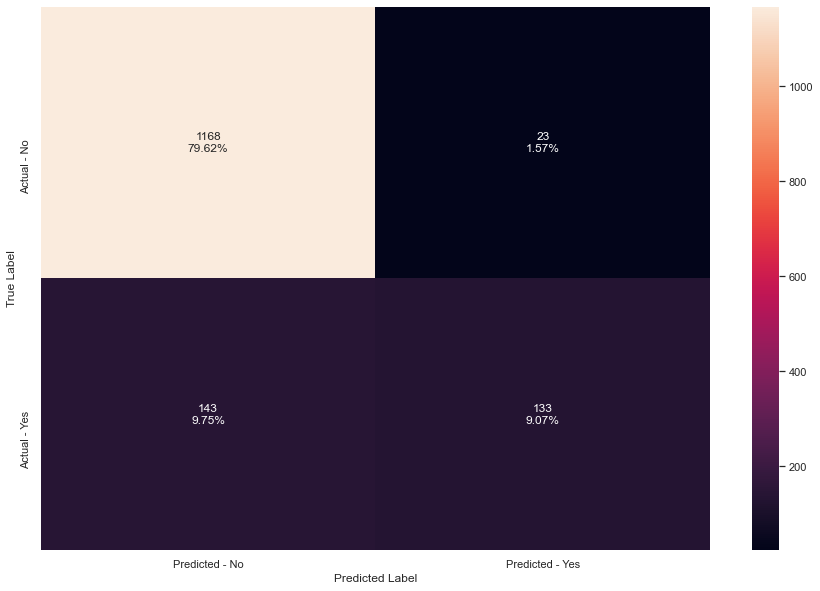

In [195]:
Create_Confusion_Matrix(Bagging_Wt, y_test) # Run the Confusion Matrix on test data for Weighted Bagging Classifier results

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**10.43%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**80.16%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**1.02%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**8.38%**)

### Summary of Scores for Weighted Bagging Classifier

In [196]:
Acc_Score = Calc_Accuracy_Score(Bagging_Wt)
print('.'*50)
Prec_Score = Calc_Precision_Score(Bagging_Wt)
print('.'*50)
Rec_Score = Calc_Recall_Score(Bagging_Wt)
print('.'*50)

Accuracy on Training set 0.99
Accuracy on Test set : 0.89
..................................................
Precision on Training set : 1.00
Precision on Test set : 0.85
..................................................
Recall on Training set : 0.95
Recall on Test set : 0.48
..................................................


### Observations

- The Weighted Bagging Classifier is still overfitting the Training data 100% for the Precision score, but has also improved slightly vs. the original Decision Tree for Accuracy and Recall (down to 0.99 and 0.97 respectively)
- The Classifier scored well in testing results for Accuracy (0.91) and **Precision (0.91)**, which is far better than the initial, untuned, Decision Tree
    - The Recall score dropped to 0.55 for Test data, but is not that concerning since it is not the focal test result for this business case
- Regarding the **Confusion Matrix** results, the model scored slightly lower on **True Positives (down from 12.3% to 10.4%)** but scored far lower **False Positives, which save the company money on fewer wasted resources (down from 5.6% to 1.0%)**

### Tuning Bagging Classifier

In [197]:
# Create Grid Search for Bagging Classifier with Random State still set to 1
Bagging_Estimator = BaggingClassifier(random_state=1)

# Define Grid Parameters for Bagging Classifier
Grid_Params = {'n_estimators':[10,80,10], # Number of estimators (trees) ranging between 10 and 80, in increments of 10
               'max_features':[0.4,0.6], # Limits the % of features to include between 40% and 60%
               'max_samples': [0.4,0.6] # Limits the % of samples to include between 40% and 60%
              }

# Create the Grid and fit to Training data
Grid_Object = GridSearchCV(Bagging_Estimator, Grid_Params, 
                    scoring = 'precision', cv = 10) # Score for Precision, and run 10 Cross Validation folds

Grid_Object = Grid_Object.fit(X_train, y_train) # Fit the Estimator to the Training data

# Set the Estimator to the best Grid Search combination of Parameters, etc.
Bagging_Estimator = Grid_Object.best_estimator_

# Fit the Estimator to the Training data
Bagging_Estimator.fit(X_train, y_train)

BaggingClassifier(max_features=0.4, max_samples=0.6, n_estimators=80,
                  random_state=1)

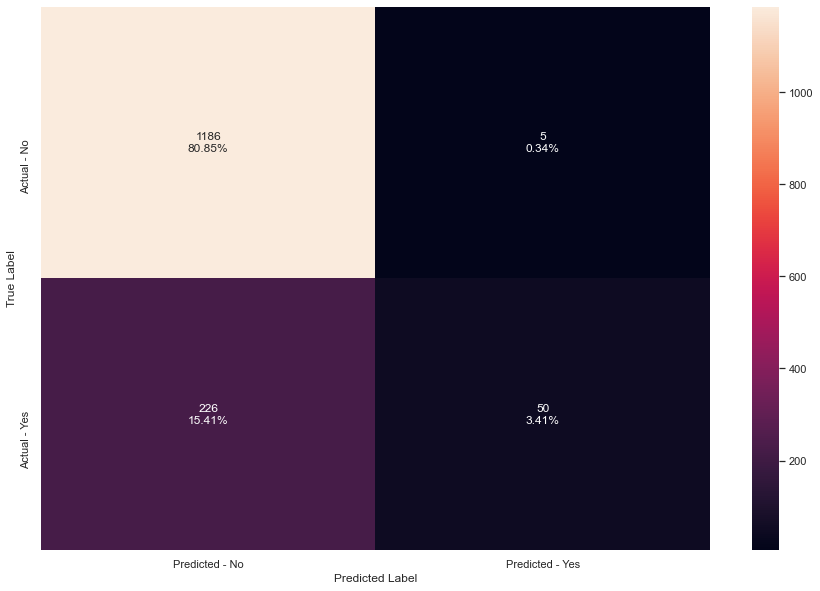

In [198]:
Create_Confusion_Matrix(Bagging_Estimator, y_test) # Run the Confusion Matrix on test data for Tuned Decision Tree results

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**4.98%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**80.78%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**0.41%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**13.84%**)

### Summary of Scores for Tuned Bagging Classifier

In [199]:
Acc_Score = Calc_Accuracy_Score(Bagging_Estimator)
print('.'*50)
Prec_Score = Calc_Precision_Score(Bagging_Estimator)
print('.'*50)
Rec_Score = Calc_Recall_Score(Bagging_Estimator)
print('.'*50)

Accuracy on Training set 0.95
Accuracy on Test set : 0.84
..................................................
Precision on Training set : 1.00
Precision on Test set : 0.91
..................................................
Recall on Training set : 0.72
Recall on Test set : 0.18
..................................................


### Observations

- The Tuned Bagging Classifier is still overfitting the Training data 100% for Precision, down slightly for Accuracy (0.98) and Recall (0.91)
- The Classifier still scored well in testing results for Accuracy (0.86) and **Precision (0.92)**, which is far better than the initial, untuned, Decision Tree
    - The Recall score dropped to 0.50 for Test data, but is not that concerning since it is not the focal test result for this business case
- Regarding the **Confusion Matrix** results, the model scored lower on **True Positives (down from 12.3% to 5%)** but scored far lower **False Positives, which save the company money on fewer wasted resources (down from 5.6% to 0.4%)**


Note the final results are after various Hyperparameter tests - **models could possibly be further improved upon tweaking of parameters above**

## Random Forest

In [200]:
Rand_For = RandomForestClassifier(random_state=1) # Initially run wide open, except for random state which is still set to 1

In [201]:
Rand_For.fit(X_train, y_train) # Fit the training data to the Random Forest

RandomForestClassifier(random_state=1)

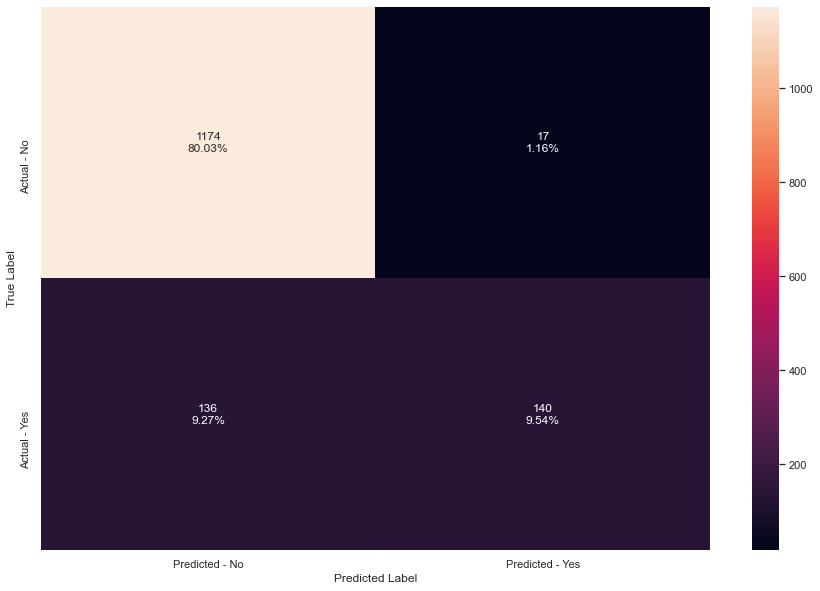

In [202]:
Create_Confusion_Matrix(Rand_For, y_test) # Run the Confusion Matrix on test data for Random Forest results

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**11.25%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**80.57%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**0.61%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**7.57%**)

### Summary of Scores for Random Forest

In [203]:
Acc_Score = Calc_Accuracy_Score(Rand_For)
print('.'*50)
Prec_Score = Calc_Precision_Score(Rand_For)
print('.'*50)
Rec_Score = Calc_Recall_Score(Rand_For)
print('.'*50)

Accuracy on Training set 1.00
Accuracy on Test set : 0.90
..................................................
Precision on Training set : 1.00
Precision on Test set : 0.89
..................................................
Recall on Training set : 1.00
Recall on Test set : 0.51
..................................................


### Observations

- The Random Forest is still overfitting the Training data 100% for all three scores
- The model scored well in testing results for Accuracy (0.92) and very high on **Precision (0.95)**, which is far better than the initial, untuned, Decision Tree
    - The Recall score dropped to 0.60 for Test data, but is not that concerning since it is not the focal test result for this business case
- Regarding the **Confusion Matrix** results, the model scored slightly lower on **True Positives (down from 12.3% to 11.3%)** but scored far lower **False Positives, which save the company money on fewer wasted resources (down from 5.6% to 0.6%)**

## Weighted Random Forest

In [204]:
Rand_For_Wt = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)

In [205]:
Rand_For_Wt.fit(X_train, y_train) # Fit the training data to the Weighted Random Forest

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

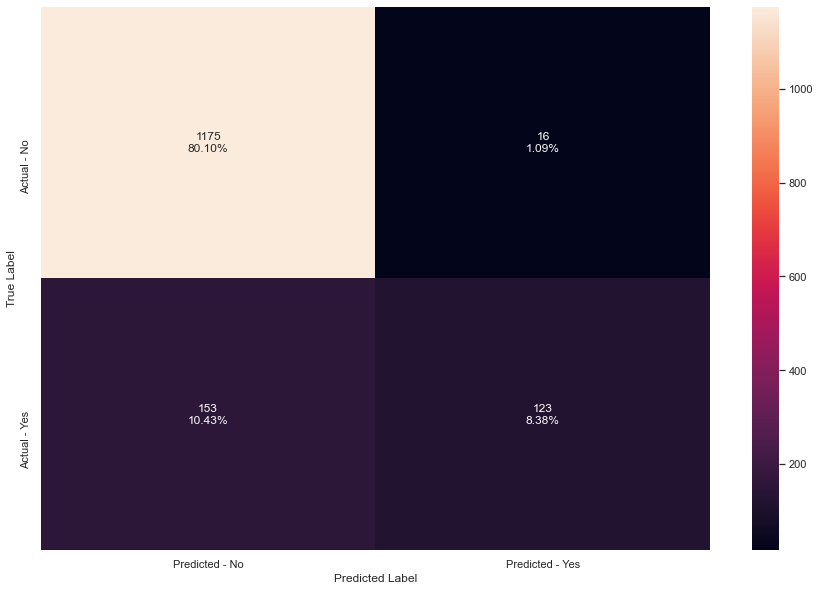

In [206]:
Create_Confusion_Matrix(Rand_For_Wt, y_test) # Run the Confusion Matrix on test data for Weighted Random Forest results

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**10.16%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**80.64%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**0.55%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**8.66%**)

### Summary of Scores for Weighted Random Forest

In [207]:
Acc_Score = Calc_Accuracy_Score(Rand_For_Wt)
print('.'*50)
Prec_Score = Calc_Precision_Score(Rand_For_Wt)
print('.'*50)
Rec_Score = Calc_Recall_Score(Rand_For_Wt)
print('.'*50)

Accuracy on Training set 1.00
Accuracy on Test set : 0.88
..................................................
Precision on Training set : 1.00
Precision on Test set : 0.88
..................................................
Recall on Training set : 1.00
Recall on Test set : 0.45
..................................................


### Observations

- The Weighted Random Forest is still overfitting the Training data 100% for all three scores
- The model scored well in testing results for Accuracy (0.91) and very high on **Precision (0.95)**, which is far better than the initial, untuned, Decision Tree
    - The Recall score dropped to 0.54 for Test data, but is not that concerning since it is not the focal test result for this business case
- Regarding the **Confusion Matrix** results, the model scored slightly lower on **True Positives (down from 12.3% to 10.2%)** but scored far lower **False Positives, which save the company money on fewer wasted resources (down from 5.6% to 0.6%)**

### Tuning Random Forest

In [208]:
# Choose Random Forest Classifier and include class weights for evening out the data and random state still equal to 1

Rand_For_Estimator = RandomForestClassifier(random_state=1, class_weight = {0:0.19, 1:0.81})

# Define Grid Parameters for Random Forest
Grid_Params2 = {'max_depth': np.arange(5,10,1), # Build trees with a depth ranging from 5 to 10 levels, in increments of 1
                'n_estimators':[10,30,10], # Build between 10 and 30 trees, increasing by 10 incrementally
               'min_samples_leaf': np.arange(1, 5, 1), # Minimum leaf samples ranging from 1 to 5, in increments of 1
               'max_features': [0.7,0.9,'log2','auto'], # Max features: 0.7 through 0.9, and log / Square Root (Auto) of features 
               'max_samples': [0.7,0.9,None] # Range from 0.7 through 0.9, with no specific output datatype specified
                }



# Create the Grid and fit to Training data

# Draw samples with replacement (bootstrap), score for Precision, and run 5 Cross Validation folds
Grid_Object2 = GridSearchCV(Rand_For_Estimator, Grid_Params2, scoring='precision',cv=5)

Grid_Object2 = Grid_Object2.fit(X_train, y_train)


# Fit the Bagging Estimtor to the Grid with best Parameters and fit to the Training data

Rand_For_Estimator = Grid_Object2.best_estimator_
Rand_For_Estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=9,
                       max_features=0.7, n_estimators=30, random_state=1)

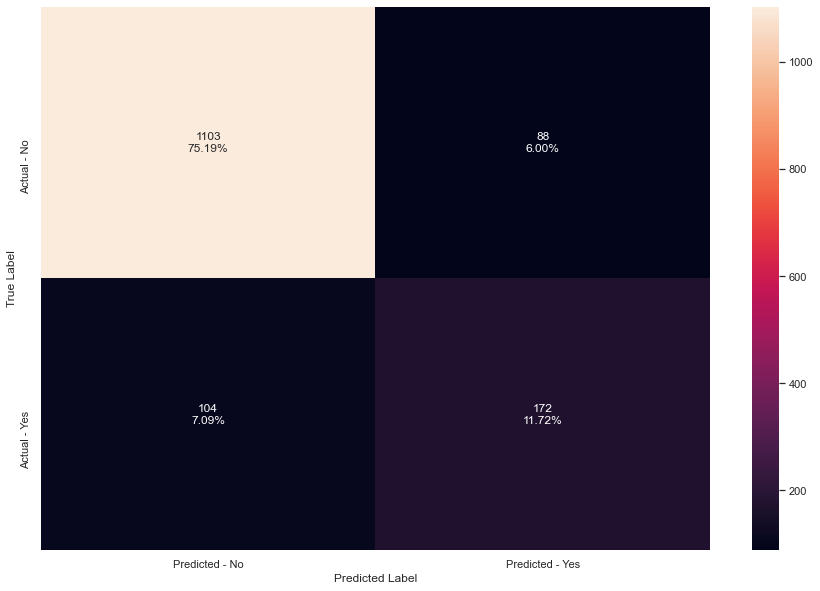

In [209]:
Create_Confusion_Matrix(Rand_For_Estimator, y_test) # Run the Confusion Matrix on test data for Tuned Random Forest results

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**11.38%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**77.03%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**4.16%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**7.43%**)

### Summary of Scores for Tuned Random Forest

In [210]:
Acc_Score = Calc_Accuracy_Score(Rand_For_Estimator)
print('.'*50)
Prec_Score = Calc_Precision_Score(Rand_For_Estimator)
print('.'*50)
Rec_Score = Calc_Recall_Score(Rand_For_Estimator)
print('.'*50)

Accuracy on Training set 0.95
Accuracy on Test set : 0.87
..................................................
Precision on Training set : 0.84
Precision on Test set : 0.66
..................................................
Recall on Training set : 0.90
Recall on Test set : 0.62
..................................................


### Observations

- The Tuned Random Forest not overfitting the Training data for any of the tests
- The model still scored decent in testing results for Accuracy (0.88) and somewhat lower in **Precision (0.73)**, which is far better than the initial, untuned, Decision Tree
    - The Recall score dropped to 0.61 for Test data, but is not that concerning since it is not the focal test result for this business case
- Regarding the **Confusion Matrix** results, the model scored lower on **True Positives (down from 12.3% to 11.4%)** but scored far lower **False Positives, which save the company money on fewer wasted resources (down from 5.6% to 4.2%)**


Note the final results are after various Hyperparameter tests - **models could possibly be further improved upon tweaking of parameters above**

### Adaptive Boost Classifier

In [211]:
AdaBoost = AdaBoostClassifier(random_state=1) # Initially run wide open, except for random state which is set to 1

In [212]:
AdaBoost.fit(X_train, y_train) # Fit the training data to the Adaptive Boost Classifier

AdaBoostClassifier(random_state=1)

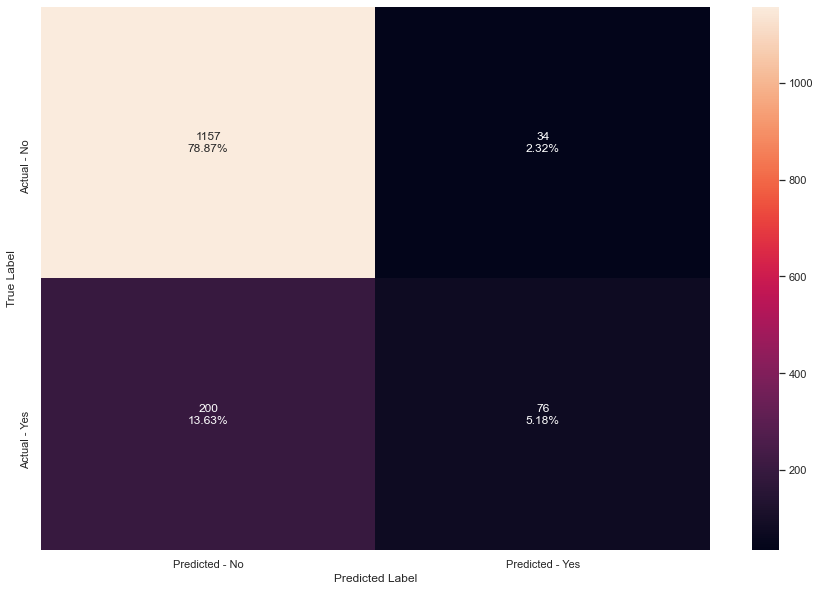

In [213]:
Create_Confusion_Matrix(AdaBoost, y_test) # Run the Confusion Matrix on test data for Adaptive Boost Classifier results

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**6.20%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**79.07%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**2.11%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**12.61%**)

### Summary of Scores for Adaptive Boost Classifier

In [214]:
Acc_Score = Calc_Accuracy_Score(AdaBoost)
print('.'*50)
Prec_Score = Calc_Precision_Score(AdaBoost)
print('.'*50)
Rec_Score = Calc_Recall_Score(AdaBoost)
print('.'*50)

Accuracy on Training set 0.84
Accuracy on Test set : 0.84
..................................................
Precision on Training set : 0.73
Precision on Test set : 0.69
..................................................
Recall on Training set : 0.27
Recall on Test set : 0.28
..................................................


### Observations

- The Adaptive Boost Classifier is not overfitting the Training data for any of the tests
- The model still scored relatively close for both Train and Test results for Accuracy (0.85) and decent for **Precision (0.73 and 0.75 respectively)**, which is slightly better on average than the initial, untuned, Decision Tree
    - The Recall score dropped substantially to 0.31 and 0.33, but is not that concerning since it is not the focal test result for this business case
- Regarding the **Confusion Matrix** results, the model scored lower on **True Positives (down from 12.3% to 6.2%)** but still scored lower on **False Positives, which save the company money on fewer wasted resources (down from 5.6% to 2.1%)**

### Tuning Adaptive Boost Classifier

In [215]:
# Choose Random Forest Classifier

AdaBoost_Estimator = AdaBoostClassifier(random_state=1)

# Define Grid Parameters for Adaptive Boost Classifier
Grid_Params3 = {"n_estimators": np.arange(10,120,10), # 10 - 120 estimators, in increments of 10
                "learning_rate":np.arange(0.1,0.9,0.1) # Learning rate of 0.1 to 0.9, in increments of 0.1
                }

# Define Scorer for Models - Precision Score
Scorer = metrics.make_scorer(metrics.precision_score)

# Run the Grid Search and fit to Training data
Grid_Object = GridSearchCV(AdaBoost_Estimator, Grid_Params3, scoring=Scorer)
Grid_Object = Grid_Object.fit(X_train, y_train)

# Set the Estimator (CLF) to the best combination of parameters
AdaBoost_Estimator = Grid_Object.best_estimator_

# Fit the best algorithm to the data.
AdaBoost_Estimator.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, random_state=1)

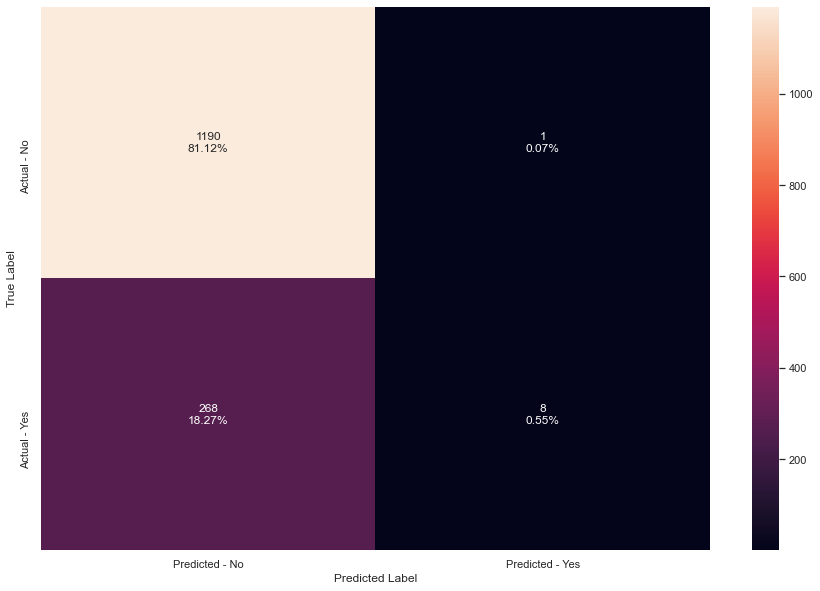

In [216]:
Create_Confusion_Matrix(AdaBoost_Estimator, y_test) # Run the Confusion Matrix on test data for Tuned AdaBoost Classifier results

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**0.75%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**81.12%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**0.07%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**18.06%**)

### Summary of Scores for Tuned Adaptive Boost Classifier

In [217]:
Acc_Score = Calc_Accuracy_Score(AdaBoost_Estimator)
print('.'*50)
Prec_Score = Calc_Precision_Score(AdaBoost_Estimator)
print('.'*50)
Rec_Score = Calc_Recall_Score(AdaBoost_Estimator)
print('.'*50)

Accuracy on Training set 0.82
Accuracy on Test set : 0.82
..................................................
Precision on Training set : 0.96
Precision on Test set : 0.89
..................................................
Recall on Training set : 0.04
Recall on Test set : 0.03
..................................................


### Observations

- The Tuned Adaptive Boost Classifier is not overfitting the Training data for any of the tests
- The model still scored relatively close for both Train and Test results for Accuracy (0.82) and very high for **Precision (0.95 and 0.92 respectively)**, which is far better on average than the initial, untuned, Decision Tree
    - The Recall score dropped to almost 0, scoring 0.03 and 0.04, but is not that concerning since it is not the focal test result for this business case
- Regarding the **Confusion Matrix** results, the model scored lower on **True Positives (down from 12.3% to 0.8%)** but still scored lower on **False Positives, which save the company money on fewer wasted resources (down from 5.6% to 0.1%)**


Note the final results are after various Hyperparameter tests - **models could possibly be further improved upon tweaking of parameters above**

### Gradient Boosting Classifier

In [218]:
Grad_Boost = GradientBoostingClassifier(random_state=1) # Initially run wide open, except for random state which is set to 1

In [219]:
Grad_Boost.fit(X_train, y_train) # Fit the training data for Gradient Boost Classifier

GradientBoostingClassifier(random_state=1)

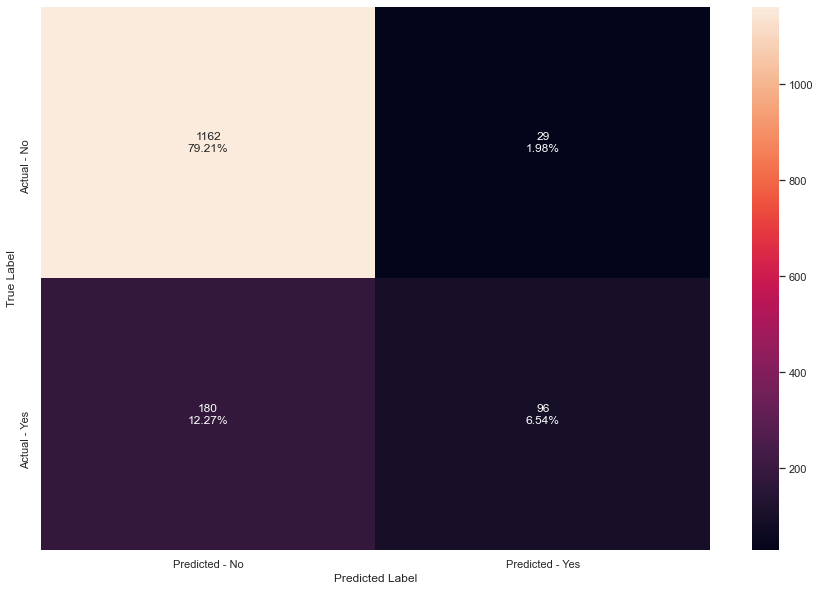

In [220]:
Create_Confusion_Matrix(Grad_Boost, y_test) # Run the Confusion Matrix on test data for Gradient Boost Classifier results

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**7.29%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**79.21%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**1.98%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**11.52%**)

### Summary of Scores for Gradient Boost Classifier

In [221]:
Acc_Score = Calc_Accuracy_Score(Grad_Boost)
print('.'*50)
Prec_Score = Calc_Precision_Score(Grad_Boost)
print('.'*50)
Rec_Score = Calc_Recall_Score(Grad_Boost)
print('.'*50)

Accuracy on Training set 0.88
Accuracy on Test set : 0.86
..................................................
Precision on Training set : 0.86
Precision on Test set : 0.77
..................................................
Recall on Training set : 0.42
Recall on Test set : 0.35
..................................................


### Observations

- The Gradient Boost Classifier is not overfitting the Training data for any of the tests
- The model still scored relatively close for both Train and Test results for Accuracy (0.88 and 0.87 respectively) but not as close for **Precision (0.89 and 0.79 respectively)**, which is better on average for testing than the initial, untuned, Decision Tree
    - The Recall score dropped substantially to 0.45 and 0.39, but is not that concerning since it is not the focal test result for this business case
- Regarding the **Confusion Matrix** results, the model scored lower on **True Positives (down from 12.3% to 7.3%)** but still scored lower on **False Positives, which save the company money on fewer wasted resources (down from 5.6% to 2.0%)**

### Tuning Gradient Boost Classifier

In [222]:
# Choose Random Forest Classifier

Grad_Boost_Estimator = GradientBoostingClassifier(random_state=1)

# Define Grid Parameters for Adaptive Boost Classifier
Grid_Params4 = {"n_estimators": [50,250,50], # Number of trees to run, ranging from 50 to 200, increments of 50
                "subsample":[0.7,0.8,0.9,1], # Fraction of samples to use, ranging from 70% to 100%
                "max_features":[0.7,0.8,0.9,1], # Percentage of features to use, ranging from 70% to 100%
                "max_depth":[3,5,7,10] # Max depth of trees, ranging from 3 to 10
                }


# Define Scorer for Models - Precision Score
Scorer = metrics.make_scorer(metrics.precision_score)

# Run the Grid Search and fit to Training data
Grid_Object = GridSearchCV(Grad_Boost_Estimator, Grid_Params4, scoring=Scorer)
Grid_Object = Grid_Object.fit(X_train, y_train)

# Set the Estimator (CLF) to the best combination of parameters
Grad_Boost_Estimator = Grid_Object.best_estimator_

# Fit the best algorithm to the data.
Grad_Boost_Estimator.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, max_features=0.9, n_estimators=250,
                           random_state=1, subsample=0.7)

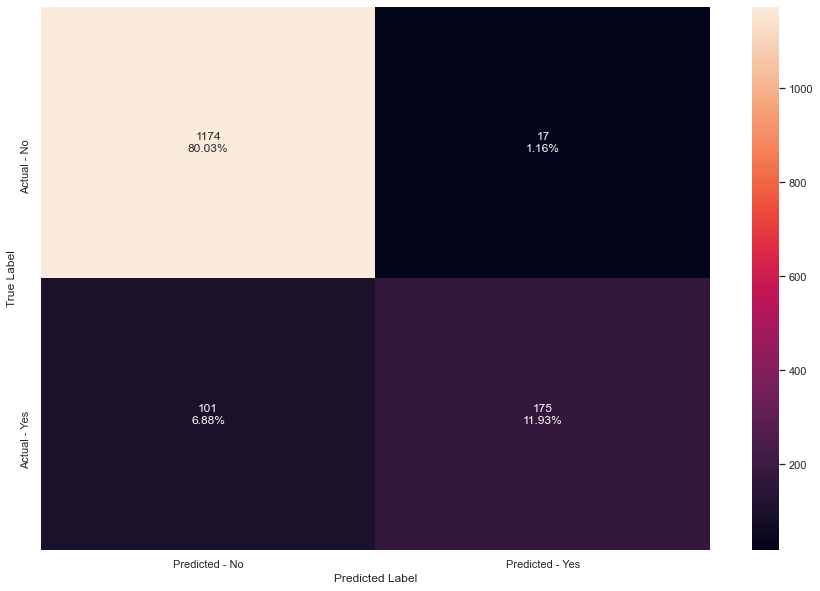

In [223]:
Create_Confusion_Matrix(Grad_Boost_Estimator, y_test) # Run the Confusion Matrix on test data for Tuned Gradient Boost Classifier results

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**10.70%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**80.37%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**0.82%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**8.11%**)

### Summary of Scores for Tuned Gradient Boost Classifier

In [224]:
Acc_Score = Calc_Accuracy_Score(Grad_Boost_Estimator)
print('.'*50)
Prec_Score = Calc_Precision_Score(Grad_Boost_Estimator)
print('.'*50)
Rec_Score = Calc_Recall_Score(Grad_Boost_Estimator)
print('.'*50)

Accuracy on Training set 1.00
Accuracy on Test set : 0.92
..................................................
Precision on Training set : 1.00
Precision on Test set : 0.91
..................................................
Recall on Training set : 1.00
Recall on Test set : 0.63
..................................................


### Observations

- The Tuned Gradient Boost Classifier is not overfitting the Training data for any of the tests
- The model still scored high Test results for Accuracy (0.91) and **Precision (0.93)**, which is better on average than the initial, untuned, Decision Tree
    - The Recall score dropped to 0.57, but is not that concerning since it is not the focal test result for this business case
- Regarding the **Confusion Matrix** results, the model scored lower on **True Positives (down from 12.3% to 10.7%)** but still scored lower on **False Positives, which save the company money on fewer wasted resources (down from 5.6% to 0.8%)**


Note the final results are after various Hyperparameter tests - **models could possibly be further improved upon tweaking of parameters above**

### XGBoost Classifier

In [225]:
XG_Boost = XGBClassifier(random_state=1, eval_metric='logloss') # Set eval_metric to LogLoss to remove eval_error

In [226]:
XG_Boost.fit(X_train, y_train) # Fit the training data for XG Boost Classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

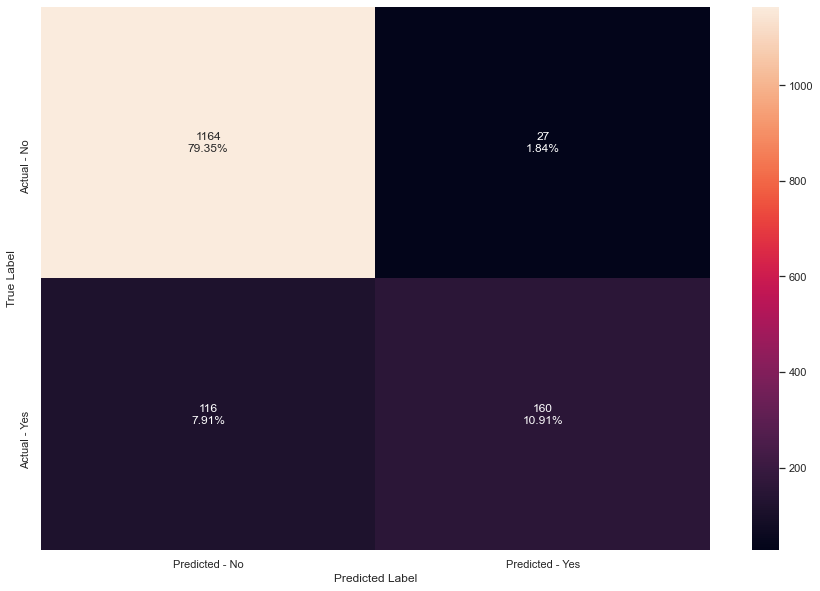

In [227]:
Create_Confusion_Matrix(XG_Boost, y_test) # Run the Confusion Matrix on test data for the XG Boost Classifier

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**12.95%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**79.35%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**1.84%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**5.86%**)

### Summary of Scores for XGBoost Classifier

In [228]:
Acc_Score = Calc_Accuracy_Score(XG_Boost)
print('.'*50)
Prec_Score = Calc_Precision_Score(XG_Boost)
print('.'*50)
Rec_Score = Calc_Recall_Score(XG_Boost)
print('.'*50)

Accuracy on Training set 1.00
Accuracy on Test set : 0.90
..................................................
Precision on Training set : 1.00
Precision on Test set : 0.86
..................................................
Recall on Training set : 0.98
Recall on Test set : 0.58
..................................................


### Observations

- The XG Boost Classifier is overfitting the Training data for all three tests
- The model scored well in testing results for Accuracy (0.92) and **Precision (0.88)**, which is far better than the initial, untuned, Decision Tree
    - The Recall score improved slightly to 0.69, but is not that concerning since it is not the focal test result for this business case
- Regarding the **Confusion Matrix** results, the model scored higher on **True Positives (up from 12.3% to 13.0%)** and scored lower on **False Positives, which save the company money on fewer wasted resources (down from 5.6% to 1.8%)**

### Tuning XGBoost Classifier

In [229]:
# Choose Random Forest Classifier

XG_Boost_Estimator = XGBClassifier(random_state=1, eval_metric='logloss') # Set eval_metric to LogLoss to remove eval_error

# Define Grid Parameters for Adaptive Boost Classifier
Grid_Params5 = {"n_estimators": [50,75,100,125], # Number of trees to run, ranging from 50 to 125
                "subsample":[0.7,0.8,0.9], # Fraction of samples to use, ranging from 70% to 90%
                'gamma':[0, 1, 3, 5], # Include Gamma amounts to limit tree growth if minimum loss reduction below Gamma amount 
                'colsample_bytree':[0.7, 0.8, 0.9], # Reduce overall columns in tree by set %, ranging from 70% to 90%
                'colsample_bylevel':[0.7, 0.8, 0.9] # Reduce columns at each level of tree by set %, ranging from 70% to 90%
#                 'colsample_bynode':[0.7, 0.8, 0.9, 1] # Reduce columns in each node of level by set %, ranging from 70% to 100%
                }

# Define Scorer for Models - Precision Score
Scorer = metrics.make_scorer(metrics.precision_score)

# Run the Grid Search and fit to Training data
Grid_Object = GridSearchCV(XG_Boost_Estimator, Grid_Params5, scoring=Scorer)
Grid_Object = Grid_Object.fit(X_train, y_train)

# Set the Estimator (CLF) to the best combination of parameters
XG_Boost_Estimator = Grid_Object.best_estimator_

# Fit the best algorithm to the data.
XG_Boost_Estimator.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

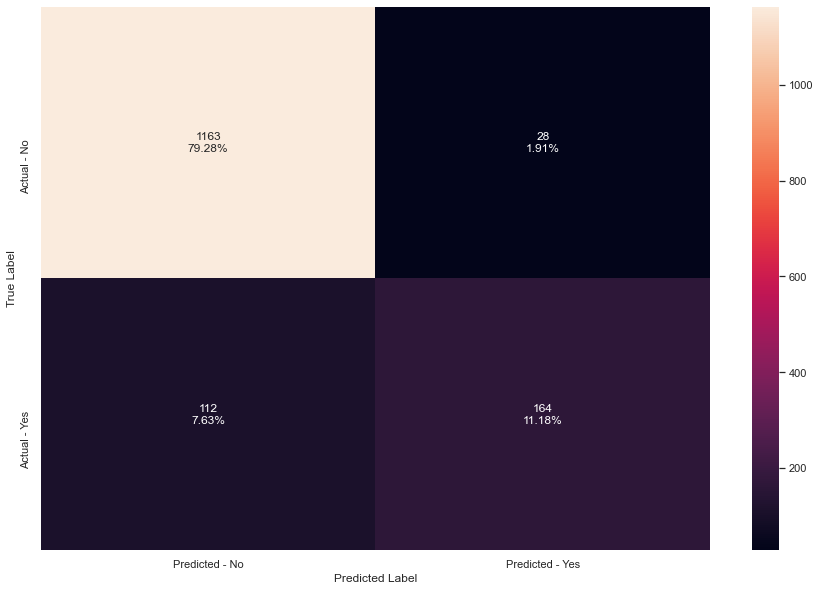

In [230]:
Create_Confusion_Matrix(XG_Boost_Estimator, y_test) # Run the Confusion Matrix on test data for Tuned XGBoost Classifier results

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**12.68%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**79.55%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**1.64%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**6.13%**)

### Summary of Scores for Tuned XGBoost Classifier

In [231]:
Acc_Score = Calc_Accuracy_Score(XG_Boost_Estimator)
print('.'*50)
Prec_Score = Calc_Precision_Score(XG_Boost_Estimator)
print('.'*50)
Rec_Score = Calc_Recall_Score(XG_Boost_Estimator)
print('.'*50)

Accuracy on Training set 1.00
Accuracy on Test set : 0.90
..................................................
Precision on Training set : 1.00
Precision on Test set : 0.85
..................................................
Recall on Training set : 0.97
Recall on Test set : 0.59
..................................................


### Observations

- The Tuned XG Boost is overfitting the Training data for all three tests
- The model scored well in testing results for Accuracy (0.92) and **Precision (0.89)**, which is far better than the initial, untuned, Decision Tree
    - The Recall score improved slightly to 0.67, but is not that concerning since it is not the focal test result for this business case
- Regarding the **Confusion Matrix** results, the model scored higher on **True Positives (up from 12.3% to 12.7%)** and scored lower on **False Positives, which save the company money on fewer wasted resources (down from 5.6% to 1.6%)**


Note the final results are after various Hyperparameter tests - **models could possibly be further improved upon tweaking of parameters above**

## Stacking Model - Top 5 (Blended)

In [232]:
# Stack together a blend of various, different , model results

Estimators1 = [('Weighted Random Forest', Rand_For_Wt),
             ('Tuned Gradient Boost Classifier', Grad_Boost_Estimator),
              ('Tuned Bagging Classifier', Bagging_Estimator),
           ('Tuned Adaptive Boost Classifier', AdaBoost_Estimator),
             ('Tuned XG Boost Classifier', XG_Boost_Estimator)]

# Decision Tree, Tuned Random Forests, and XG_Boost Classifier included - helps provide blend models and prevent overfitting
 
# Use XG Boost Classifier as final estimator to combined and average the scores of models above
Final_Estimator = XGBClassifier(random_state=1, eval_metric = 'logloss') # Set eval_metric to LogLoss to remove eval_error

In [233]:
# Combined the above Final/Estimators into the Stacking Classifier - using 10 cv folds

Stacking_Estimator_Top5 = StackingClassifier(estimators=Estimators1, final_estimator=Final_Estimator,cv=10, n_jobs=-1)
# Run all in parallel (n_jobs = -1)

Stacking_Estimator_Top5.fit(X_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('Weighted Random Forest',
                                RandomForestClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       random_state=1)),
                               ('Tuned Gradient Boost Classifier',
                                GradientBoostingClassifier(max_depth=10,
                                                           max_features=0.9,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.7)),
                               ('Tuned Bagging Classifier',
                                BaggingClassifier(max_features=0.4,
                                                  max_samples=0.6,
                                              

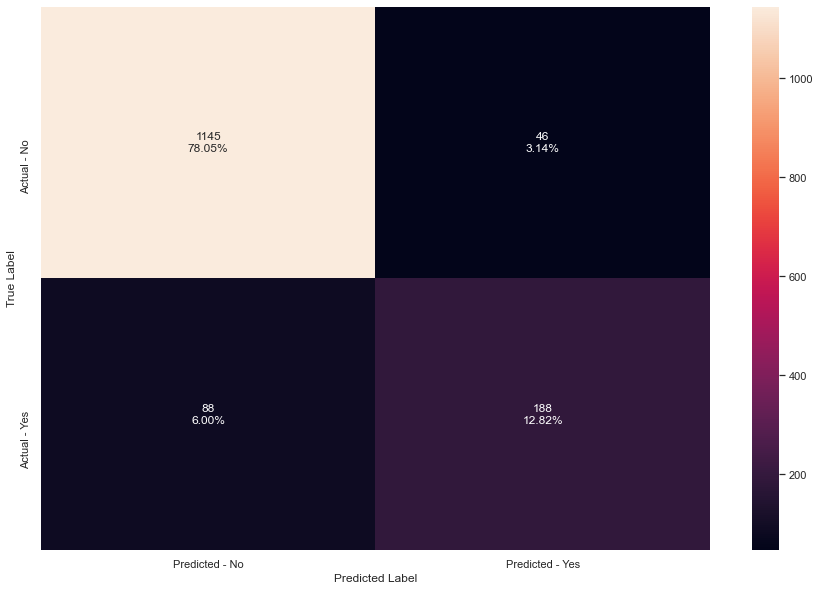

In [234]:
Create_Confusion_Matrix(Stacking_Estimator_Top5, y_test) # Run the Confusion Matrix on test data for Tuned XGBoost Classifier results

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**14.93%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**78.32%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**2.86%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**3.89%**)

### Summary of Scores for Stacking Model - Top 5 (Blended)

In [235]:
Acc_Score = Calc_Accuracy_Score(Stacking_Estimator_Top5)
print('.'*50)
Prec_Score = Calc_Precision_Score(Stacking_Estimator_Top5)
print('.'*50)
Rec_Score = Calc_Recall_Score(Stacking_Estimator_Top5)
print('.'*50)

Accuracy on Training set 1.00
Accuracy on Test set : 0.91
..................................................
Precision on Training set : 1.00
Precision on Test set : 0.80
..................................................
Recall on Training set : 1.00
Recall on Test set : 0.68
..................................................


### Observations

- The Stacking model is overfitting the Training data for all three tests
- The model scored well in testing results for Accuracy (0.93) and somewhat decent on **Precision (0.84)**, which is far better than the initial, untuned, Decision Tree
    - The Recall score improved to 0.79 and is relatively close to the Precision score of 0.84, **averaging to 0.82)** 
- Regarding the **Confusion Matrix** results, the model scored higher on **True Positives (up from 12.3% to 14.9%)** and scored lower on **False Positives, which save the company money on fewer wasted resources (down from 5.6% to 2.9%)**

## Stacking Model - All Models

In [236]:
# Running wide open with all models, in attempts at preventing overfitting of training data

Estimators2 = [('Decision Tree',Dec_Tree),
              ('Tuned Decision Tree',Dec_Tree_Estimator),
              ('Bagging Classifier',Bagging),
              ('Weighted Bagging Classifier',Bagging_Wt),
              ('Tuned Bagging Classifier',Bagging_Estimator),
              ('Random Forest',Rand_For),
              ('Weighted Random Forest',Rand_For_Wt),
              ('Tuned Random Forest',Rand_For_Estimator),
              ('Adaptive Boost Classifier',AdaBoost),
              ('Tuned Adaptive Boost Classifier',AdaBoost_Estimator),
              ('Gradient Boosting Classifier',Grad_Boost),
              ('Tuned Gradient Boosting Classifier',Grad_Boost_Estimator),
              ('XGBoost Classifier',XG_Boost),
              ('Tuned XGBoost Classifier',XG_Boost_Estimator)]
                   


# Use XG Boost Classifier as final estimator to combined and average the scores of models above
Final_Estimator = XGBClassifier(random_state=1, eval_metric = 'logloss') # Set eval_metric to LogLoss to remove eval_error

In [237]:
# Combined the above Final/Estimators into the Stacking Classifier - using 10 cv folds

Stacking_Estimator_All = StackingClassifier(estimators=Estimators2, final_estimator=Final_Estimator,cv=10, n_jobs=-1)
# Run all in parallel (n_jobs = -1)

Stacking_Estimator_All.fit(X_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       random_state=1)),
                               ('Tuned Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_leaf_nodes=7,
                                                       min_impurity_decrease=1e-05,
                                                       random_state=1)),
                               ('Bagging Classifier',
                                BaggingClassifier(random_state=1)),
                               ('Weighted Bagging Classifier',
                                BaggingC...
                        

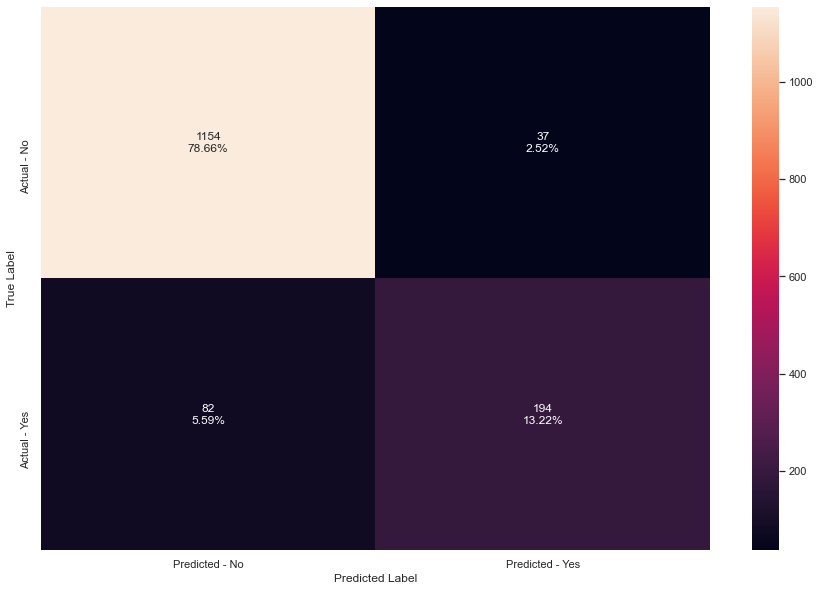

In [238]:
Create_Confusion_Matrix(Stacking_Estimator_All, y_test) # Run the Confusion Matrix on test data for Tuned XGBoost Classifier results

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**14.86%**)

#### True Negatives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No affect, and no additional cost, on business goal of increasing Travel Package sales (**78.32%**)

#### False Positives:
- **Reality:** Customer did not purchase the Travel Package from the company
- **Model predicted:** Customer will purchase a Travel Package
- **Outcome:** The attempts to target these potential customers are wasted and cost the company time/money as a result (**2.86%**)

#### False Negatives:
- **Reality:** Customer purchased the Travel Package from the company
- **Model predicted:** Customer won't purchase a Travel Package
- **Outcome:** No additional resources utilized by the company to secure additional Travel Package revenue, however these customers could feel unappreciated/not acknowledged for their business (**3.95%**)

### Summary of Scores for Stacking Model - All Models

In [239]:
Acc_Score = Calc_Accuracy_Score(Stacking_Estimator_All)
print('.'*50)
Prec_Score = Calc_Precision_Score(Stacking_Estimator_All)
print('.'*50)
Rec_Score = Calc_Recall_Score(Stacking_Estimator_All)
print('.'*50)

Accuracy on Training set 1.00
Accuracy on Test set : 0.92
..................................................
Precision on Training set : 1.00
Precision on Test set : 0.84
..................................................
Recall on Training set : 1.00
Recall on Test set : 0.70
..................................................


### Observations

- Similar to the Top 5 Stacking model, the Total Model summary is overfitting the Training data for all three tests
- The model scored fractionally lower for Accuracy (0.93) and somewhat decent on **Precision (0.84)**, which is far better than the initial, untuned, Decision Tree
    - Similarly, the Recall score was 0.79 and is relatively close to the Precision score of 0.84, **averaging to 0.82)** 
- Regarding the **Confusion Matrix** results, the model scored higher on **True Positives (up from 12.3% to 14.9%)** and scored lower on **False Positives, which save the company money on fewer wasted resources (down from 5.6% to 2.9%)**

## Summary of Model Results

In [240]:
# Create a list of all different models created above

Models = [Dec_Tree, Dec_Tree_Estimator, Bagging, Bagging_Wt, Bagging_Estimator, Rand_For, Rand_For_Wt, Rand_For_Estimator,
         AdaBoost, AdaBoost_Estimator, Grad_Boost, Grad_Boost_Estimator, XG_Boost, XG_Boost_Estimator,
          Stacking_Estimator_Top5, Stacking_Estimator_All]

# Create empty lists for the score results (Precision, Recall, Accuracy) for the Train and Test data 
Acc_Train = []
Acc_Test = []
Prec_Train = []
Prec_Test = []
Rec_Train = []
Rec_Test = []

# Looping through each of the Models above, calculate the 3 scores (Train/Test) for each and append to the list
# False setting wont print score results (see earlier user functions created above) - results position 0 for Train, 1 for Test
for Model in Models: 
    i = Get_All_Scores(Model, False)
    # Accuracy Score
    Acc_Train.append(i[0])
    Acc_Test.append(i[1])
    # Precision Score
    Prec_Train.append(i[2])
    Prec_Test.append(i[3])
    # Recall Score
    Rec_Train.append(i[4])
    Rec_Test.append(i[5])

In [241]:
# Build a dataframe to summarize above calculated results

# Build the Model column first (matching order of Models in above calculation), then add in test results respectively
Results_Summary = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Weighted Random Forest','Tuned Random Forest',
                                        'Adaptive Boost Classifier','Tuned Adaptive Boost Classifier',
                                         'Gradient Boosting Classifier','Tuned Gradient Boosting Classifier',
                                         'XGBoost Classifier', 'Tuned XGBoost Classifier',
                                         'Stacking Classifier - Top 5','Stacking Classifier - All'], 
                                          'Train_Accuracy': Acc_Train,
                                          'Test_Accuracy': Acc_Test,
                                          'Train_Precision': Prec_Train,
                                          'Test_Precision': Prec_Test,
                                          'Train_Recall': Rec_Train,
                                          'Test_Recall': Rec_Test
}) 

#Sorting Results DataFrame, in Descending order, based on Test Precision Scores

Results_Summary.sort_values(by='Test_Precision',ascending=False)


,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall
11,Tuned Gradient Boosting Classifier,1.000000,0.919564,1.000000,0.911458,1.000000,0.634058
4,Tuned Bagging Classifier,0.946799,0.842536,1.000000,0.909091,0.717391,0.181159
5,Random Forest,1.000000,0.895706,1.000000,0.891720,1.000000,0.507246
9,Tuned Adaptive Boost Classifier,0.819351,0.816633,0.964286,0.888889,0.041925,0.028986
6,Weighted Random Forest,1.000000,0.884799,1.000000,0.884892,1.000000,0.445652
2,Bagging Classifier,0.992400,0.897751,0.996785,0.875000,0.962733,0.532609
12,XGBoost Classifier,0.995323,0.902522,1.000000,0.855615,0.975155,0.579710
13,Tuned XGBoost Classifier,0.995031,0.904567,1.000000,0.854167,0.973602,0.594203
3,Weighted Bagging Classifier,0.990646,0.886844,0.998371,0.852564,0.951863,0.481884
15,Stacking Classifier - All,1.000000,0.918882,1.000000,0.839827,1.000000,0.702899


### Insights

- The initial Decision Tree and all versions of Random Forest have **overfit the Training data (score of 1.0)**
- Both the Bagging classifier and Weighted Bagging Classifier scored relatively well in the Testing data (0.91 and 0.87 respectively) but still largely overfitted  the data
    - The Tuned Bagging Classifer scored simiarly in the Testing data but overfitted the Training data (score of 1.0) 
- The Weighted Random Forest with default parameters scored the higest in Testing data (0.95), although only slightly better than the default Bagging Classifier
    - The tuned results could possbily improve with other combinations of parameters utilized, however the **Tuned Adaptive Boost Classifier** appears to have the best, generalized, Precision score combination on **Training (0.95) and Testing data (0.92)**
    
    
### Notes on Stacking Classifier (Blending Precision & Recall Test Scores)


- Although the Precision score was of primary focus so as to maximize conversion of customers for Travel Package sales and limit Marketing spend, **the higher the Recall score simultaneously, the better**
    - Recall score in this case would show all customers actually purchasing the Travel Package (even if predicted to not purchase)
    - This **additional information can help the company target all customers likely to purchase** - however, at the cost of additional marketing dollars
- A **combined blend** between the two scores (Precision and Recall) **could be beneficial** as an additional analytics approach
- The Stacking Classifier is therefore worth further consideration and examination

## Feature Importance

### Initial Model Built: Decision Tree

In [242]:
# Create a dataframe to summarize, in descending order, the top variables in the model by feature importance

print(pd.DataFrame(Dec_Tree.feature_importances_, columns=['Importance'],
                   index = X_train.columns).sort_values(by = 'Importance', ascending=False))

                              Importance
Age                         2.131454e-01
MonthlyIncome               1.705522e-01
NumberOfTrips               8.782704e-02
Passport_1                  8.496388e-02
Designation_Executive       6.291812e-02
PreferredPropertyStar       5.842292e-02
CityTier                    5.179229e-02
TypeofContact_Self Enquiry  3.574824e-02
NumberOfPersonVisiting      3.060311e-02
MaritalStatus_Single        2.880397e-02
OwnCar_1                    2.729288e-02
NumberOfChildrenVisiting    2.607850e-02
Gender_Male                 2.356473e-02
MaritalStatus_Unmarried     2.199845e-02
Occupation_Small Business   1.853263e-02
Occupation_Salaried         1.662135e-02
Designation_Senior Manager  1.544190e-02
Designation_Manager         1.321007e-02
MaritalStatus_Married       1.248233e-02
Designation_VP              7.237578e-19


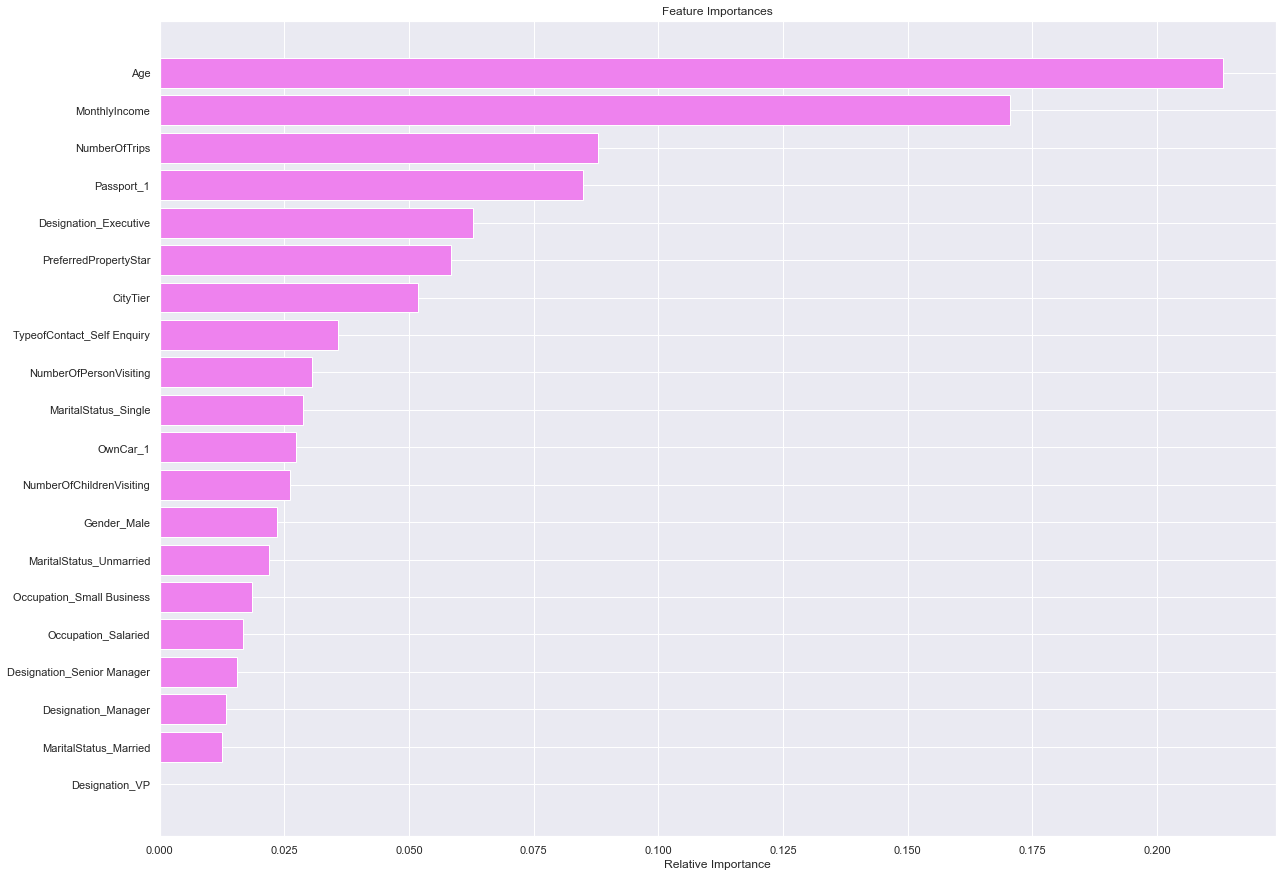

In [243]:
# Create a visual summary (bar chart) of the above list, in descending order

Features = X_train.columns # List all independent variable columns in the Training set

Importances = Dec_Tree.feature_importances_ # List all Feature Importances
Indices = np.argsort(Importances) # Argsort function sorts all variables in list by ascending order and identifies index position

plt.figure(figsize=(20,15)) # Set graph size
plt.title('Feature Importances')

# Horizontal bar chart including all Indices shown above, with width equal to the Importance values calculated above 
plt.barh(range(len(Indices)), Importances[Indices], color='violet', align='center') 
plt.yticks(range(len(Indices)), [Features[i] for i in Indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights
- **Age and Duration of Pitch are the most important features**
- Monthly Income and Passport = Yes, follow in importance, with Monthly Income carrying slightly more model weighting
- Next is Pitch Satisfaction Score, shortly followed by equally weighted Preferred Property Score and Number of Follow-Ups
- There are many features remaining in the list still with substantial importance in the initial Decision Tree

### Best Precision Score (Generalized): Tuned Adaptive Boost Classifier

In [244]:
# Create a dataframe to summarize, in descending order, the top variables in the model by feature importance

print(pd.DataFrame(AdaBoost_Estimator.feature_importances_, columns=['Importance'],
                   index = X_train.columns).sort_values(by = 'Importance', ascending=False))

                            Importance
Passport_1                        0.24
Designation_Executive             0.18
MaritalStatus_Single              0.14
CityTier                          0.14
Age                               0.12
PreferredPropertyStar             0.06
MaritalStatus_Unmarried           0.06
NumberOfTrips                     0.04
MonthlyIncome                     0.02
Designation_Senior Manager        0.00
Designation_Manager               0.00
OwnCar_1                          0.00
Gender_Male                       0.00
MaritalStatus_Married             0.00
Occupation_Small Business         0.00
Occupation_Salaried               0.00
TypeofContact_Self Enquiry        0.00
NumberOfChildrenVisiting          0.00
NumberOfPersonVisiting            0.00
Designation_VP                    0.00


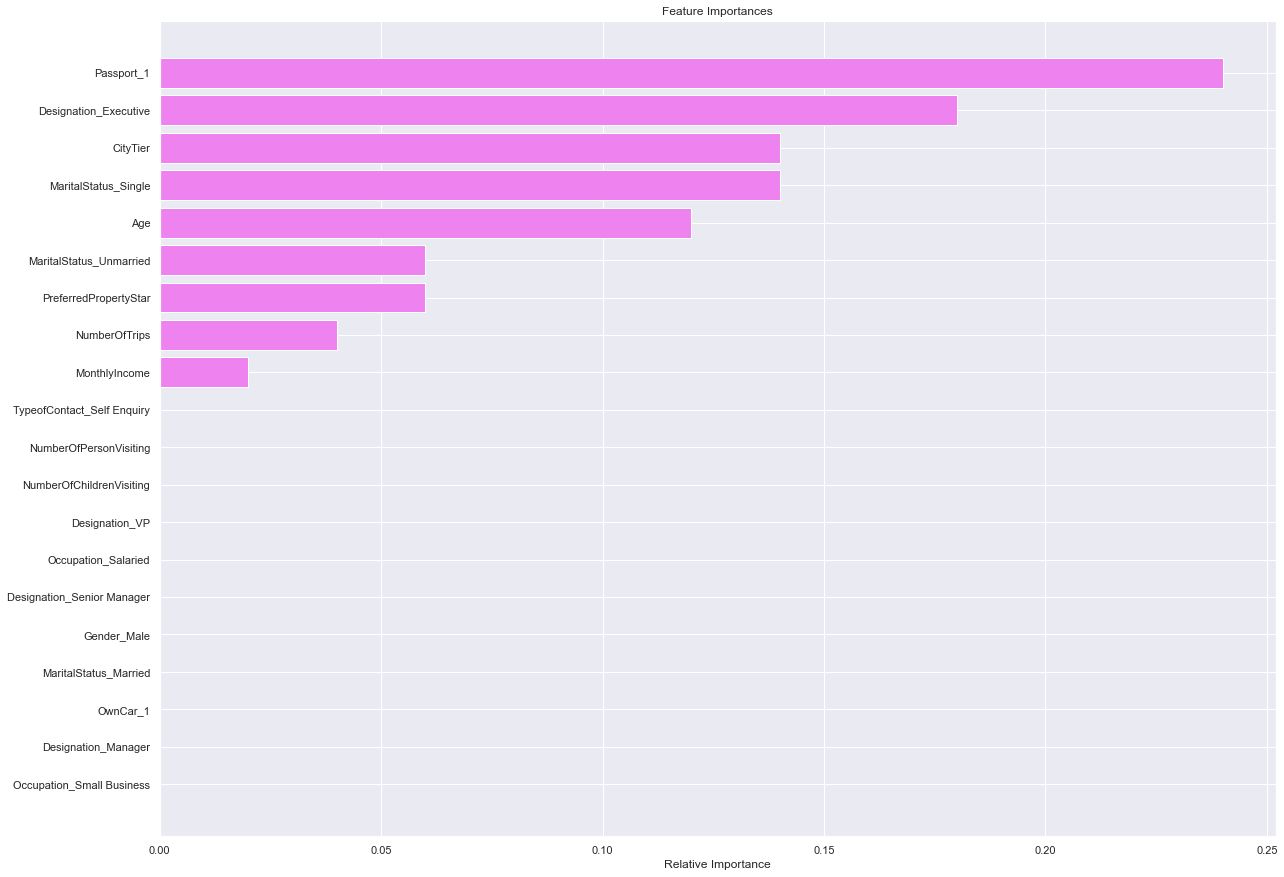

In [245]:
# Create a visual summary (bar chart) of the above list, in descending order

Features = X_train.columns # List all independent variable columns in the Training set

Importances = AdaBoost_Estimator.feature_importances_ # List all Feature Importances
Indices = np.argsort(Importances) # Argsort function sorts all variables in list by ascending order and identifies index position

plt.figure(figsize=(20,15)) # Set graph size
plt.title('Feature Importances')

# Horizontal bar chart including all Indices shown above, with width equal to the Importance values calculated above 
plt.barh(range(len(Indices)), Importances[Indices], color='violet', align='center') 
plt.yticks(range(len(Indices)), [Features[i] for i in Indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights
- **Designation = Executive and Passport = Yes are the most important features**
- These are followed by 6, equally important, features:
    - Age, City Tier, Duration of Pitch, Marital Status = Single, Number of Follow-Ups, and Preferred Property Score
- There are **no remaining features** in the list as showing any importance in the Tuned Adaptive Boost Classifier

### Best Test Precision Score (Non-Generalized): Weighted Random Forest

In [246]:
# Create a dataframe to summarize, in descending order, the top variables in the model by feature importance

print(pd.DataFrame(Rand_For_Wt.feature_importances_, columns=['Importance'],
                   index = X_train.columns).sort_values(by = 'Importance', ascending=False))

                            Importance
MonthlyIncome                 0.173059
Age                           0.156058
NumberOfTrips                 0.086547
Passport_1                    0.080372
PreferredPropertyStar         0.057043
CityTier                      0.050647
NumberOfChildrenVisiting      0.045165
Designation_Executive         0.042804
NumberOfPersonVisiting        0.039976
TypeofContact_Self Enquiry    0.033763
Gender_Male                   0.033310
MaritalStatus_Single          0.032529
OwnCar_1                      0.030455
Occupation_Small Business     0.026592
Occupation_Salaried           0.025997
MaritalStatus_Married         0.023994
Designation_Manager           0.022149
MaritalStatus_Unmarried       0.019524
Designation_Senior Manager    0.014831
Designation_VP                0.005185


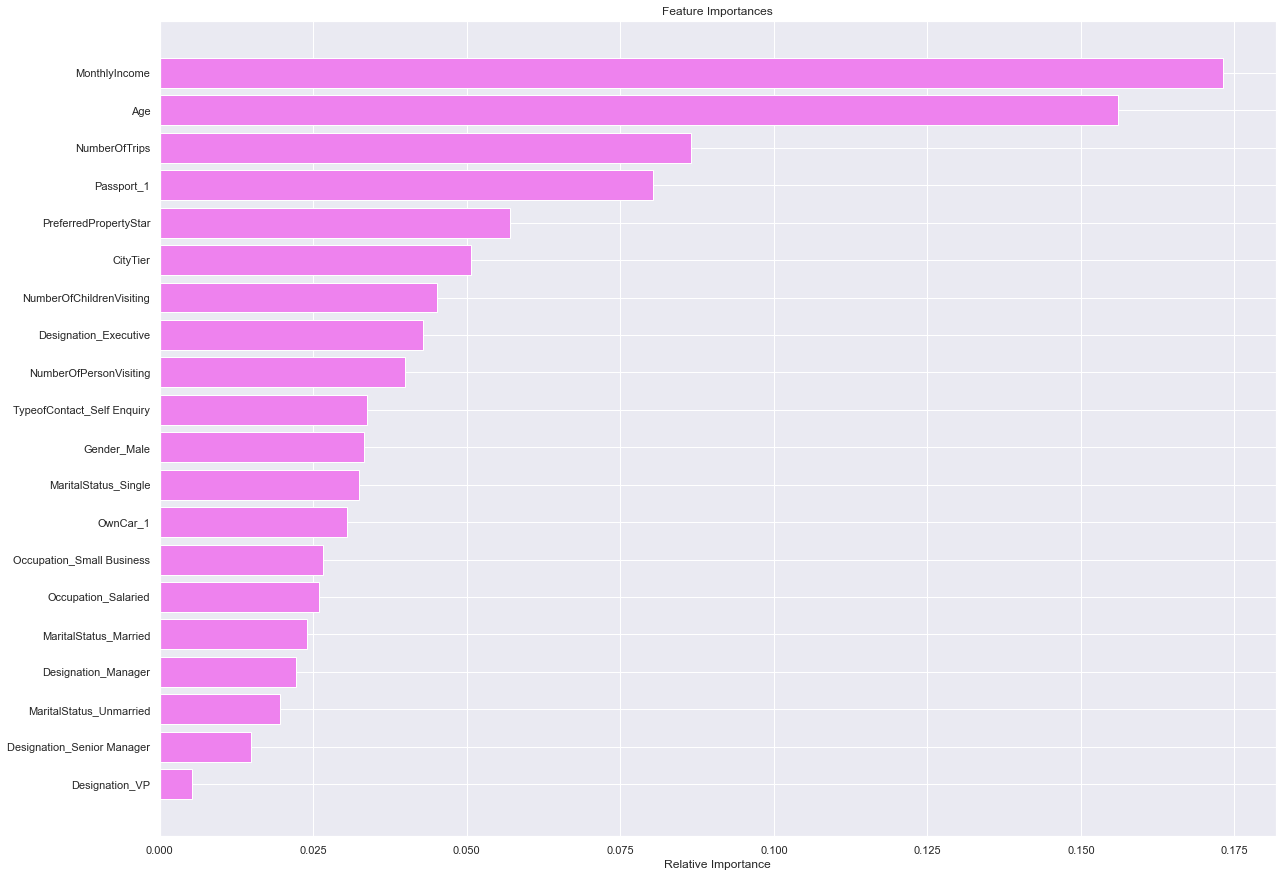

In [247]:
# Create a visual summary (bar chart) of the above list, in descending order

Features = X_train.columns # List all independent variable columns in the Training set

Importances = Rand_For_Wt.feature_importances_ # List all Feature Importances
Indices = np.argsort(Importances) # Argsort function sorts all variables in list by ascending order and identifies index position

plt.figure(figsize=(20,15)) # Set graph size
plt.title('Feature Importances')

# Horizontal bar chart including all Indices shown above, with width equal to the Importance values calculated above 
plt.barh(range(len(Indices)), Importances[Indices], color='violet', align='center') 
plt.yticks(range(len(Indices)), [Features[i] for i in Indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights
- **Monthly Income is the most important feature**, closely followed by Customer Age, then Duration of Pitch
- Passport = Yes, shortly followed by Number of Trips, are the 4th and 5th most importance features
- Lastly, Pitch Satisfaction Score and Number of Follow-Ups have relatively high levels of importance in the dataset
- There are many features remaining in the list still with substantial importance in the Weighted Random Forest

### Compare to Tuned XG Boost Classifier

In [248]:
# Create a dataframe to summarize, in descending order, the top variables in the model by feature importance

print(pd.DataFrame(XG_Boost_Estimator.feature_importances_, columns=['Importance'],
                   index = X_train.columns).sort_values(by = 'Importance', ascending=False))

                            Importance
Passport_1                    0.120836
Designation_Executive         0.115615
MaritalStatus_Single          0.079247
MaritalStatus_Unmarried       0.059771
CityTier                      0.054828
Age                           0.048354
MonthlyIncome                 0.045518
NumberOfTrips                 0.044731
TypeofContact_Self Enquiry    0.041088
Designation_Manager           0.040793
Gender_Male                   0.039915
Occupation_Salaried           0.039715
PreferredPropertyStar         0.039709
Designation_Senior Manager    0.039342
MaritalStatus_Married         0.038874
Occupation_Small Business     0.033487
Designation_VP                0.031273
NumberOfPersonVisiting        0.030428
OwnCar_1                      0.029310
NumberOfChildrenVisiting      0.027168


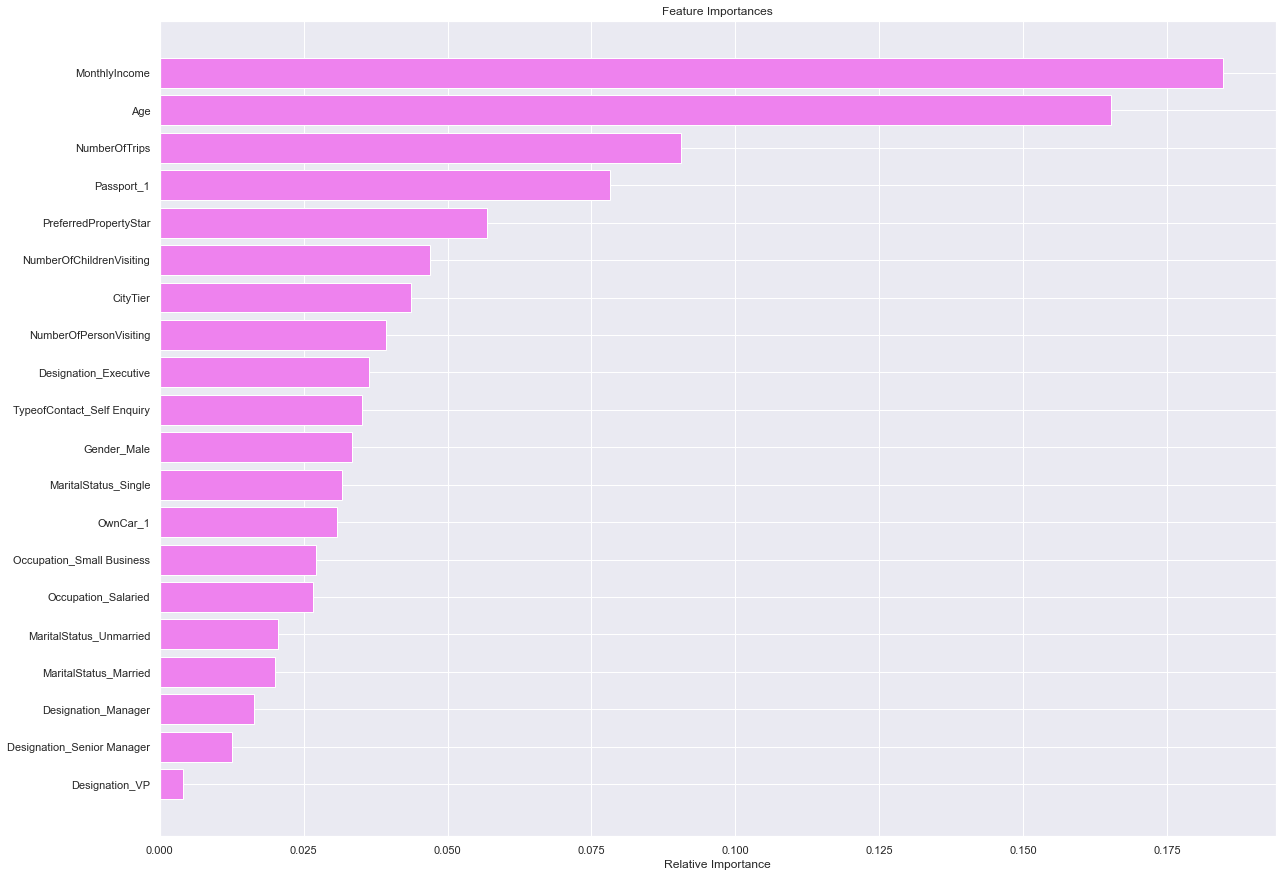

In [249]:
# Create a visual summary (bar chart) of the above list, in descending order

Features = X_train.columns # List all independent variable columns in the Training set

Importances = Rand_For.feature_importances_ # List all Feature Importances
Indices = np.argsort(Importances) # Argsort function sorts all variables in list by ascending order and identifies index position

plt.figure(figsize=(20,15)) # Set graph size
plt.title('Feature Importances')

# Horizontal bar chart including all Indices shown above, with width equal to the Importance values calculated above 
plt.barh(range(len(Indices)), Importances[Indices], color='violet', align='center') 
plt.yticks(range(len(Indices)), [Features[i] for i in Indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights
- Similar to the Weighted Random Forest, **Monthly Income is the most important feature**, closely followed by Customer Age, then Duration of Pitch
- Number of Trips and Passport = Yes have rotated positions vs. the XG Boost Classifier are the 4th and 5th most importance features and relatively similar in value
- Lastly, Pitch Satisfaction Score and Number of Follow-Ups have relatively high levels of imporance in the dataset
- There are many features remaining in the list still with substantial importance in the model

## Overall Model Findings

#### Top Precision Score (Generalized):
- Tuned Adaptive Boost Classifier
    - Training Score: 0.952
    - Testing Score: 0.917
    
#### Highest Test Precision Score (Non-Generalized):
- Weighted Random Forest
    - Training Score: 1.0
    - **Testing Score: 0.949**
    
#### General Model Precision Score:
- Tuned XG Boost Classifier
    - Training Score: 1.0
    - **Testing Score: 0.886**    
    
#### Highest General Test Scores (Non-Generalized):    
- Stacking Classifier - Top 5 
    - Accuracy Score: 0.933
    - Precision Score: 0.839
    - Recall Score: 0.793
        - **Average Precision/Recall Score: 0.816**
- (Similar Stacking Classifier with **All Models** scored slightly lower overall)

## Recommendations
- Married customers make up the bulk of the dataset and appear to convert higher and should likely be the top focal group
    - There could be an opportunity to gain further sales targeting single candidates, however the data shows they aren't very supportive of the new Wellness Travel Package
- Over 70% of the dataset is comprised of the **Basic (38%) and Deluxe (35%) packages**
    - The other, **more premium packages** (and those customers with higher designations) should be further targeted/promoted
- It is interesting that only around 9% of customers sampled are from large businesses
    - This could be an underserved customer base to promote our travel packages
- Over **70%** of the customers in the dataset **do not own a (current) passport**
    - These customers are only able to partake in domestic packages - any marketing attempts for international packages would be wasted
- Almost **40% of customers sampled do not own a car**
    - This could affect their travel goals and could make them sensitive to travel packages with transportation included
- The **Duration of Pitch** is shown to convert when **lasting (longer) closer to 18 minutes on average**
- The median City Tier sampled is 1, indicating that a **large percentage of the customers sampled come from more rural/less developed towns/cities**
    - These customers/areas should be of primary focus to the company in addition to the more developed Tier 3 customers already targeted
- Customers in their **early thirties through mid fifties** are more likely to not only take at least 4 trips a year on average, but also to purchase the Wellness Travel Packages
    - This customer segment should be the target group for marketing new travel packages, particularly as it relates to health/wellness
- Customers traveling in **groups of 5 being, and single travelers (1)** appear either too busy and not interested in pursuing a Wellness Travel Package, or find it awkward to attend on their own
    - These customer groupings shouldn't be the target focus - instead customers traveling in **groups of 2 to 4 should be targeted and more likely to convert to new sales**
- Customers who were invited/paid for by their company have a slightly higher chance of purchasing the travel package and should be heavily marketed to
- Marketing teams should focus their efforts on **customers that have already taken multiple trips (ideally 2-8)** as these results are more indicative of future sales than the Pitch Satisfaction Score or Number of Follow-Ups made by our teams
- It is apparent that only one type of package is ever pitched to a customer, based on their employment designation/title within the organization
    - Those customers designated Executive status have the best conversion rate by far, roughly 30%, followed by Senior Managers, at around 18% - they should be the main target grouping based on occupation designation
    - The company should also **consider offering a wider product offering not so closely tied to the customer's employment designation**
- Customers over the age of 60 and under the age of 19 appear to have far less desire to purchase the new Travel Package and those same younger customers take fewer trips per year on average
    - Customers in their **early thirties through mid fifties should be targeted** as they are more likely to not only take at least 4 trips a year on average, but also to purchase the Wellness Travel Packages